# Female Naive Vs Female CPH
1. Female CPH (baseline)
2. Female CPH (Week 1)

In [1]:
import os
import sys
sys.path.append("C:/Users/PC-EIAD209/Desktop/AnaKei/NIPD-AI")

#sys.path.append("C:\\Users\\"+os.getlogin()+"\\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\\PainClassifier")
from my_data_generator import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import h5py
import warnings
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from datetime import datetime
import scipy as sp
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc, roc_curve
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Conv3D, MaxPooling3D, Flatten, Dropout, GlobalAveragePooling3D, concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from keras.regularizers import l2
import cv2
from keras import initializers
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
import tensorflow as tf
from keras import losses
from tensorflow.keras.optimizers import SGD
import wandb
from wandb.integration.keras import WandbCallback
import gc
#from numba import cuda
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import nibabel as nib 

In [3]:
rabies_ref_path= r"F:/rabies/preprocess_batch-001/commonspace_bold/_scan_info_subject_id003.session01_split_name_sub-003_ses-01_desc-o_T2w/_run_None/sub-003_ses-01_task-dist_desc-oa_bold_autobox_combined.nii.gz"
rabies_ref = nib.load(rabies_ref_path).get_fdata()
rabies_vol= np.mean(rabies_ref, axis=3)

print("rabies_ref shape:", rabies_ref.shape)

rabies_ref shape: (48, 81, 48, 620)


In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Devices:", tf.config.list_physical_devices())

Num GPUs Available:  1
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Model

In [5]:
def VGG16_3D(blocks):
        
    inputs = Input(shape=(42, 65, 29), name='input_layer')
    x = Reshape(target_shape=[42, 65, 29, 1], name='input_x_3d_volumes')(inputs)

    if blocks == 1:
        print("entra al 1")
        #batch_norm
        x = BatchNormalization()(x)
        # 1st Conv Block
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.GlobalAveragePooling3D()(x)
        x = tf.keras.layers.Dropout(0.5)(x)
        
    elif blocks == 2:
        print("entra al 2")
        #batch_norm
        x = BatchNormalization()(x)
        # 1st Conv Block
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
            
        #batch_norm
        x = BatchNormalization()(x)
        # 2nd Conv Block
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.GlobalAveragePooling3D()(x)
        x = tf.keras.layers.Dropout(0.5)(x)
        
    elif blocks == 3:
        print("entra al 3")
        #batch_norm
        x = BatchNormalization()(x)
        # 1st Conv Block
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
            
        #batch_norm
        x = BatchNormalization()(x)
        # 2nd Conv Block
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        
        #batch_norm
        x = BatchNormalization()(x)
        # 3rd Conv block  
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x) 
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x) 
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x) 
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.GlobalAveragePooling3D()(x)
        x = tf.keras.layers.Dropout(0.5)(x)
        
    elif blocks == 4:
        print("entra al 4")
        #batch_norm
        x = BatchNormalization()(x)
        # 1st Conv Block
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
            
        #batch_norm
        x = BatchNormalization()(x)
        # 2nd Conv Block
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        #x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        
        #batch_norm
        x = BatchNormalization()(x)
        # 3rd Conv block  
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x) 
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x) 
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x) 
        #x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        
        #batch_norm
        x = BatchNormalization()(x)
        # 4th Conv block
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer='l2')(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        #x = tf.keras.layers.GlobalAveragePooling3D()(x)
        x = tf.keras.layers.Dropout(0.5)(x)

    elif blocks == 5:
        print("entra al 5")
        #batch_norm
        x = BatchNormalization()(x)
        # 1st Conv Block
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = Conv3D(filters =64, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.3)(x)
            
        #batch_norm
        x = BatchNormalization()(x)
        # 2nd Conv Block
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = Conv3D (filters =128, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        #x = MaxPooling3D(pool_size =2, strides =1, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.3)(x)
        
        #batch_norm
        x = BatchNormalization()(x)
        # 3rd Conv block  
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x) 
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x) 
        x = Conv3D (filters =256, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x) 
        #x = MaxPooling3D(pool_size =2, strides =1, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.3)(x)
        
        #batch_norm
        x = BatchNormalization()(x)
        # 4th Conv block
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        #x = MaxPooling3D(pool_size =2, strides =1, padding ='same')(x)
        x = tf.keras.layers.Dropout(0.3)(x)
    
        #batch_norm
        x = BatchNormalization()(x)
        # 5th Conv block
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        x = Conv3D (filters =512, kernel_size =3, padding ='same', activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.05))(x)
        #x = MaxPooling3D(pool_size =2, strides =2, padding ='same')(x)
        x = tf.keras.layers.GlobalAveragePooling3D()(x)
        x = tf.keras.layers.Dropout(0.5)(x)
    
    # Fully connected layers  
    x = Flatten()(x) 
    x = Dense(units = 4096, activation ='relu',kernel_regularizer='l2')(x)
    #x = tf.keras.layers.Dropout(0.5)(x)
    x = Dense(units = 4096, activation ='relu',kernel_regularizer='l2')(x) 
    x = tf.keras.layers.Dropout(0.5)(x)
    output = Dense(units = 2,activation ='sigmoid',kernel_regularizer='l2')(x)
    
    # creating the model
    VGG_3d_model = Model (inputs=inputs, outputs =output)
    #model.summary()

    return VGG_3d_model

def set_pretrained_weigths(VGG_3d_model):
    #VGG 16 with weights from Imagenet
    pretrained_model = tf.keras.applications.VGG16(
        include_top=False,
        weights="imagenet",
        pooling='avg',
        input_shape = (42, 65, 3)
    )
    
    #conv layers on VGG_3d_model
    layers_conv = []
    for j in range(len(VGG_3d_model.layers)):
        if "conv3d" in str(VGG_3d_model.layers[j]):
            layers_conv.append(j)
    layers_conv_pretrained = []
    for j in range(len(pretrained_model.layers)):
        if "Conv2D" in str(pretrained_model.layers[j]):
            layers_conv_pretrained.append(j)
    
    for i in range(len(layers_conv)):
        if "Conv2D" in str(pretrained_model.layers[layers_conv_pretrained[i]]):
            if i == 0:
                w = pretrained_model.layers[layers_conv_pretrained[i]].get_weights()[0].sum(axis=2, keepdims=True)
            else:
                w = pretrained_model.layers[layers_conv_pretrained[i]].get_weights()[0]
                
            w3d=[]
            
            w = np.reshape(w,(3,3,-1),order='F')
            for j in range(len(w[0,0,:])):
                for k in range(3):
                    w3d.append(w[:,:,j])
            w3d = np.transpose(w3d, (1,2,0))
            
            new_weights = np.reshape(w3d, np.array(VGG_3d_model.layers[layers_conv[i]].get_weights()[0]).shape,order='F')
            new_bias = pretrained_model.layers[layers_conv_pretrained[i]].get_weights()[1]
            
            WnB = []
            WnB.append(new_weights)
            WnB.append(new_bias)
    
            VGG_3d_model.layers[layers_conv[i]].set_weights(WnB)

    del pretrained_model, w, WnB, new_weights, new_bias, w3d

# Metrics

In [6]:
def confusionmatrix_multiclass(y_test,pred):
    cm = confusion_matrix(y_test, (np.rint(preds)).astype(int) )
    group_names = ['True baseline','False Baseline','False Baseline',   
                   'False week 1','Truec','False Week 1',
                  'False week 7','False week 7','True week 7']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         np.ndarray.flatten(cm/(np.sum(cm,axis=1).reshape(3,1)))]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = ['Baseline','Week 1','Week 7'] ,yticklabels = ['Baseline','Week 1','Week 7'])
    plt.show()

def confusionmatrix(y_test,preds):
    #Construct the Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    group_names = ['True Naive','False Naive','False CPH','True CPH']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         np.ndarray.flatten(cm/(np.sum(cm,axis=1).reshape(2,1)))]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = ['MALE','FEMALE'] ,yticklabels = ['MALE','FEMALE'])
    plt.show()
    return sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = ['MALE','FEMALE'] ,yticklabels = ['MALE','FEMALE'])
    
def confusionmatrix_binary(y_test, preds):
    cm = confusion_matrix(y_test, preds)
    group_names = ['True baseline','False baseline','False Week 1','True Week 1']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         np.ndarray.flatten(cm/(np.sum(cm,axis=1).reshape(2,1)))]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels = ['MALE','FEMALE'] ,yticklabels = ['MALE','FEMALE'])
    plt.show()

def ROC(probs,y_test): #binary
    #Classification Area under curve
     warnings.filterwarnings('ignore')
             
     auc = roc_auc_score(y_test, probs)
     print('AUC - Test Set: %.2f%%' % (auc*100))
    
     # calculate roc curve
     fpr, tpr, thresholds = roc_curve(y_test, probs)
     # plot no skill
     plt.plot([0, 1], [0, 1], linestyle='--')
     # plot the roc curve for the model
     plt.plot(fpr, tpr, marker='.')
     plt.xlabel('False positive rate')
     plt.ylabel('Sensitivity/ Recall')
     # show the plot
     plt.show()
    
     probs = (np.rint(probs)).astype(int)   
        
     precision = precision_score(y_test, probs)
     print('Precision: %f' % precision)
     # recall: tp / (tp + fn)
     recall = recall_score(y_test, probs)
     print('Recall: %f' % recall)
     # f1: tp / (tp + fp + fn)
     f1 = f1_score(y_test, probs)
     print('F1 score: %f' % f1)
        
def ROC_multiclass(model, y_test, n_class):
    #y_test: array size (# of subjects, ) with classes 
    #pretrained model to be evaluated 
    
    label_binarizer = LabelBinarizer().fit(y_test)
    y_onehot_test = label_binarizer.transform(y_test)
    y_onehot_test.shape  # (n_samples, n_classes)

    y_score = model.predict(X_test) # y_score is onehot
    
    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
    
    n_classes = n_class
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_grid = np.linspace(0.0, 1.0, 1000)

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)

    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

    # Average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")
    
    target_names = ['Naive','Week1','Week7']

    fig, ax = plt.subplots(figsize=(6, 6))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {target_names[class_id]}",
            color=color,
            ax=ax,
            plot_chance_level=(class_id == 2),
        )

    _ = ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
    )
    
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    c = ['b','g','r','c','m','y','k','w']
    ltr = ['fold 1(train)','fold 2(train)','fold 3(train)','fold 4(train)','fold 5(train)']
    lts = ['fold 1(val)','fold 2(val)','fold 3(val)','fold 4(val)','fold 5(val)']
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color=c[i], label=ltr[i], linestyle="-")
        plt.plot(histories[i].history['val_loss'], color=c[i], label=lts[i], linestyle="--")
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['Accuracy'], color=c[i], label=ltr[i], linestyle="-")
        plt.plot(histories[i].history['val_Accuracy'], color=c[i], label=lts[i], linestyle="--")
    plt.legend()
    plt.show()

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show() 

# Just brain. Female. Naive vs CPH
1) Naive (CPH_BL)
2) CPH (CPH_W1)

In [7]:
female = [49,50,51,52,65,66,77,78,79,80,81,82,83]
#female = [49,50,51,52,65,66]
#female=[49,50,51,52,65,66,77,78,79]
y_female = np.ones(len(female))

subjects = np.array(female)
labels = np.array(list(y_female))
sessions = [1,2]
MRI_type = "func"
functional_type = "rest"

In [8]:
wandb.login()

wandb: Currently logged in as: a01067716 (a01067716-tecnol-gico-de-monterrey) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True


=== Bootstrapping Run 1/1 ===
Run # 1


sub train:
['F:/rabies/preprocess_batch-002_rest/bold_datasink/commonspace_bold/_scan_info_subject_id081.session01_split_name_sub-081_ses-01_desc-o_T2w/_run_None/sub-081_ses-01_task-rest_desc-oa_bold_autobox_combined.nii.gz'
 'F:/rabies/preprocess_batch-002_rest/bold_datasink/commonspace_bold/_scan_info_subject_id077.session01_split_name_sub-077_ses-01_desc-o_T2w/_run_None/sub-077_ses-01_task-rest_desc-oa_bold_autobox_combined.nii.gz'
 'F:/rabies/preprocess_batch-001_rest/bold_datasink/commonspace_bold/_scan_info_subject_id052.session01_split_name_sub-052_ses-01_desc-o_T2w/_run_None/sub-052_ses-01_task-rest_desc-oa_bold_autobox_combined.nii.gz'
 'F:/rabies/preprocess_batch-002_rest/bold_datasink/commonspace_bold/_scan_info_subject_id081.session02_split_name_sub-081_ses-02_desc-o_T2w/_run_None/sub-081_ses-02_task-rest_desc-oa_bold_autobox_combined.nii.gz'
 'F:/rabies/preprocess_batch-002_rest/bold_datasink/commonspace_bold/_scan_info_subject_id077.session02_split_name_sub-077_ses-02_des

wandb: WARNING WandbCallback is deprecated and will be removed in a future release. Please use the WandbMetricsLogger, WandbModelCheckpoint, and WandbEvalCallback callbacks instead. See https://docs.wandb.ai/guides/integrations/keras for more information.


Epoch 1/10
114/114 [==============================] - ETA: 0s - loss: 64.8161 - Accuracy: 0.5132

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


114/114 [==============================] - 1112s 10s/step - loss: 64.8161 - Accuracy: 0.5132 - val_loss: 62.5939 - val_Accuracy: 0.4978 - combine_metric: 0.0080
Epoch 2/10
114/114 [==============================] - ETA: 0s - loss: 60.3023 - Accuracy: 0.5196

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


114/114 [==============================] - 1082s 9s/step - loss: 60.3023 - Accuracy: 0.5196 - val_loss: 57.9774 - val_Accuracy: 0.5000 - combine_metric: 0.0086
Epoch 3/10
114/114 [==============================] - ETA: 0s - loss: 55.7909 - Accuracy: 0.5307 

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


114/114 [==============================] - 1282s 11s/step - loss: 55.7909 - Accuracy: 0.5307 - val_loss: 53.6220 - val_Accuracy: 0.5000 - combine_metric: 0.0093
Epoch 4/10
114/114 [==============================] - ETA: 0s - loss: 51.6114 - Accuracy: 0.5462

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


114/114 [==============================] - 1203s 10s/step - loss: 51.6114 - Accuracy: 0.5462 - val_loss: 49.6020 - val_Accuracy: 0.7500 - combine_metric: 0.0151
Epoch 5/10
114/114 [==============================] - ETA: 0s - loss: 47.9016 - Accuracy: 0.7143

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


114/114 [==============================] - 1231s 11s/step - loss: 47.9016 - Accuracy: 0.7143 - val_loss: 46.3015 - val_Accuracy: 0.7399 - combine_metric: 0.0160
Epoch 6/10
114/114 [==============================] - ETA: 0s - loss: 44.6521 - Accuracy: 0.9137

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


114/114 [==============================] - 1211s 10s/step - loss: 44.6521 - Accuracy: 0.9137 - val_loss: 43.3627 - val_Accuracy: 0.7500 - combine_metric: 0.0173
Epoch 7/10
114/114 [==============================] - 1170s 10s/step - loss: 41.7643 - Accuracy: 0.9874 - val_loss: 40.6442 - val_Accuracy: 0.5689 - combine_metric: 0.0140
Epoch 8/10
114/114 [==============================] - ETA: 0s - loss: 39.1353 - Accuracy: 0.9675 

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


114/114 [==============================] - 1399s 12s/step - loss: 39.1353 - Accuracy: 0.9675 - val_loss: 38.0327 - val_Accuracy: 0.7500 - combine_metric: 0.0197
Epoch 9/10
114/114 [==============================] - ETA: 0s - loss: 36.6288 - Accuracy: 0.9895 

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


114/114 [==============================] - 1243s 11s/step - loss: 36.6288 - Accuracy: 0.9895 - val_loss: 35.5216 - val_Accuracy: 0.9022 - combine_metric: 0.0254
Epoch 10/10
114/114 [==============================] - ETA: 0s - loss: 34.2837 - Accuracy: 0.9942 

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\treasured-wood-61\assets


114/114 [==============================] - 1329s 12s/step - loss: 34.2837 - Accuracy: 0.9942 - val_loss: 33.2150 - val_Accuracy: 0.9579 - combine_metric: 0.0288
Duration (CNN): 3:24:53.413203
Evaluating best epoch
114/114 [==============================] - 92s 799ms/step - loss: 33.3193 - Accuracy: 0.8333
predicts CNN
114/114 [==============================] - 88s 773ms/step
mislabeled subjects:
 Counter({'F:/rabies/preprocess_batch-001_rest/bold_datasink/commonspace_bold/_scan_info_subject_id065.session02_split_name_sub-065_ses-02_desc-o_T2w/_run_None/sub-065_ses-02_task-rest_desc-oa_bold_autobox_combined.nii.gz': 570})
GradCam All ConvLayers
Máximo valor del heatmap CPH: 255
Máximo valor del heatmap Naive: 255


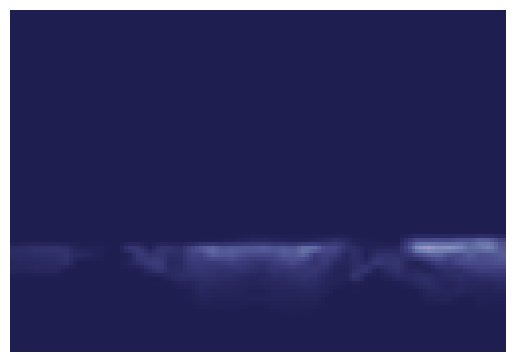

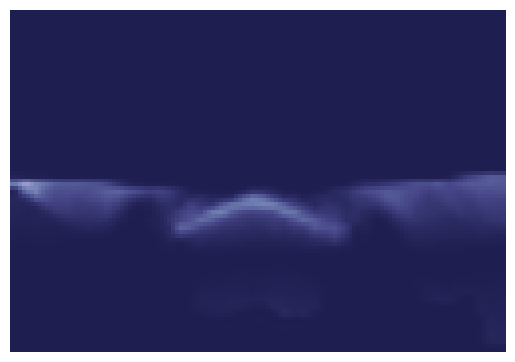

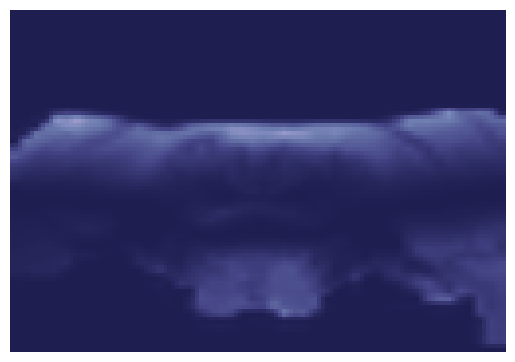

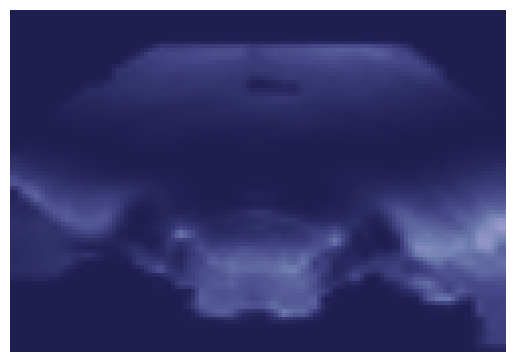

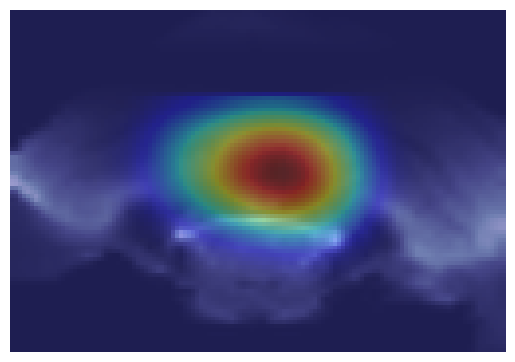

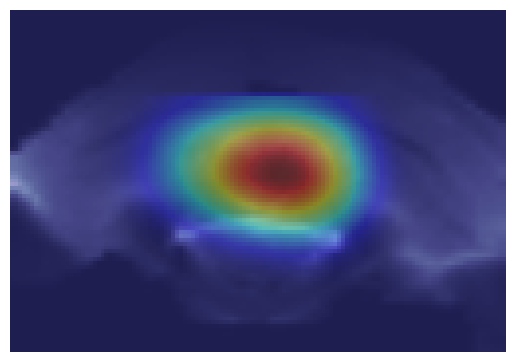

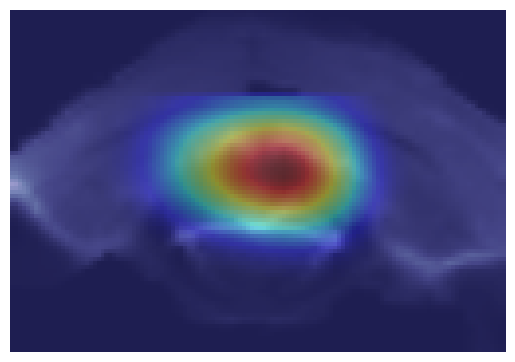

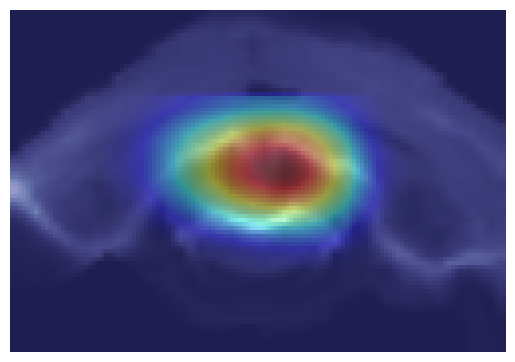

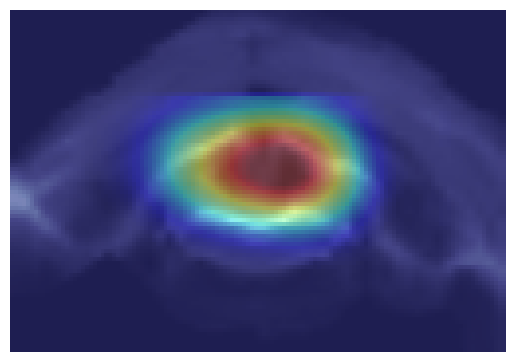

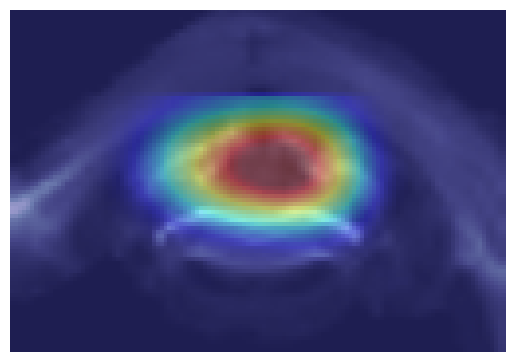

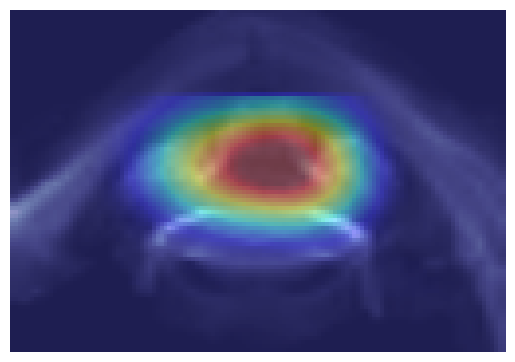

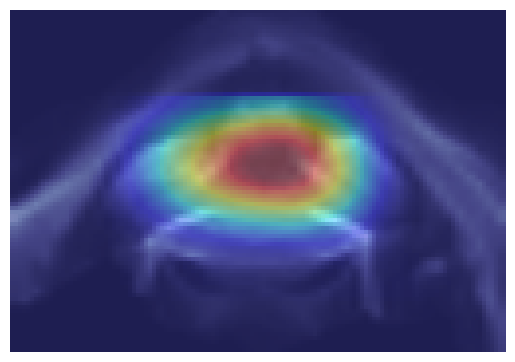

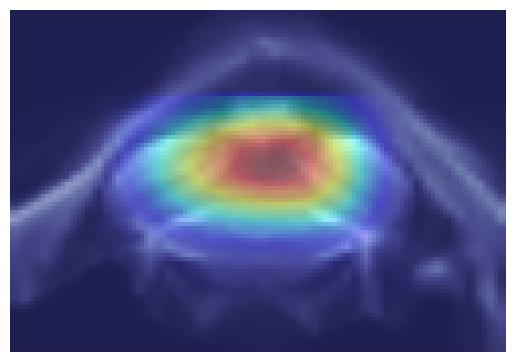

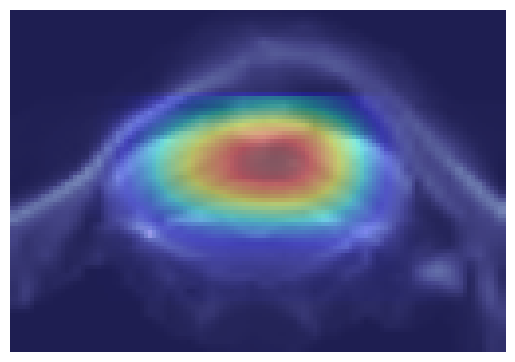

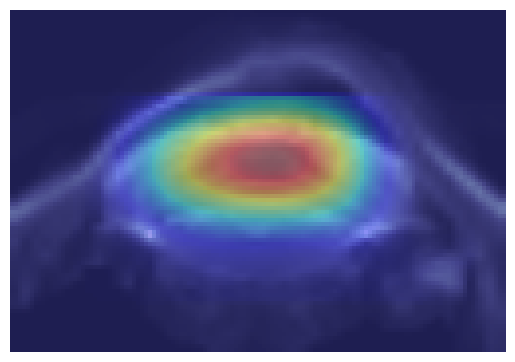

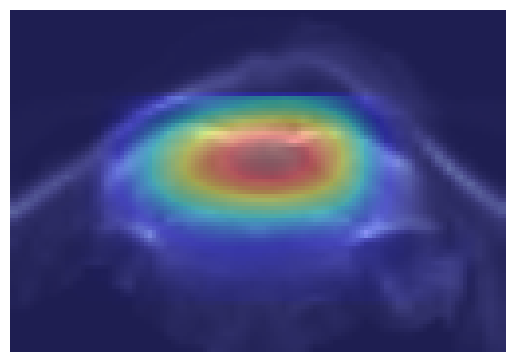

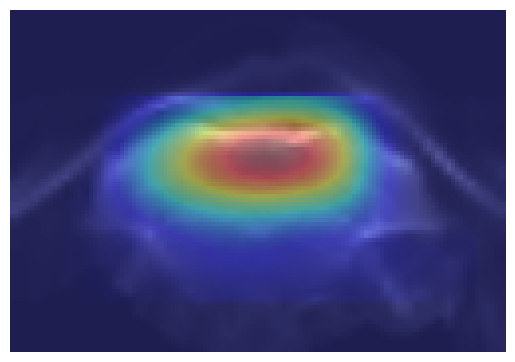

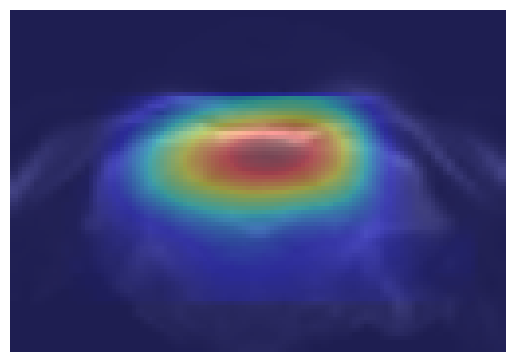

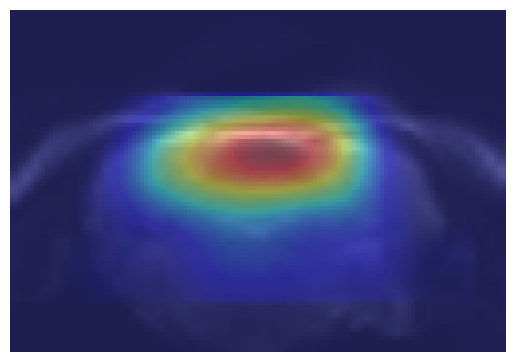

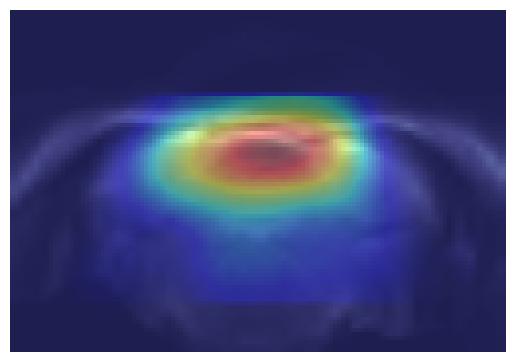

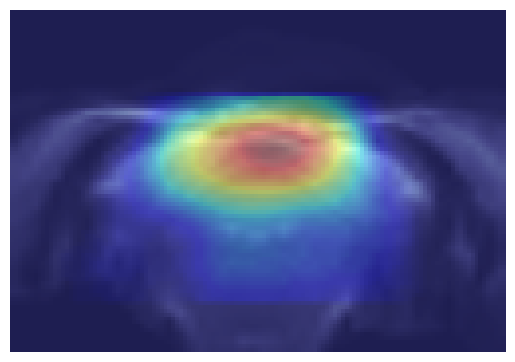

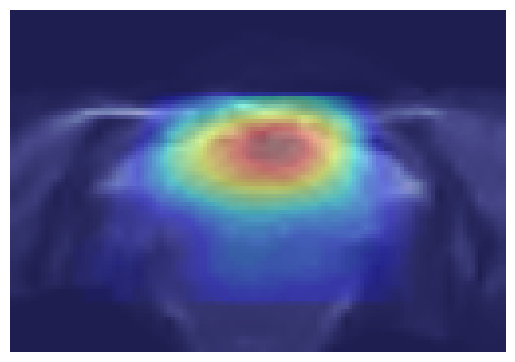

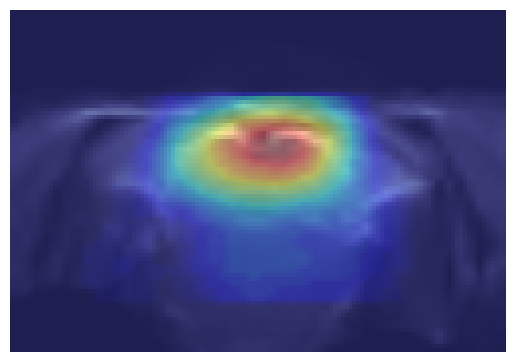

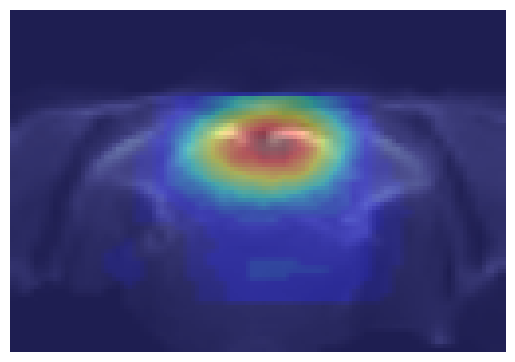

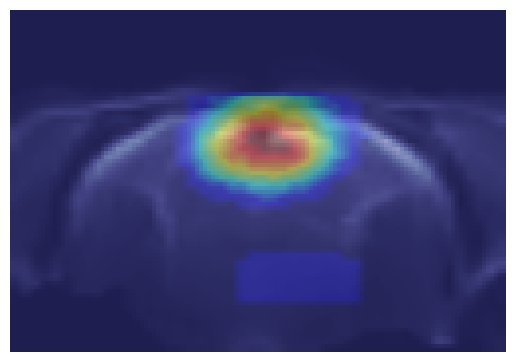

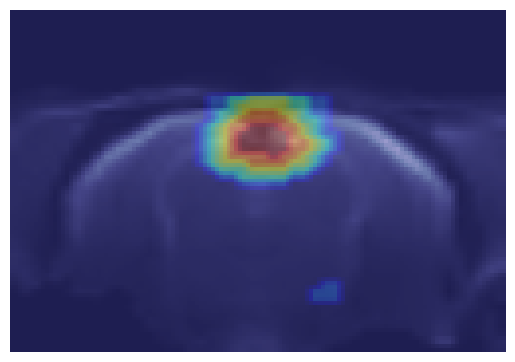

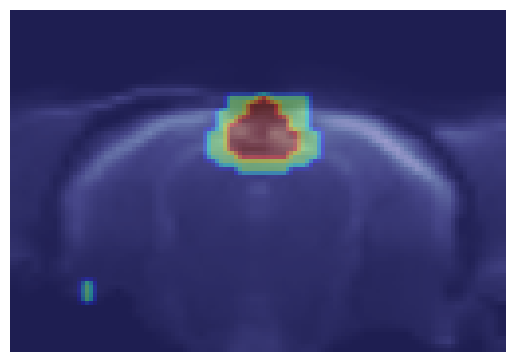

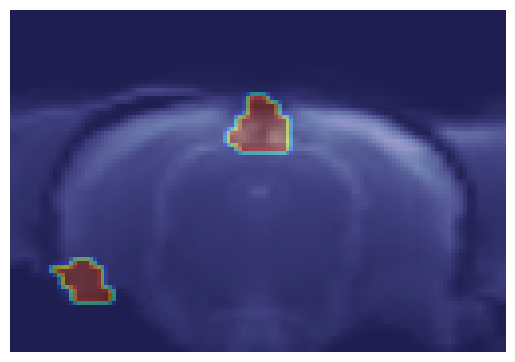

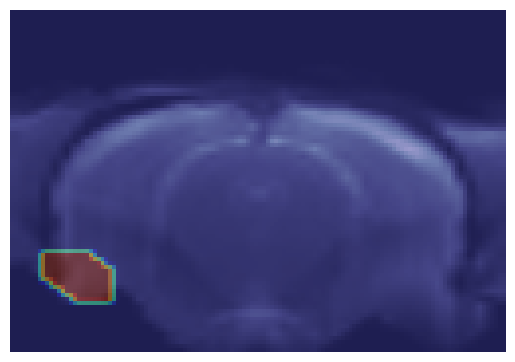

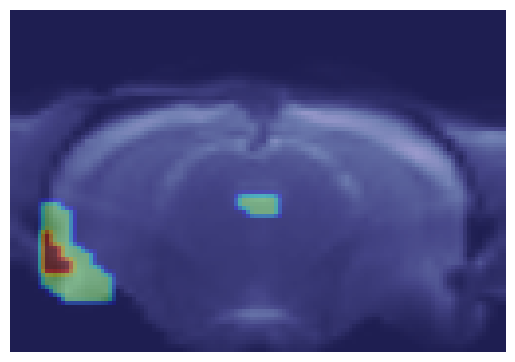

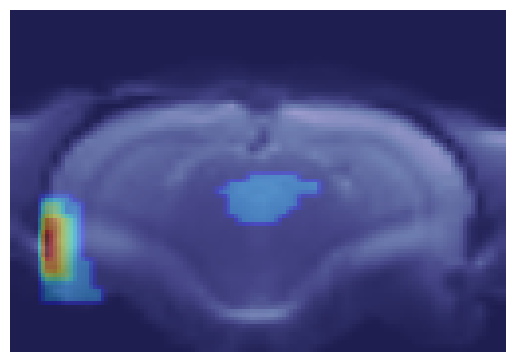

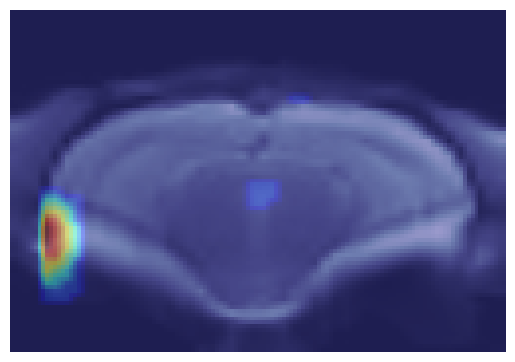

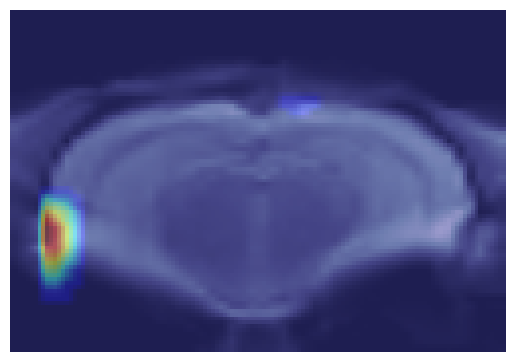

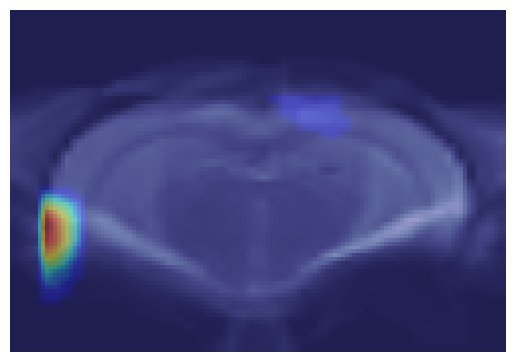

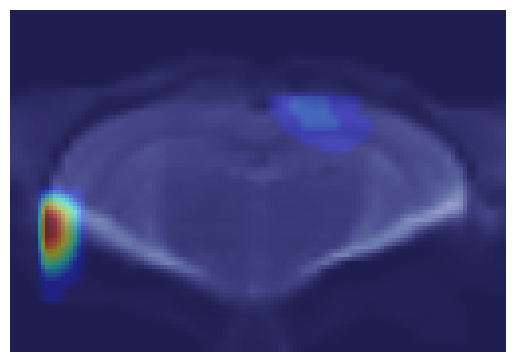

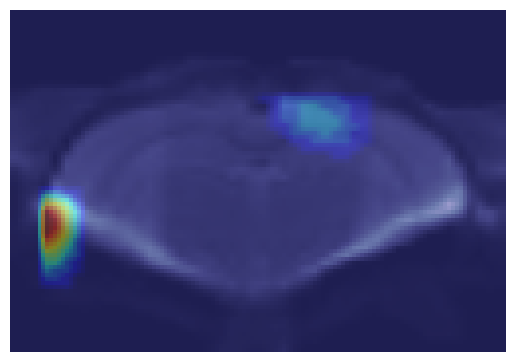

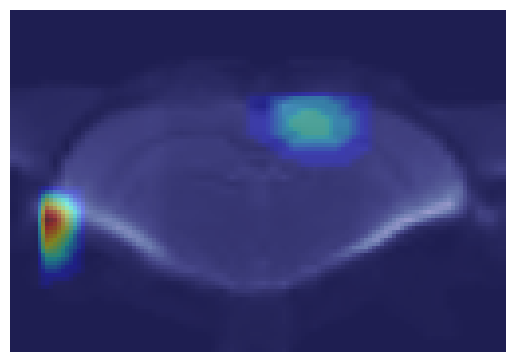

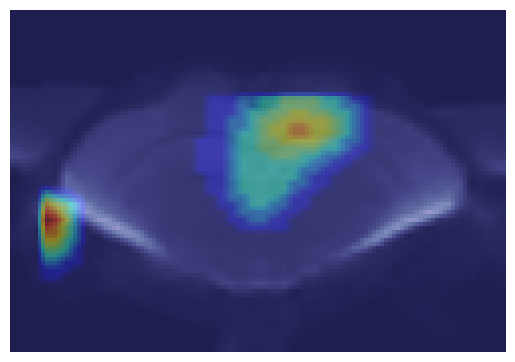

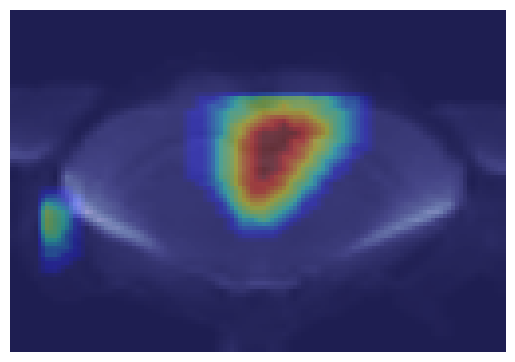

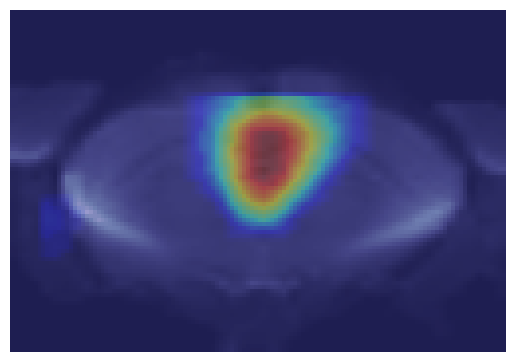

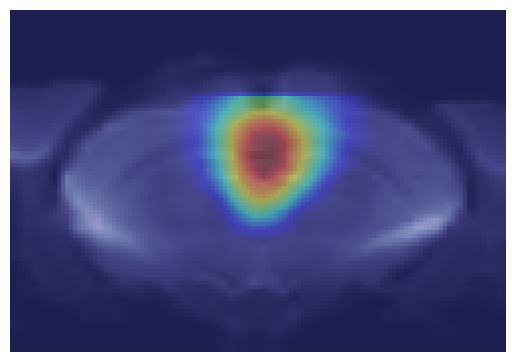

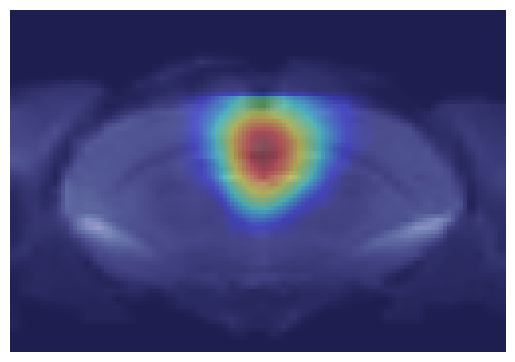

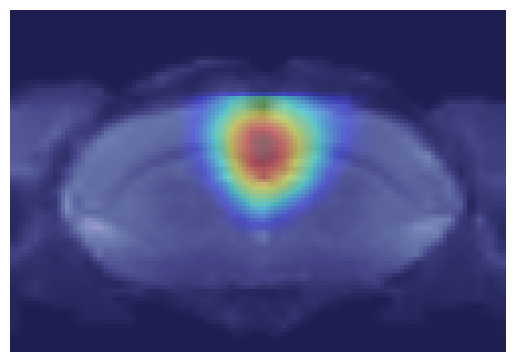

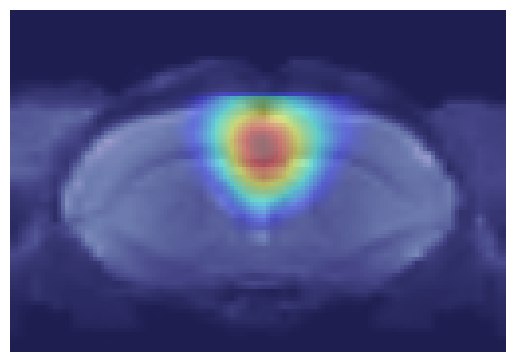

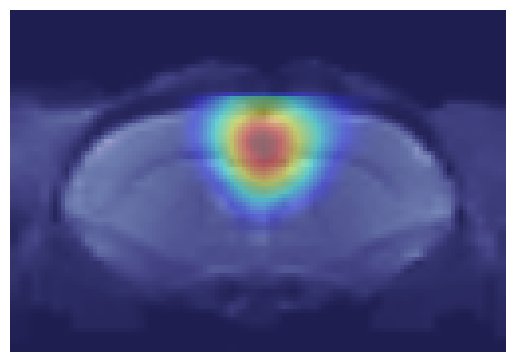

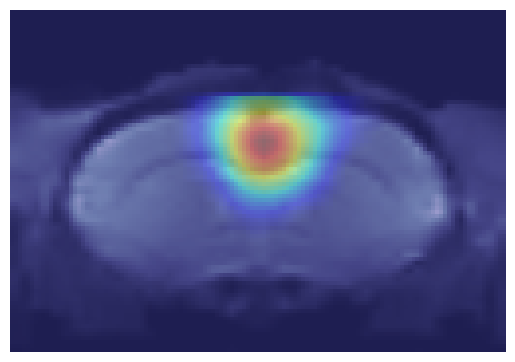

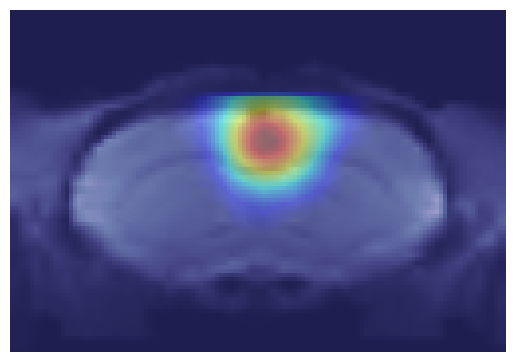

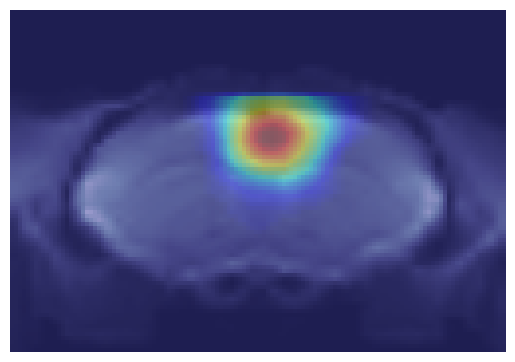

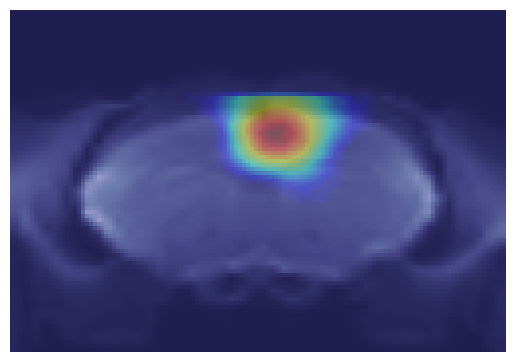

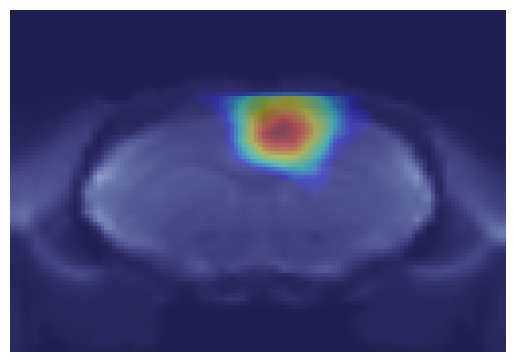

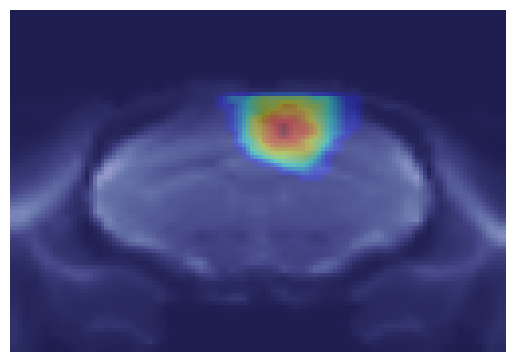

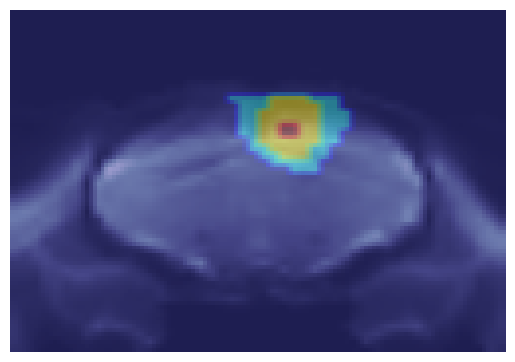

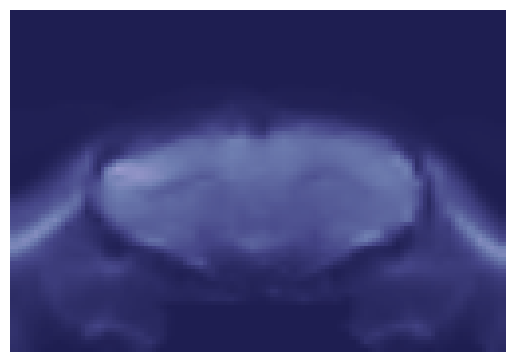

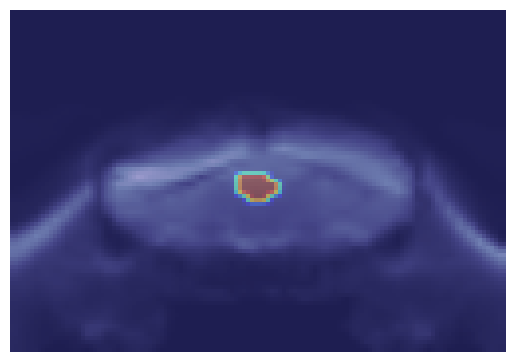

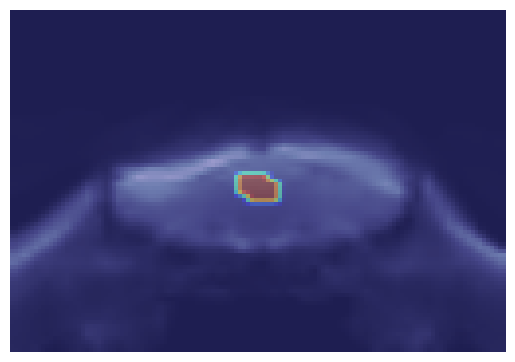

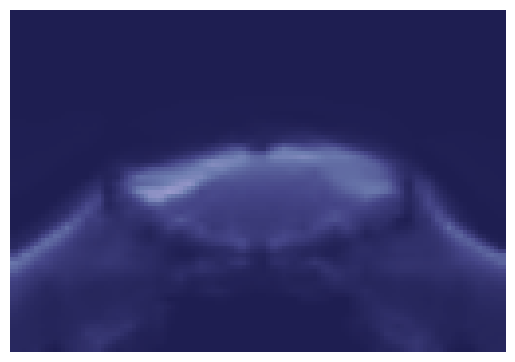

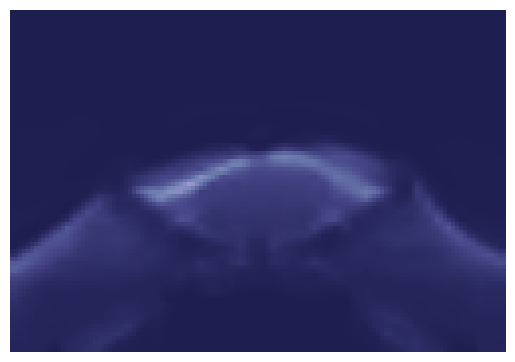

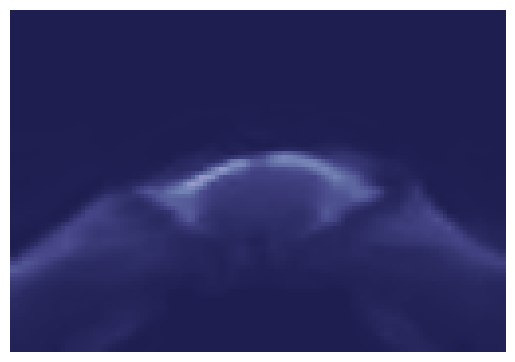

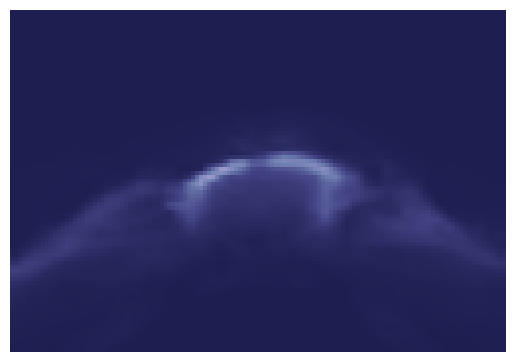

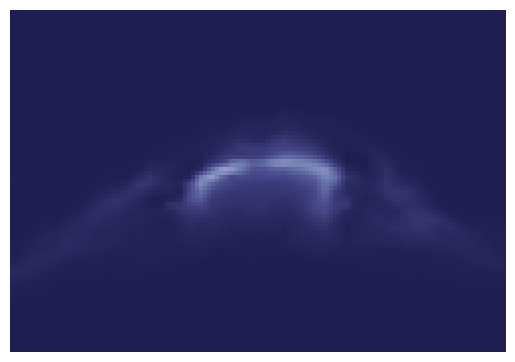

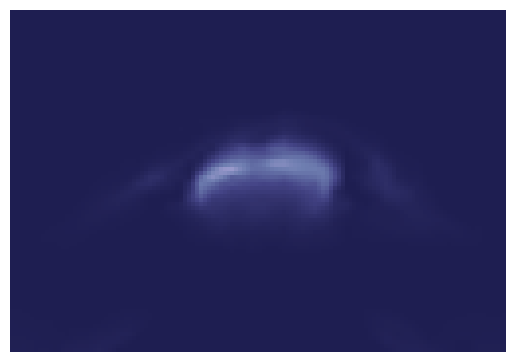

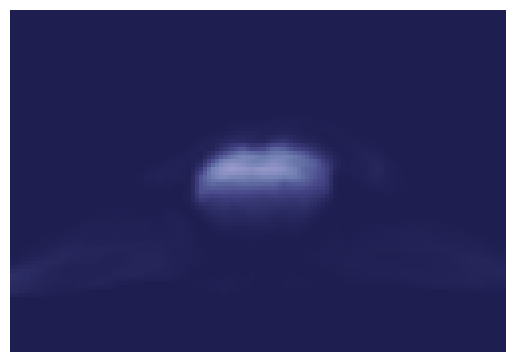

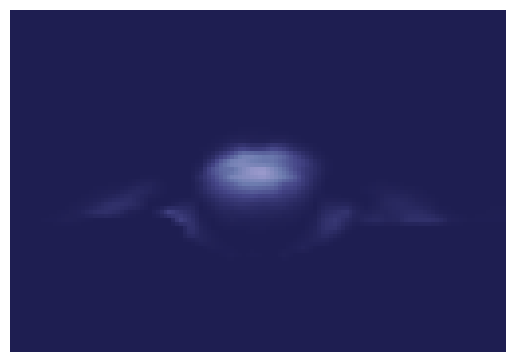

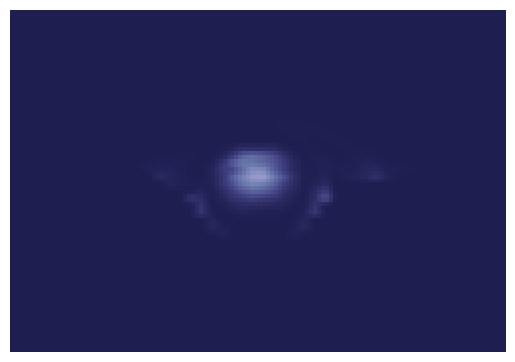

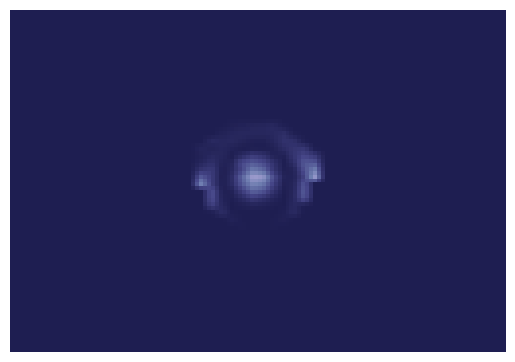

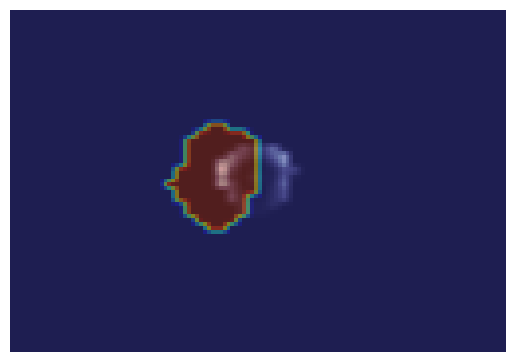

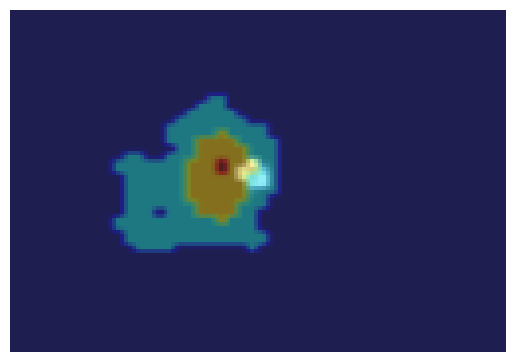

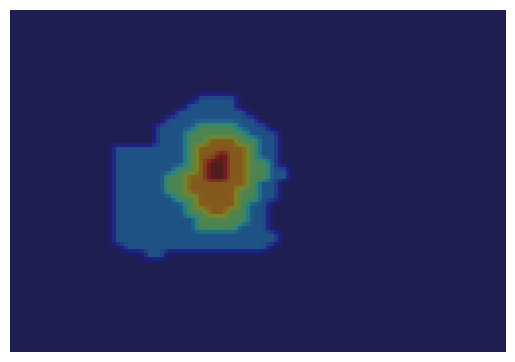

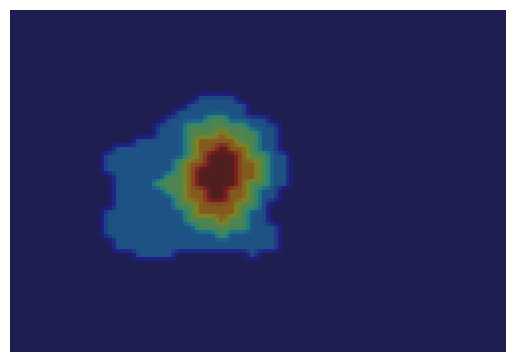

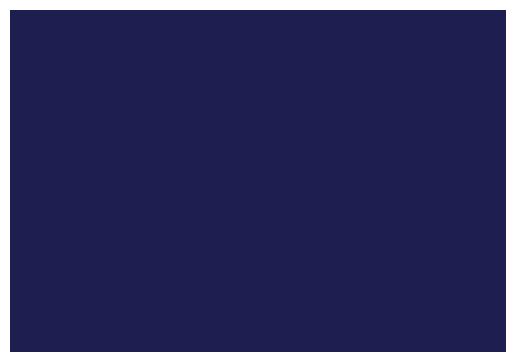

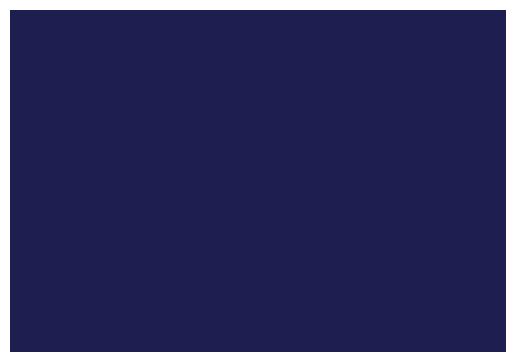

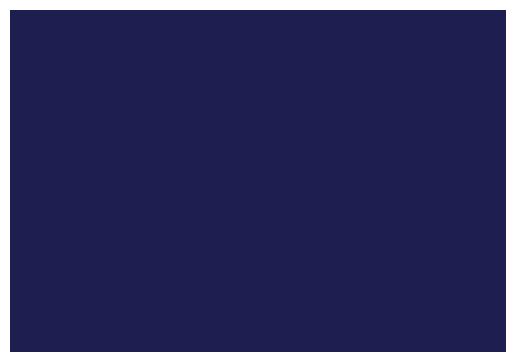

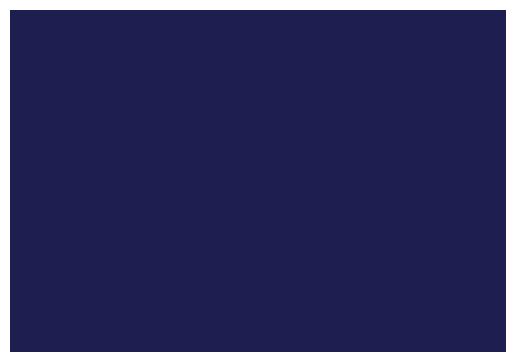

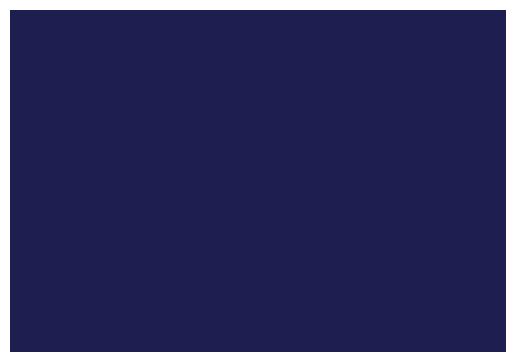

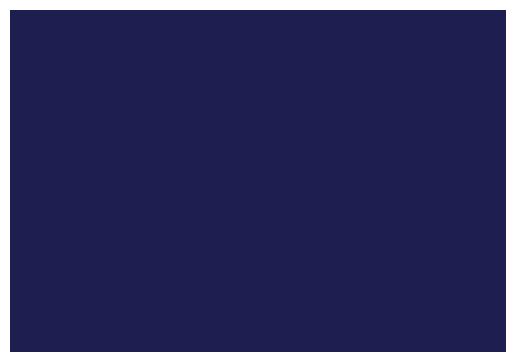

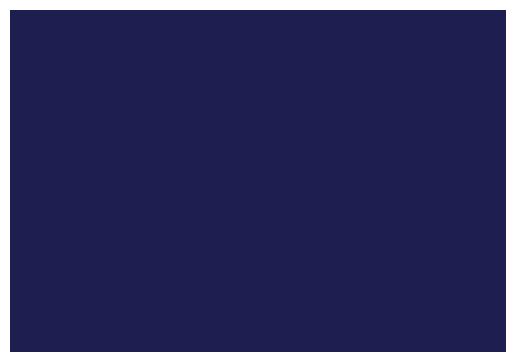

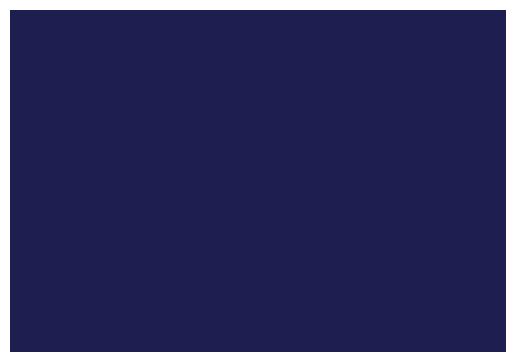

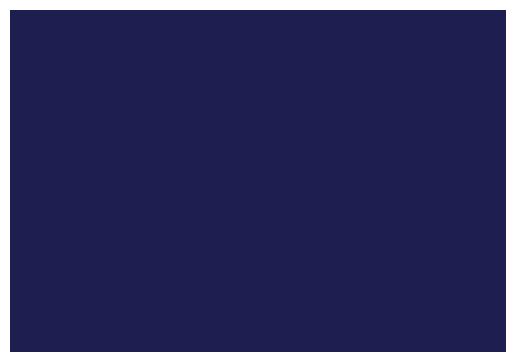

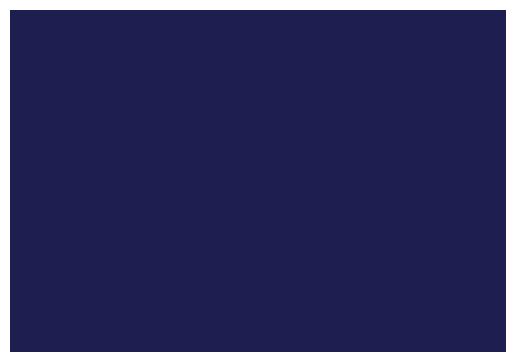

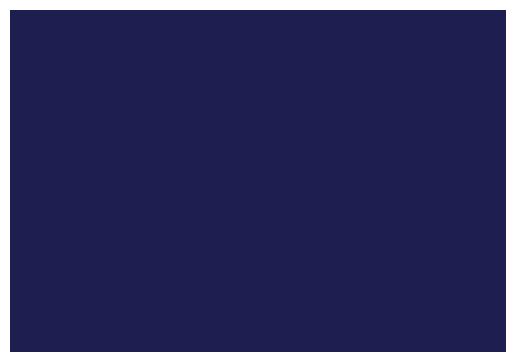

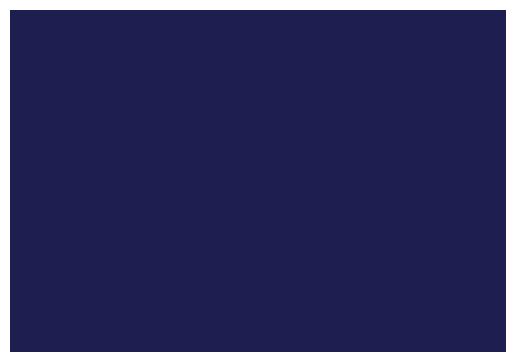

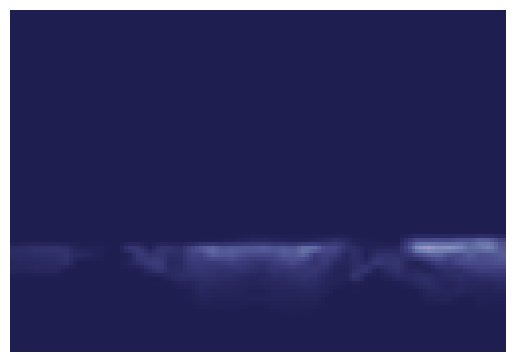

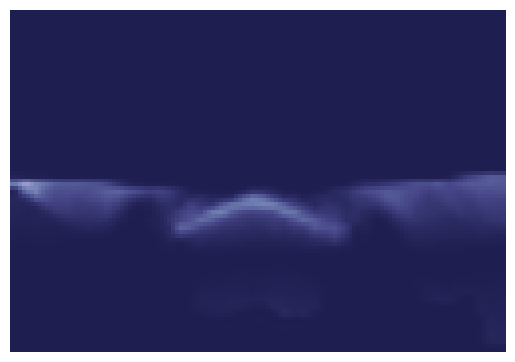

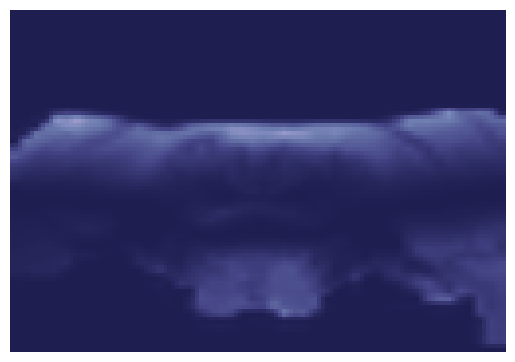

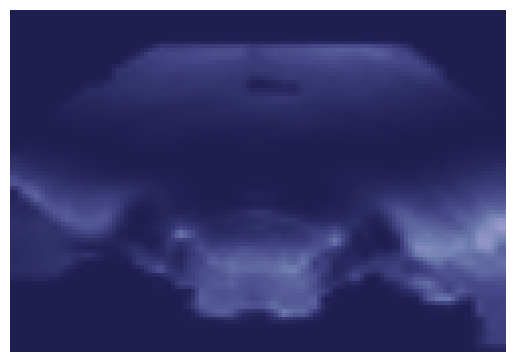

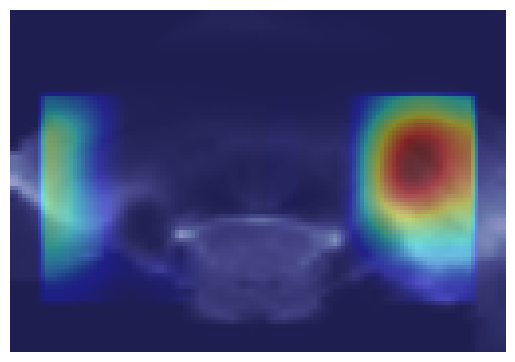

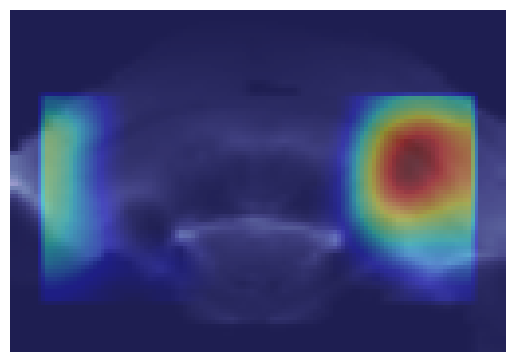

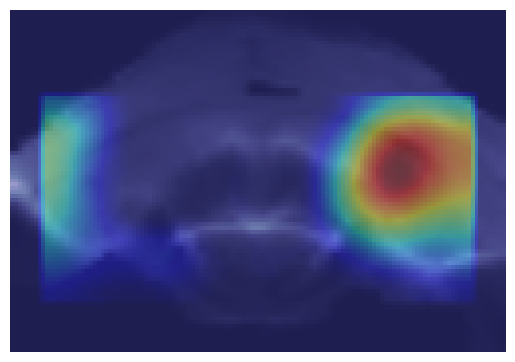

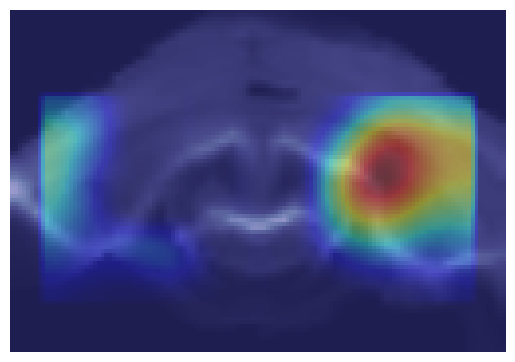

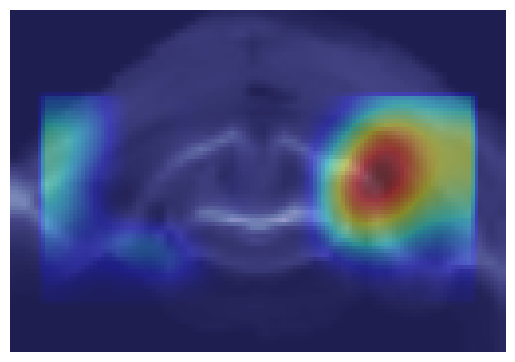

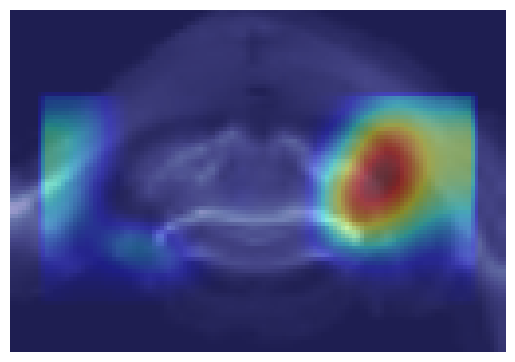

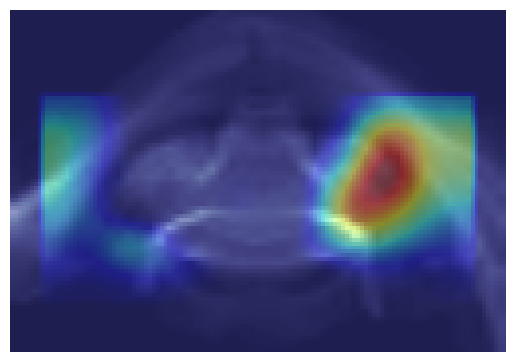

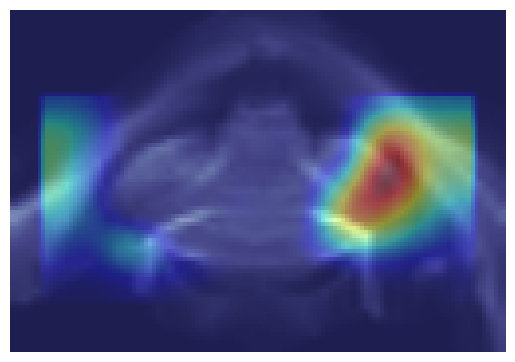

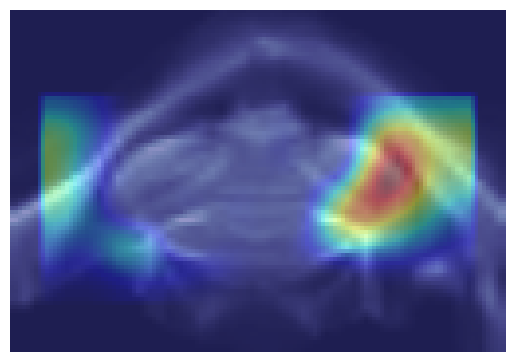

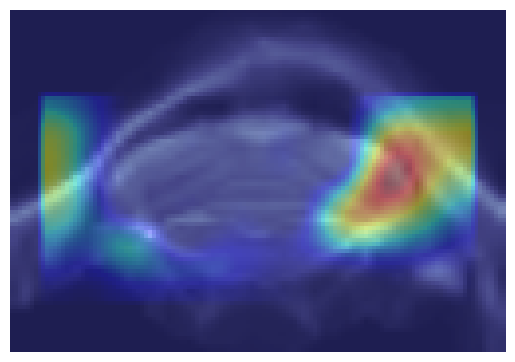

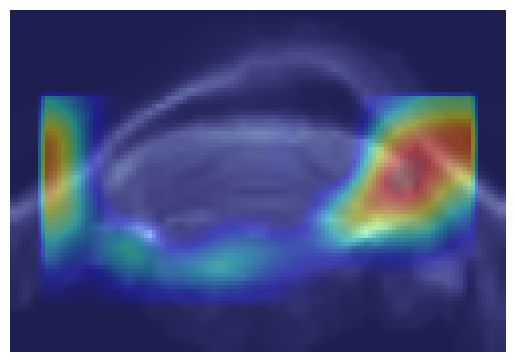

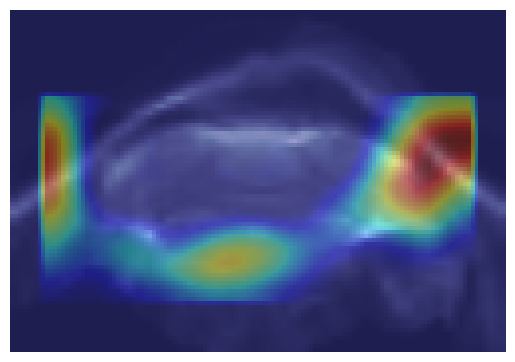

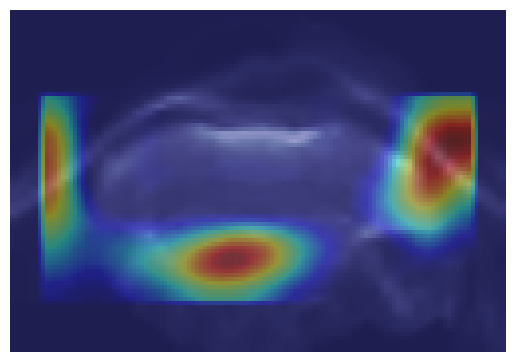

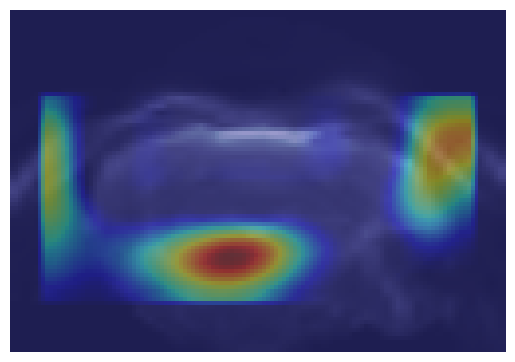

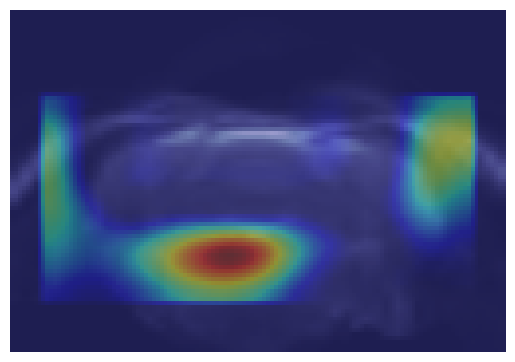

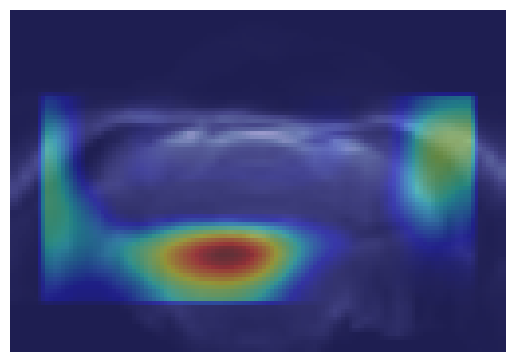

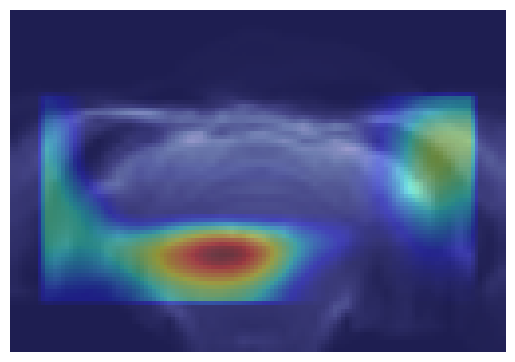

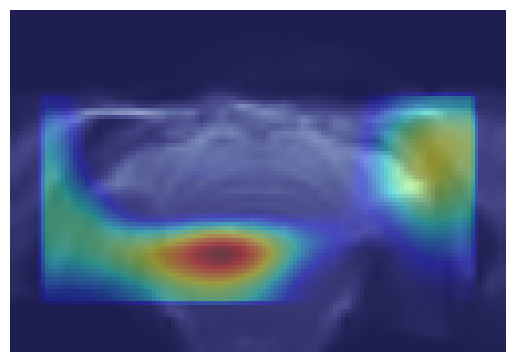

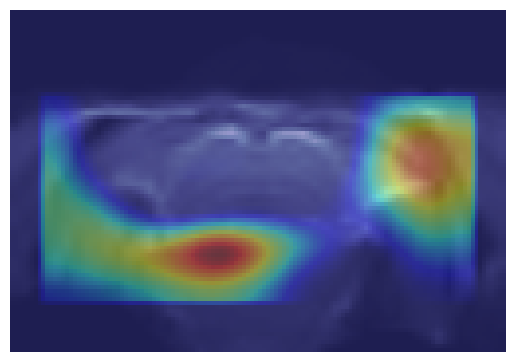

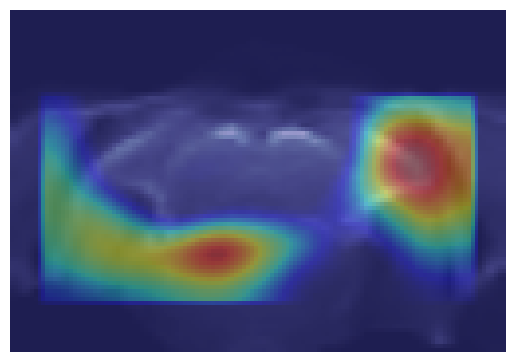

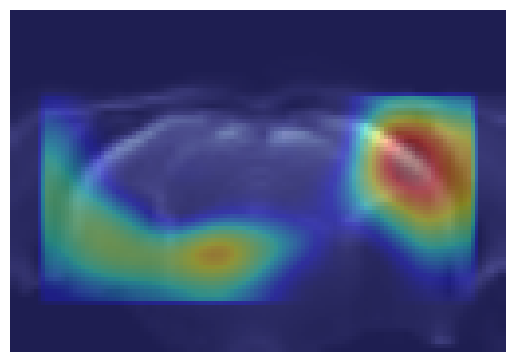

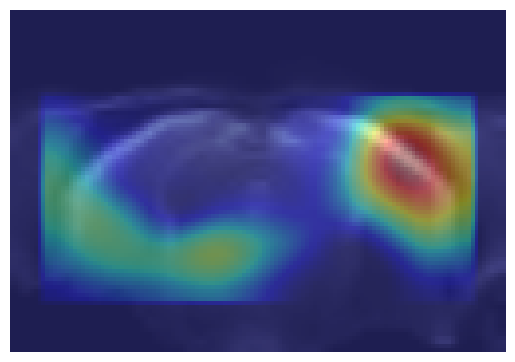

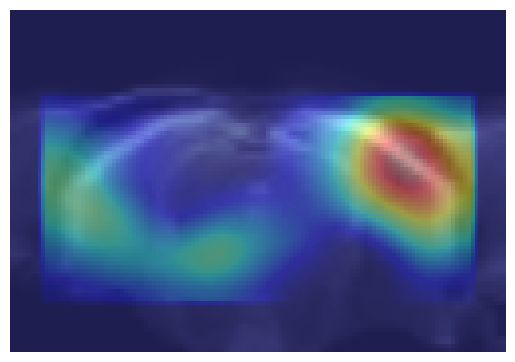

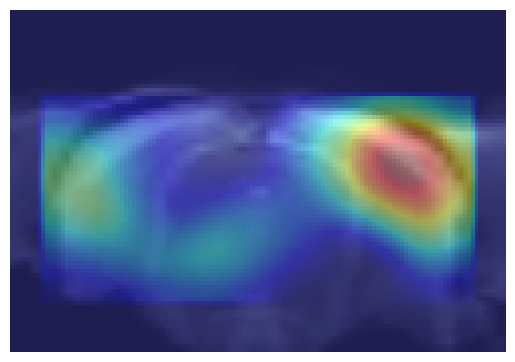

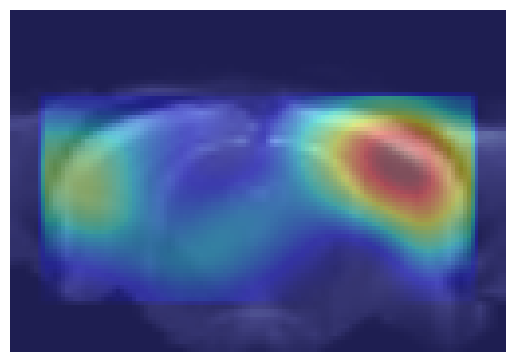

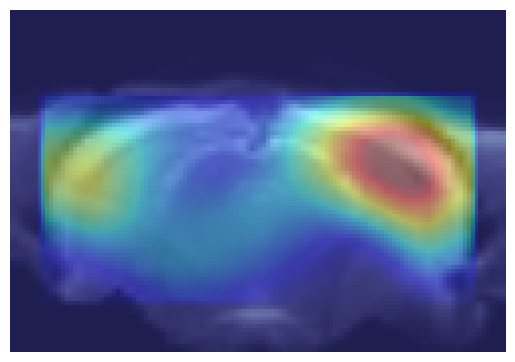

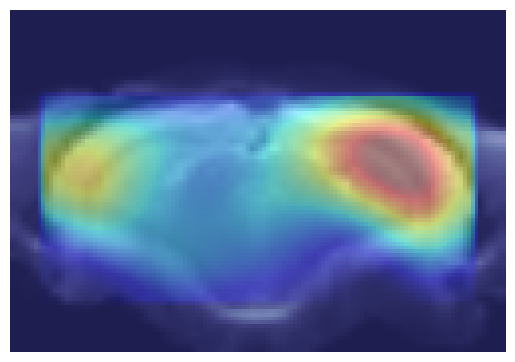

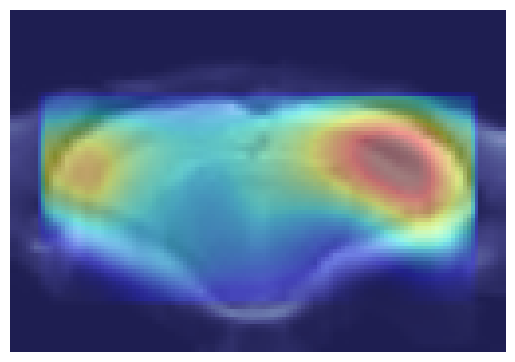

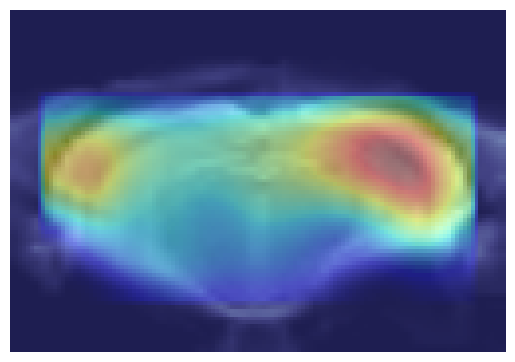

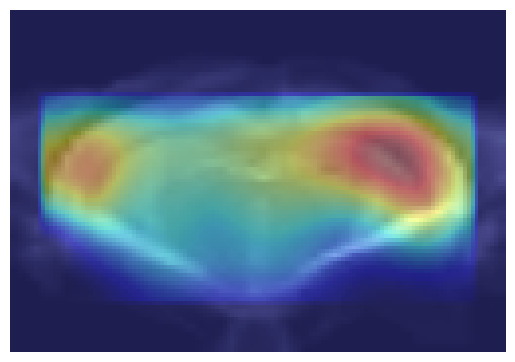

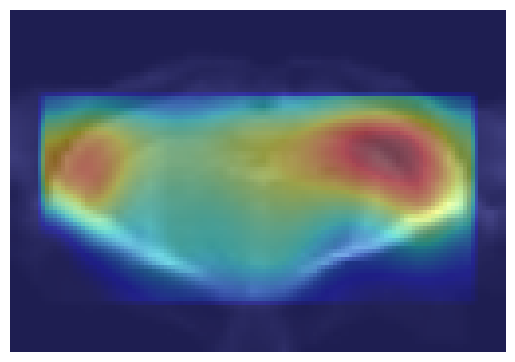

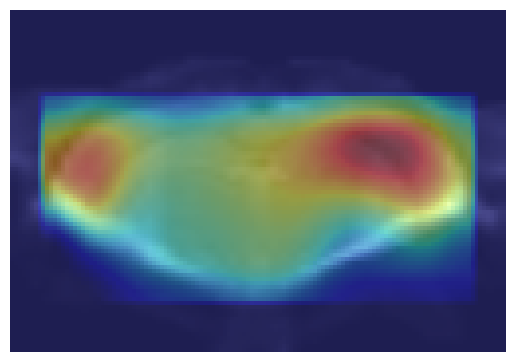

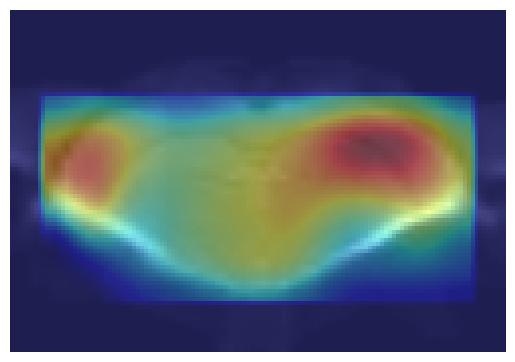

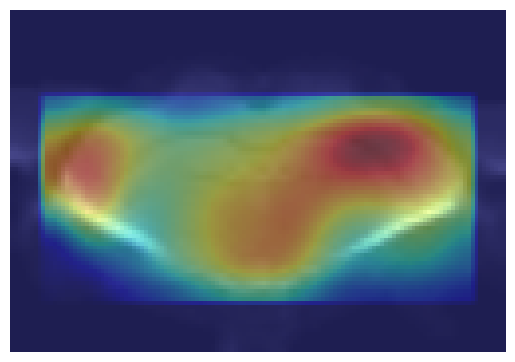

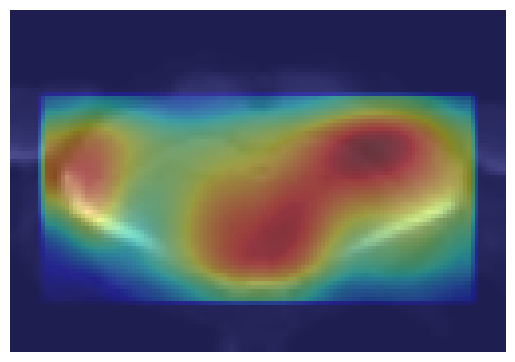

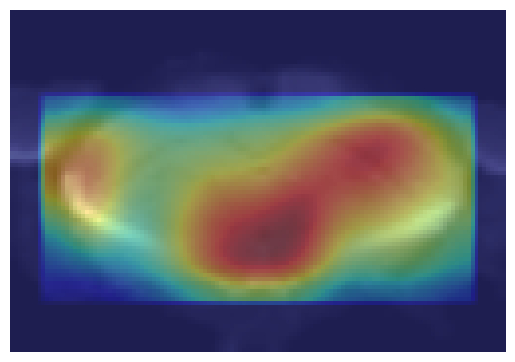

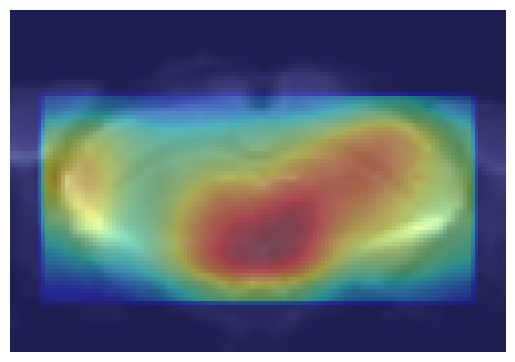

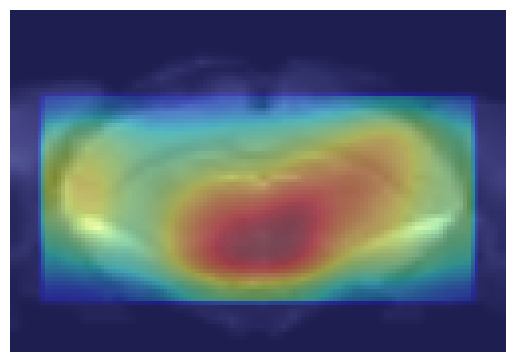

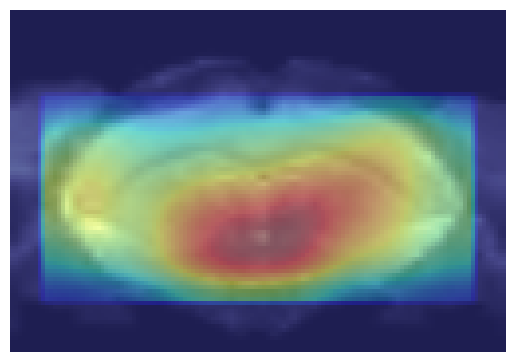

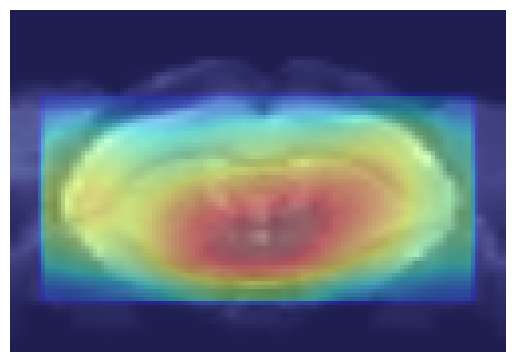

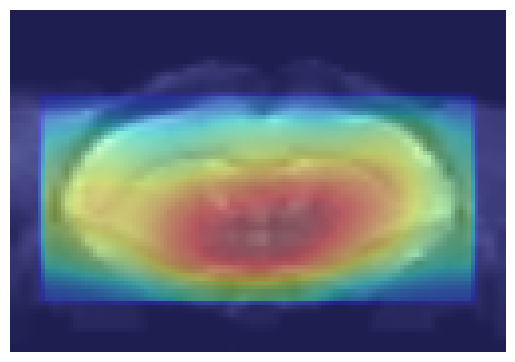

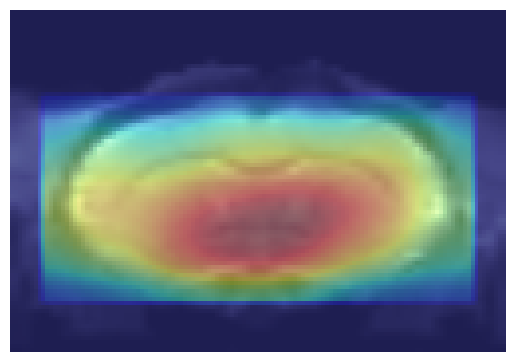

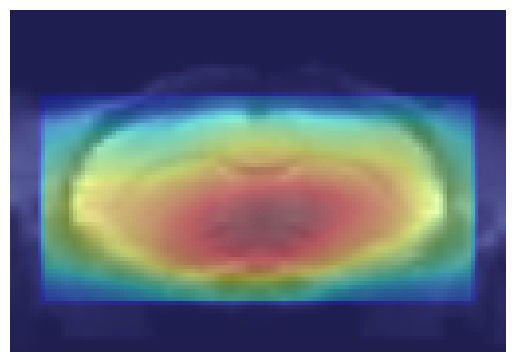

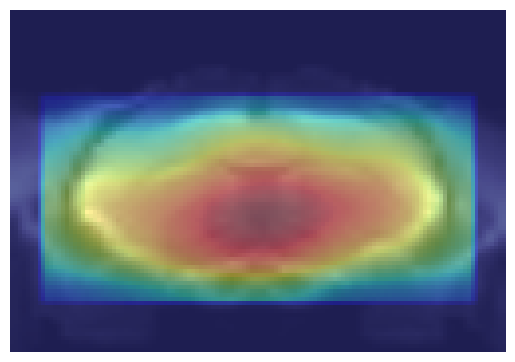

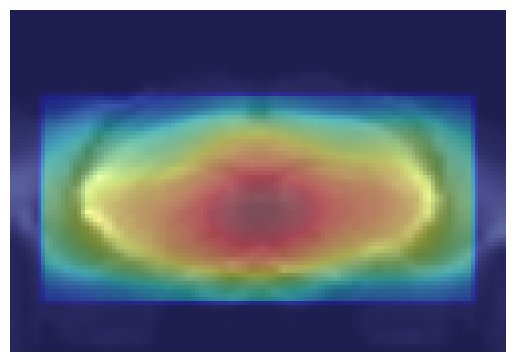

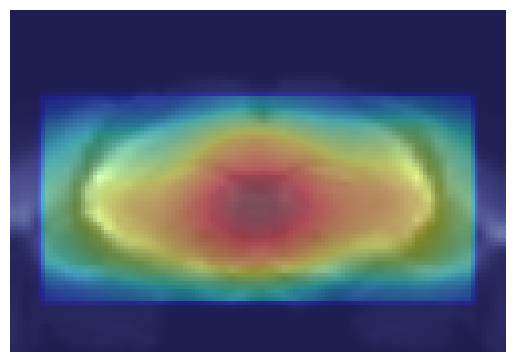

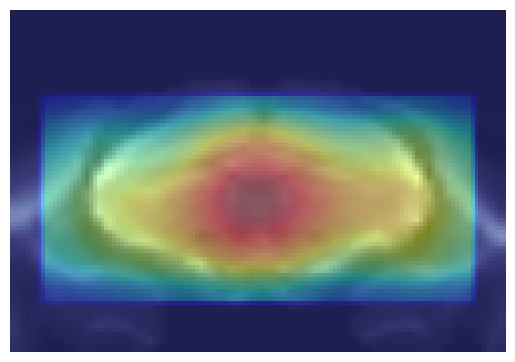

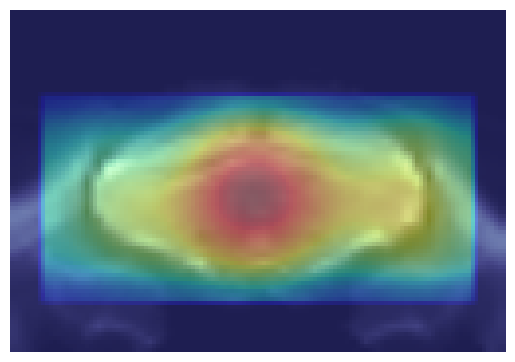

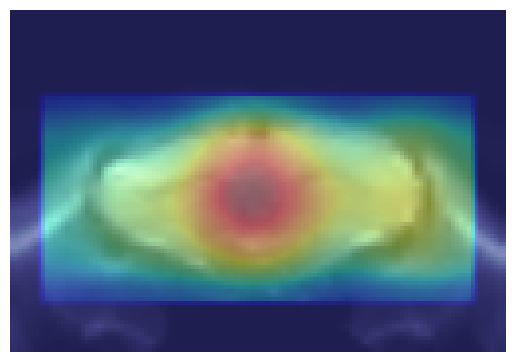

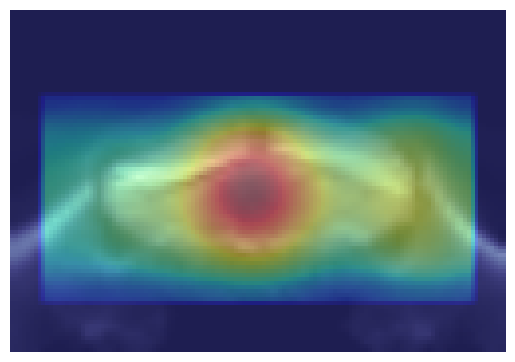

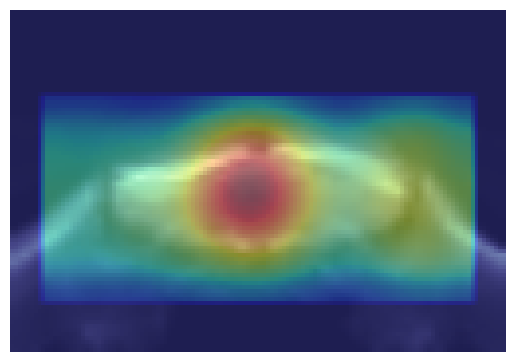

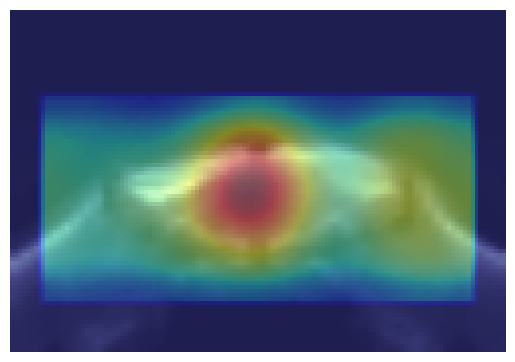

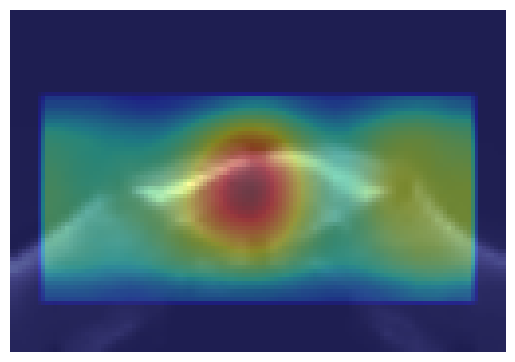

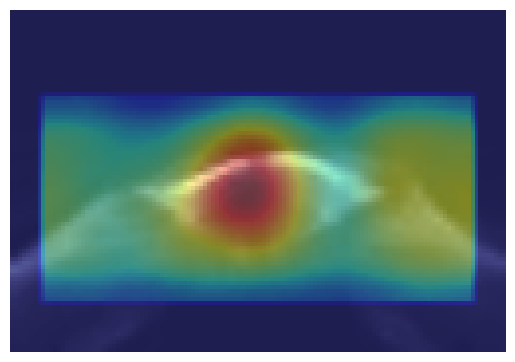

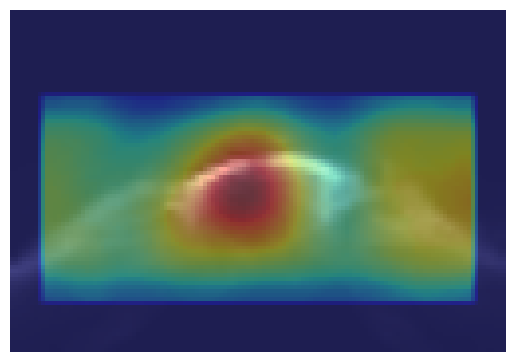

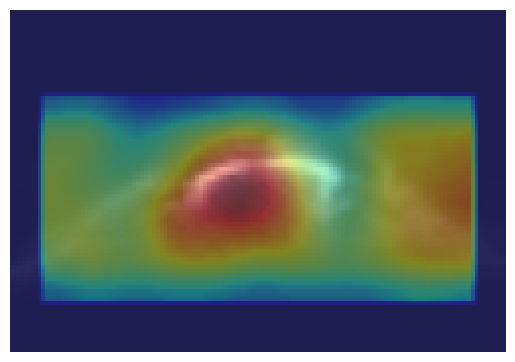

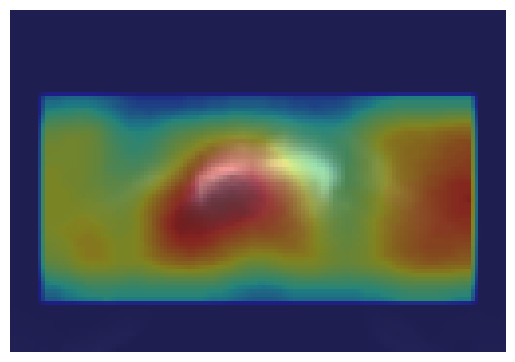

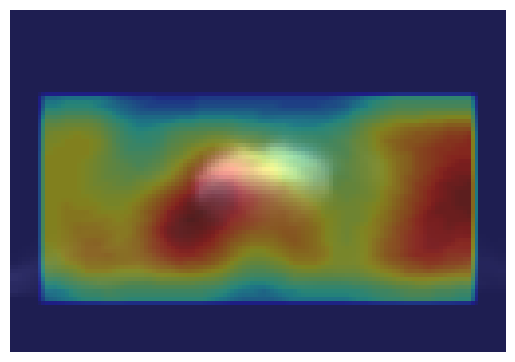

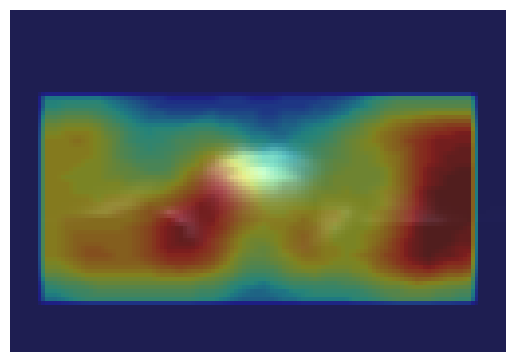

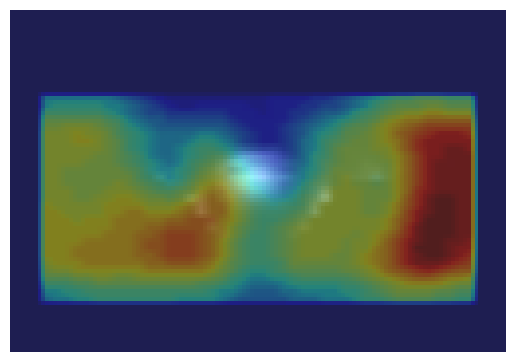

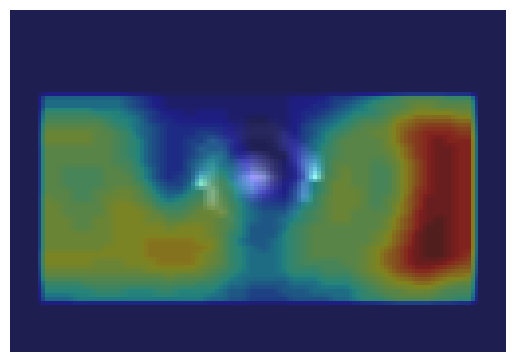

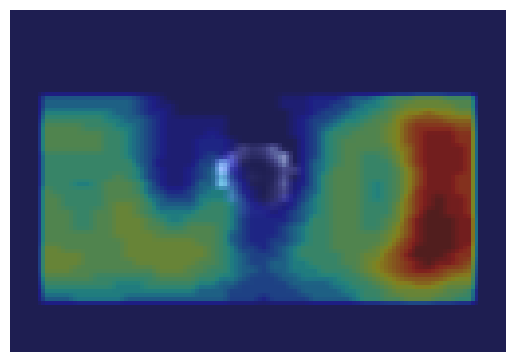

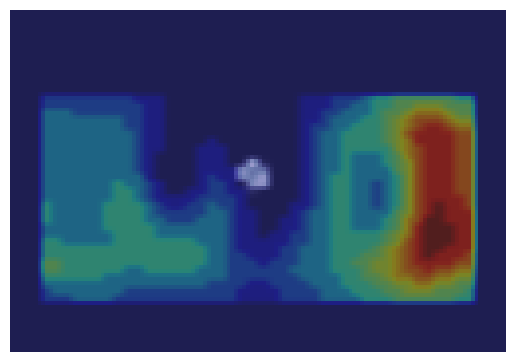

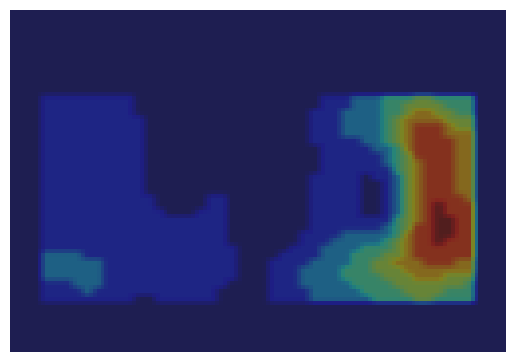

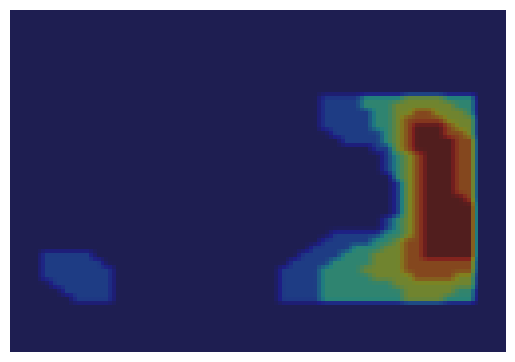

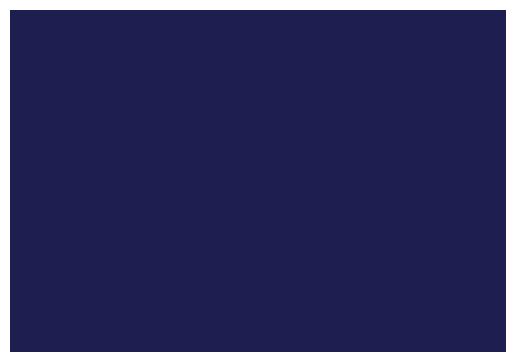

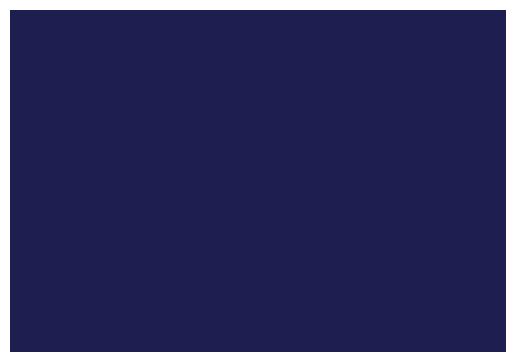

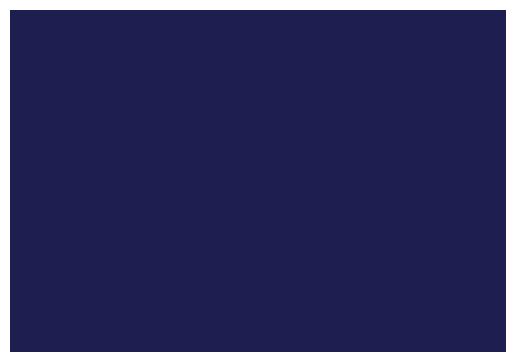

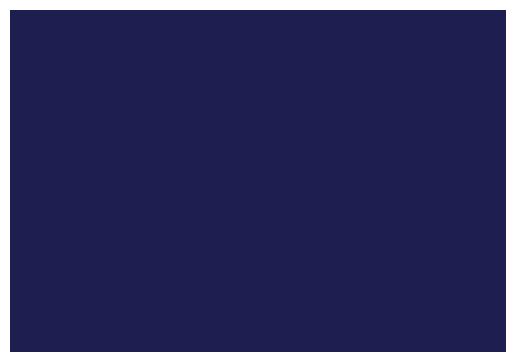

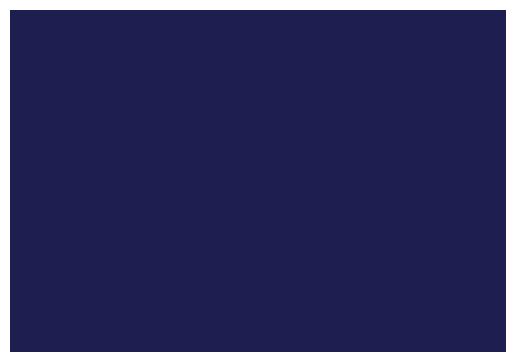

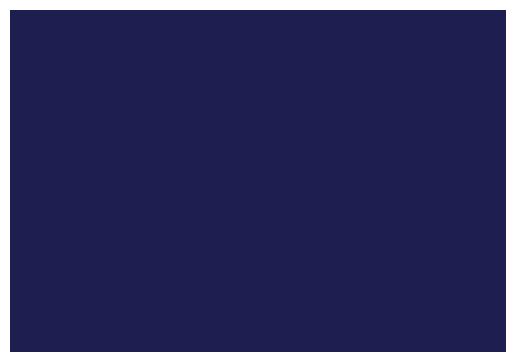

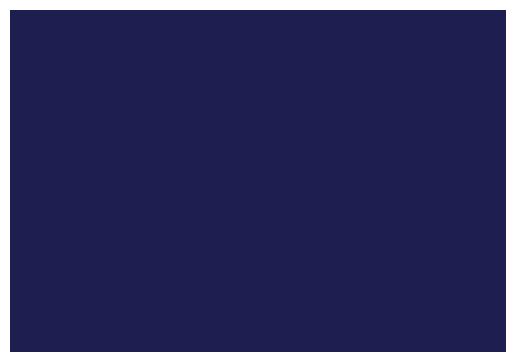

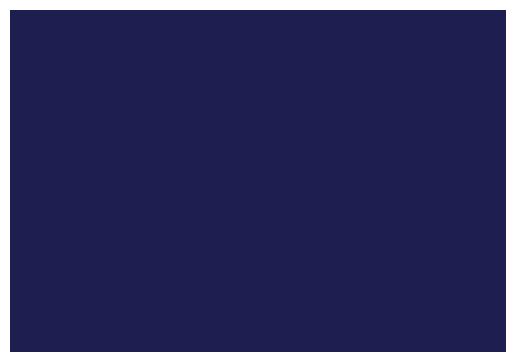

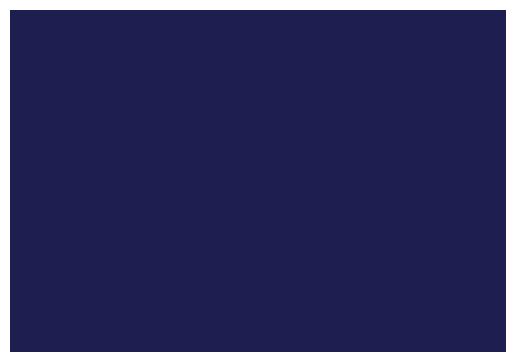

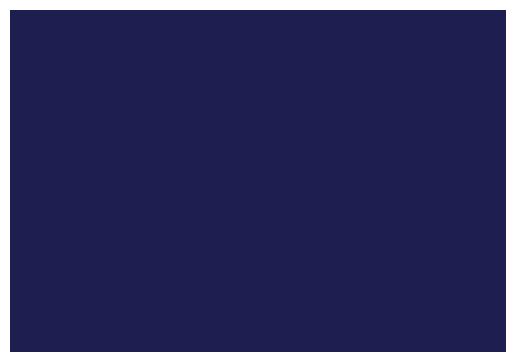

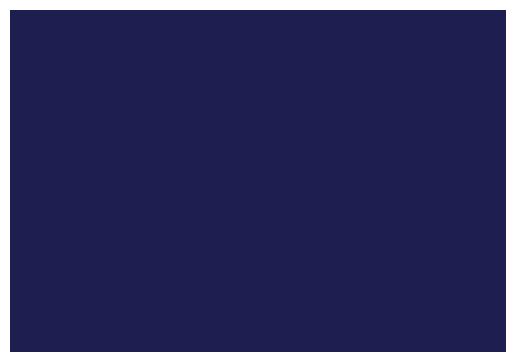

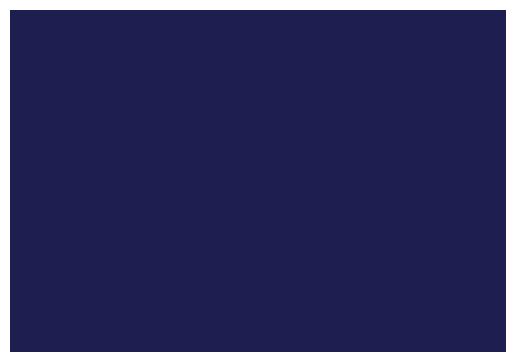

CM CNN


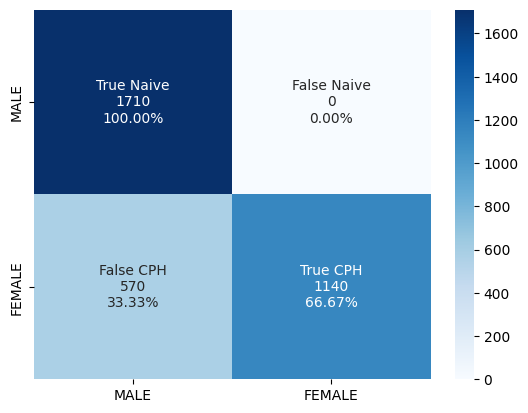

wandb: WARNING `format` argument was not provided, defaulting to `gif`. This parameter will be required in v0.20.0, please specify the format explicitly.
wandb: WARNING `format` argument was not provided, defaulting to `gif`. This parameter will be required in v0.20.0, please specify the format explicitly.
wandb: WARNING `format` argument was not provided, defaulting to `gif`. This parameter will be required in v0.20.0, please specify the format explicitly.
wandb: WARNING `format` argument was not provided, defaulting to `gif`. This parameter will be required in v0.20.0, please specify the format explicitly.


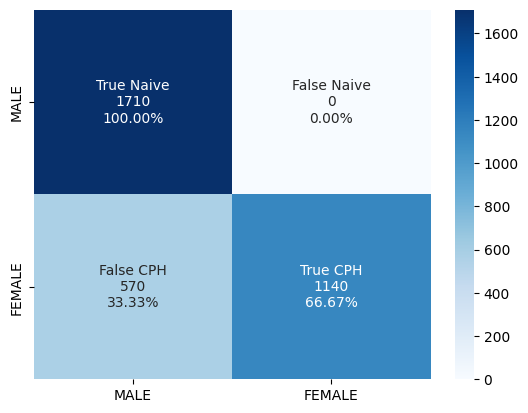

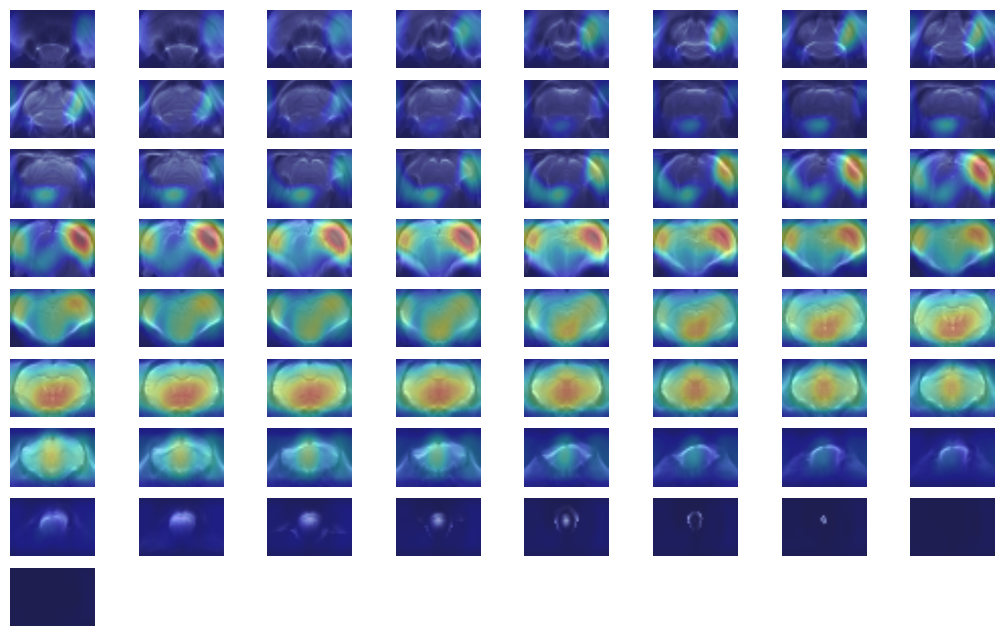

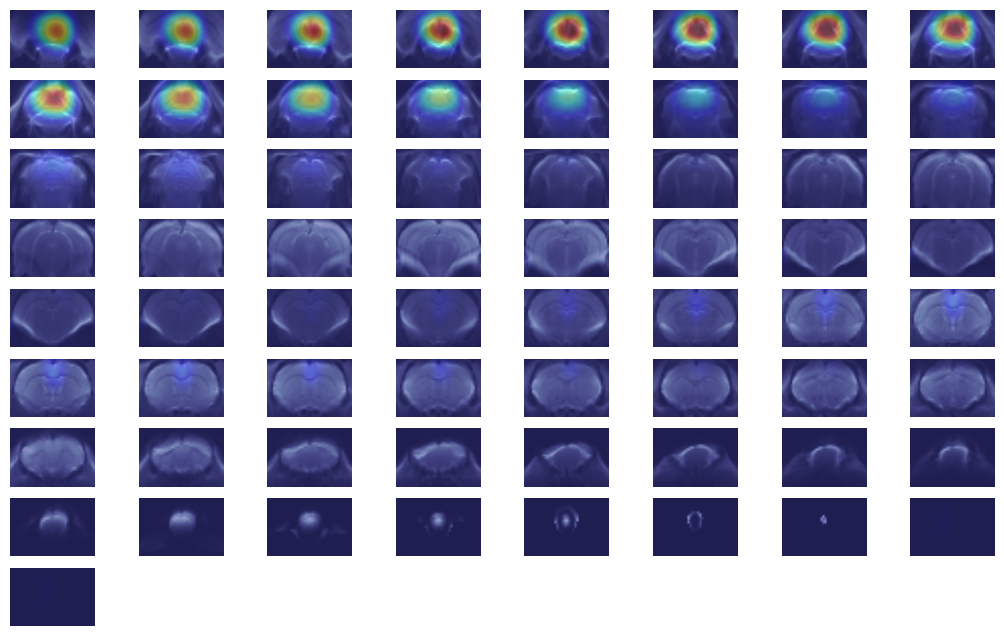

Run # 2


sub train:
['F:/rabies/preprocess_batch-002_rest/bold_datasink/commonspace_bold/_scan_info_subject_id083.session01_split_name_sub-083_ses-01_desc-o_T2w/_run_None/sub-083_ses-01_task-rest_desc-oa_bold_autobox_combined.nii.gz'
 'F:/rabies/preprocess_batch-001_rest/bold_datasink/commonspace_bold/_scan_info_subject_id051.session01_split_name_sub-051_ses-01_desc-o_T2w/_run_None/sub-051_ses-01_task-rest_desc-oa_bold_autobox_combined.nii.gz'
 'F:/rabies/preprocess_batch-002_rest/bold_datasink/commonspace_bold/_scan_info_subject_id080.session01_split_name_sub-080_ses-01_desc-o_T2w/_run_None/sub-080_ses-01_task-rest_desc-oa_bold_autobox_combined.nii.gz'
 'F:/rabies/preprocess_batch-002_rest/bold_datasink/commonspace_bold/_scan_info_subject_id083.session02_split_name_sub-083_ses-02_desc-o_T2w/_run_None/sub-083_ses-02_task-rest_desc-oa_bold_autobox_combined.nii.gz'
 'F:/rabies/preprocess_batch-001_rest/bold_datasink/commonspace_bold/_scan_info_subject_id051.session02_split_name_sub-051_ses-02_des

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


114/114 [==============================] - 1274s 11s/step - loss: 64.4714 - Accuracy: 0.4839 - val_loss: 61.9050 - val_Accuracy: 0.5000 - combine_metric: 0.0081
Epoch 2/10
114/114 [==============================] - 1375s 12s/step - loss: 59.3740 - Accuracy: 0.5088 - val_loss: 56.8432 - val_Accuracy: 0.4452 - combine_metric: 0.0078
Epoch 3/10
114/114 [==============================] - 1168s 10s/step - loss: 54.4534 - Accuracy: 0.5041 - val_loss: 52.0760 - val_Accuracy: 0.3908 - combine_metric: 0.0075
Epoch 4/10
114/114 [==============================] - ETA: 0s - loss: 49.8563 - Accuracy: 0.5015

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


114/114 [==============================] - 1198s 10s/step - loss: 49.8563 - Accuracy: 0.5015 - val_loss: 47.6576 - val_Accuracy: 0.5000 - combine_metric: 0.0105
Epoch 5/10
114/114 [==============================] - ETA: 0s - loss: 45.6150 - Accuracy: 0.5061 

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


114/114 [==============================] - 1225s 11s/step - loss: 45.6150 - Accuracy: 0.5061 - val_loss: 43.5958 - val_Accuracy: 0.5000 - combine_metric: 0.0115
Epoch 6/10
114/114 [==============================] - ETA: 0s - loss: 41.7399 - Accuracy: 0.5222 

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


114/114 [==============================] - 1271s 11s/step - loss: 41.7399 - Accuracy: 0.5222 - val_loss: 39.9145 - val_Accuracy: 0.5000 - combine_metric: 0.0125
Epoch 7/10
114/114 [==============================] - ETA: 0s - loss: 38.2287 - Accuracy: 0.5058 

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


114/114 [==============================] - 1298s 11s/step - loss: 38.2287 - Accuracy: 0.5058 - val_loss: 36.5650 - val_Accuracy: 0.5000 - combine_metric: 0.0137
Epoch 8/10
114/114 [==============================] - ETA: 0s - loss: 35.0329 - Accuracy: 0.5079

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


114/114 [==============================] - 1206s 10s/step - loss: 35.0329 - Accuracy: 0.5079 - val_loss: 33.5334 - val_Accuracy: 0.5000 - combine_metric: 0.0149
Epoch 9/10
114/114 [==============================] - ETA: 0s - loss: 32.1638 - Accuracy: 0.5269

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


114/114 [==============================] - 1187s 10s/step - loss: 32.1638 - Accuracy: 0.5269 - val_loss: 30.8221 - val_Accuracy: 0.5000 - combine_metric: 0.0162
Epoch 10/10
114/114 [==============================] - ETA: 0s - loss: 29.6159 - Accuracy: 0.5339 

INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


INFO:tensorflow:Assets written to: c:\Users\PC-EIAD209\Desktop\AnaKei\NIPD-AI\clean-haze-62\assets


114/114 [==============================] - 1284s 11s/step - loss: 29.6159 - Accuracy: 0.5339 - val_loss: 28.4387 - val_Accuracy: 0.5000 - combine_metric: 0.0176
Duration (CNN): 3:28:33.373488
Evaluating best epoch
114/114 [==============================] - 98s 854ms/step - loss: 28.4374 - Accuracy: 0.5000
predicts CNN
114/114 [==============================] - 97s 853ms/step
mislabeled subjects:
 Counter({'F:/rabies/preprocess_batch-002_rest/bold_datasink/commonspace_bold/_scan_info_subject_id077.session02_split_name_sub-077_ses-02_desc-o_T2w/_run_None/sub-077_ses-02_task-rest_desc-oa_bold_autobox_combined.nii.gz': 570, 'F:/rabies/preprocess_batch-001_rest/bold_datasink/commonspace_bold/_scan_info_subject_id065.session02_split_name_sub-065_ses-02_desc-o_T2w/_run_None/sub-065_ses-02_task-rest_desc-oa_bold_autobox_combined.nii.gz': 570, 'F:/rabies/preprocess_batch-002_rest/bold_datasink/commonspace_bold/_scan_info_subject_id081.session02_split_name_sub-081_ses-02_desc-o_T2w/_run_None/sub

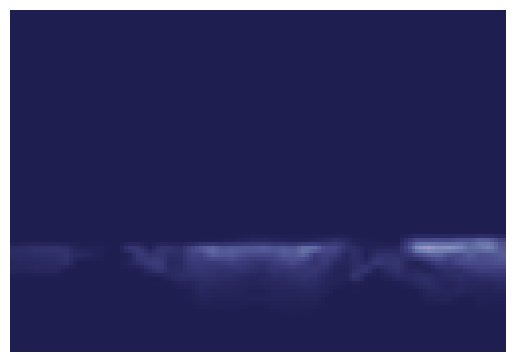

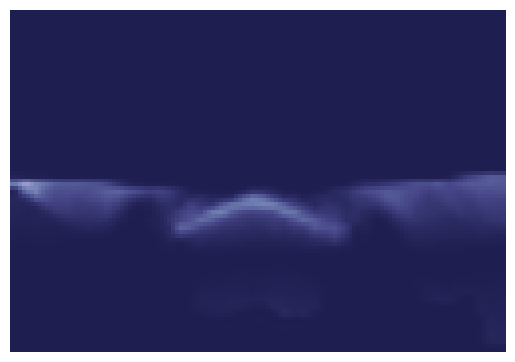

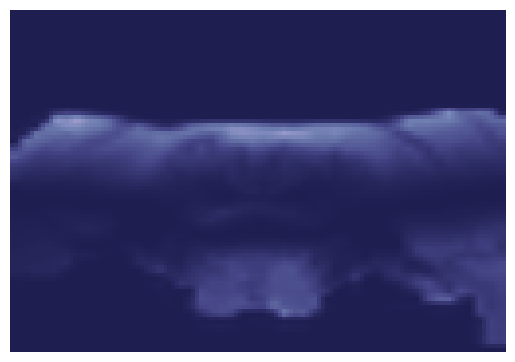

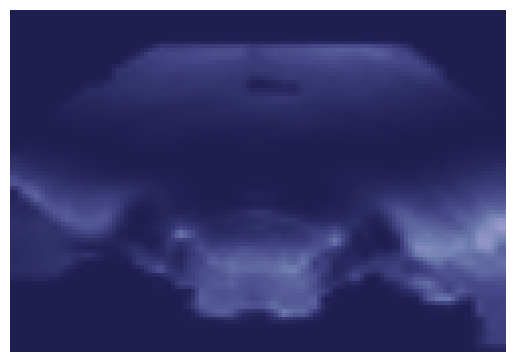

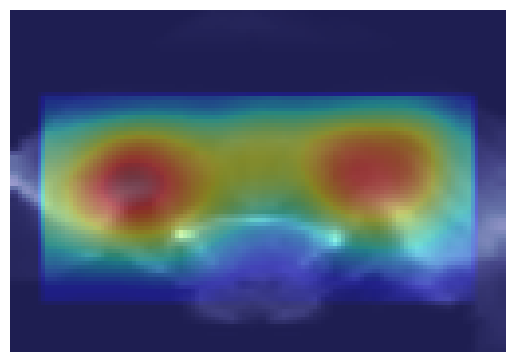

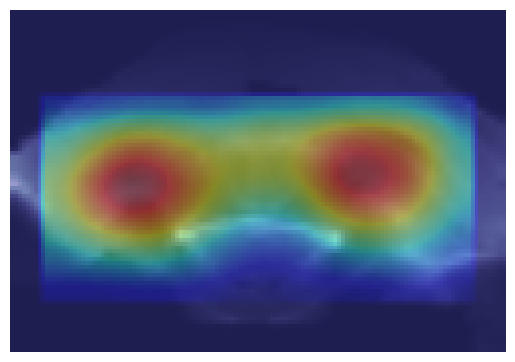

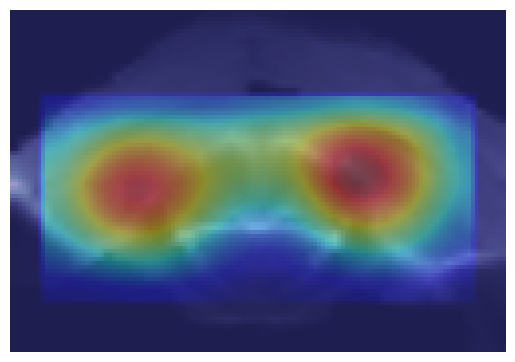

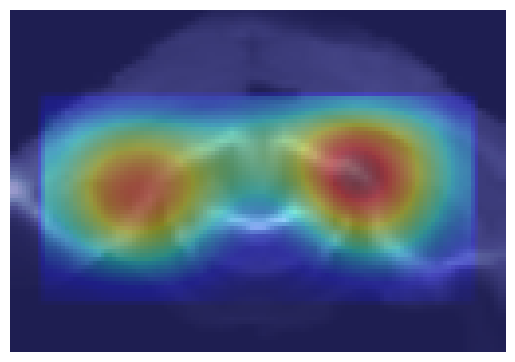

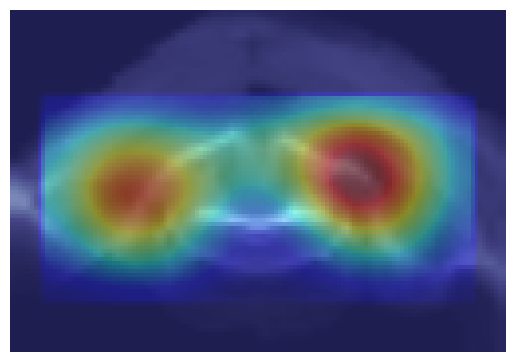

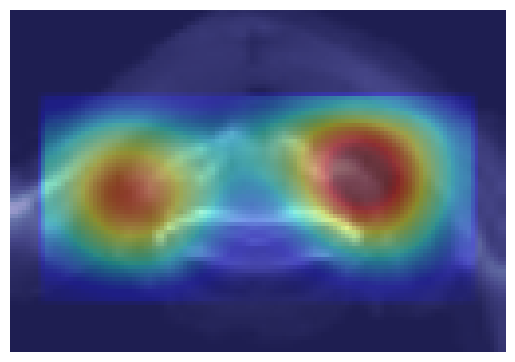

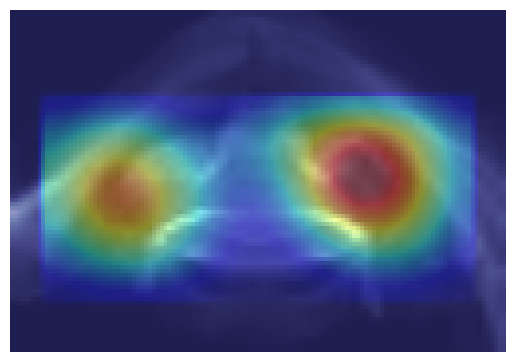

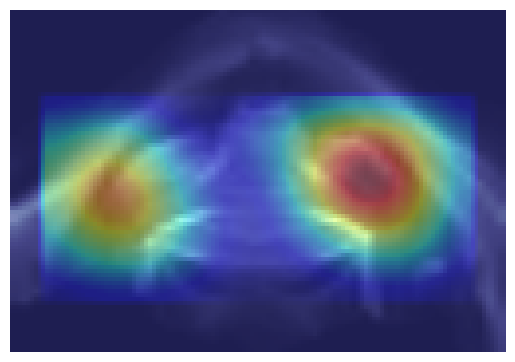

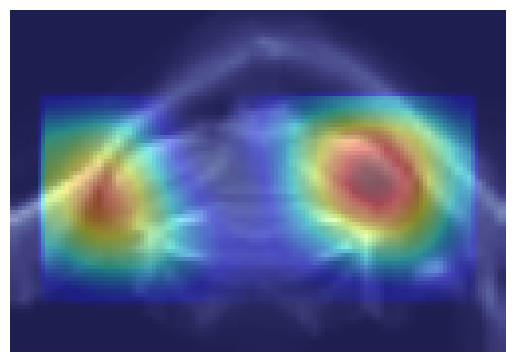

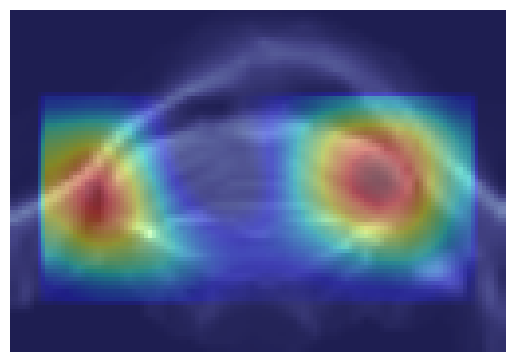

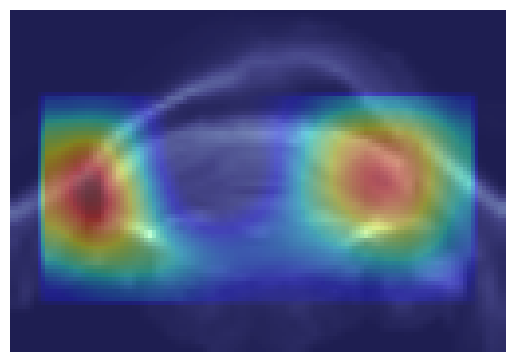

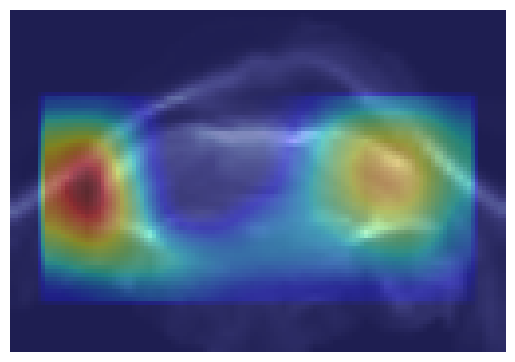

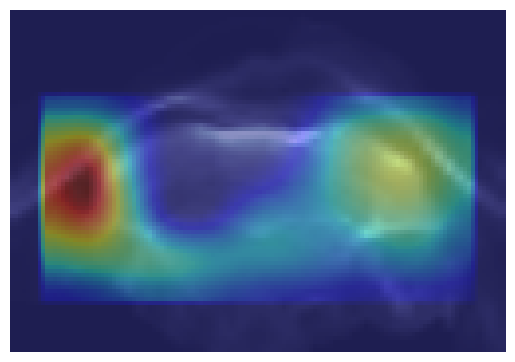

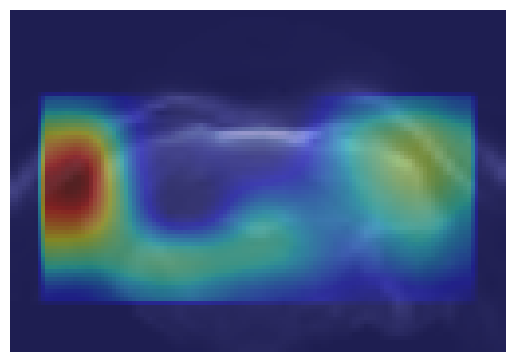

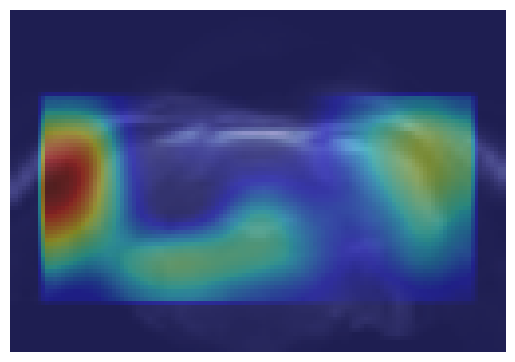

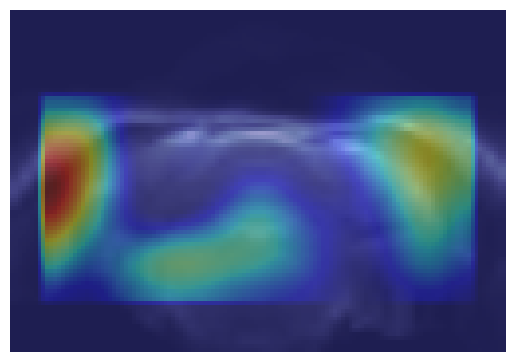

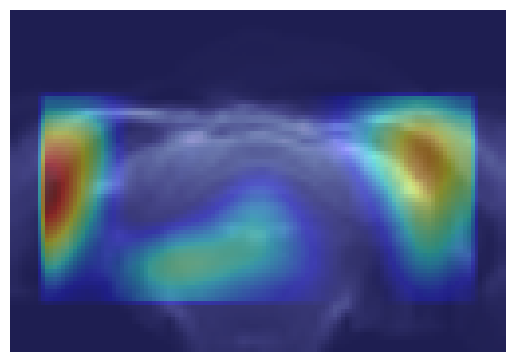

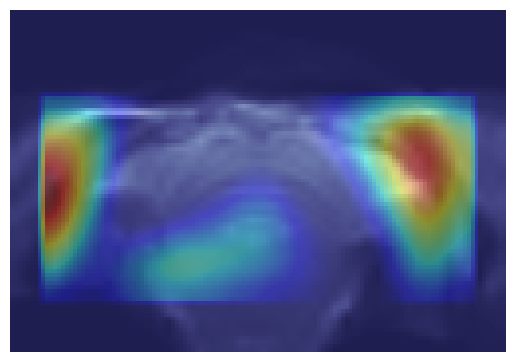

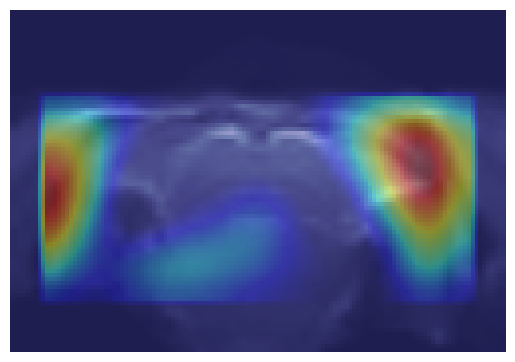

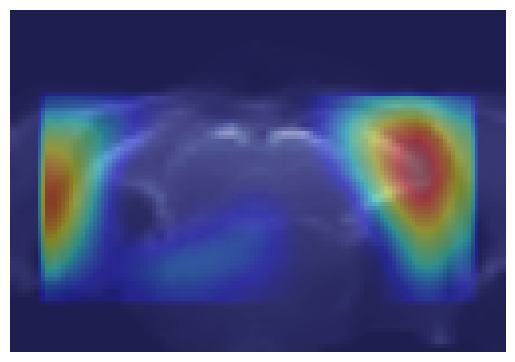

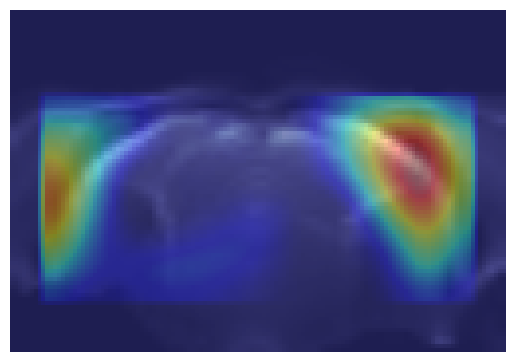

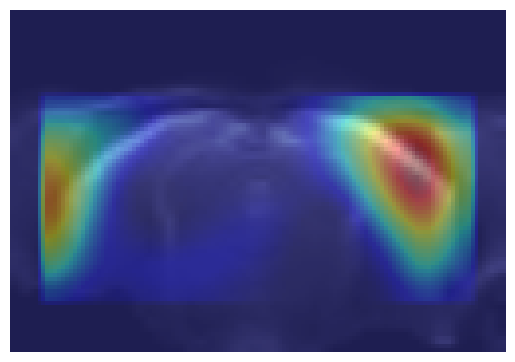

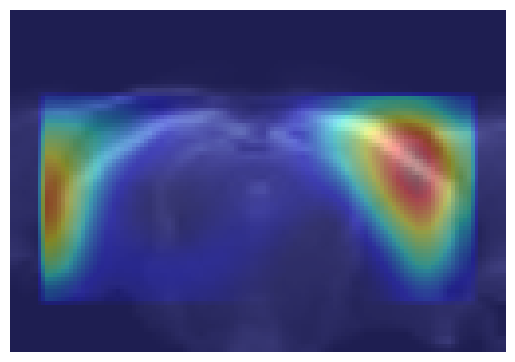

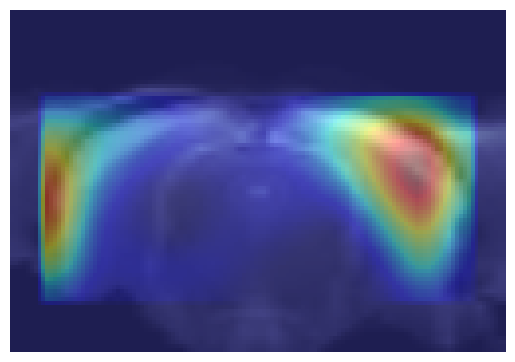

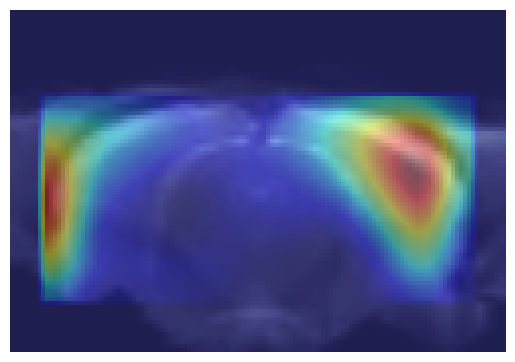

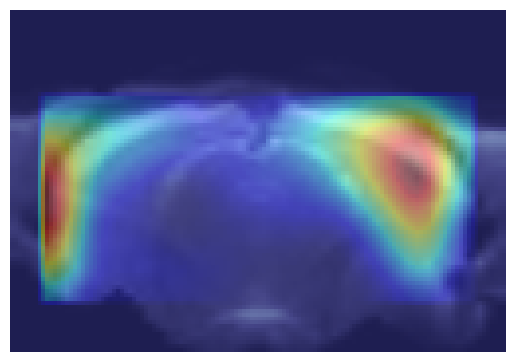

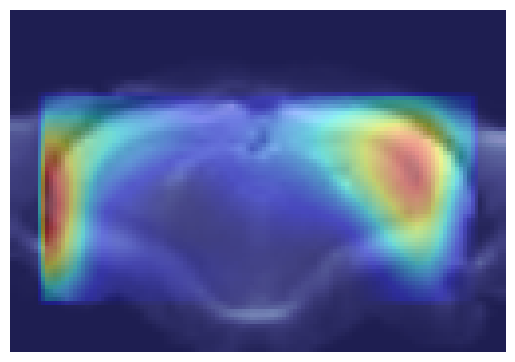

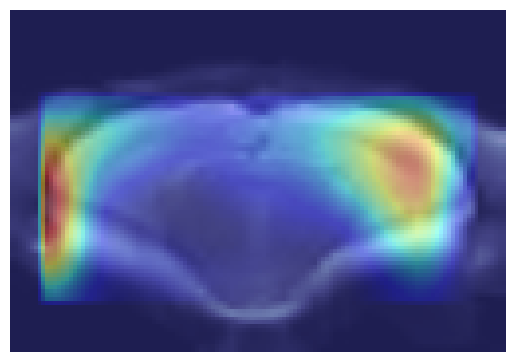

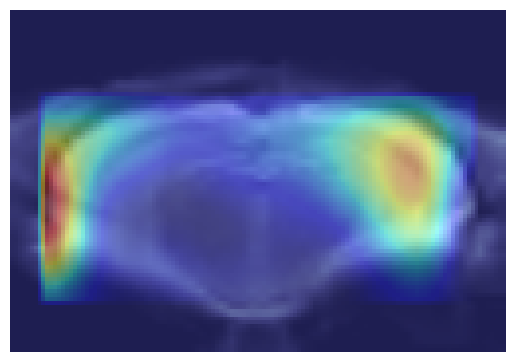

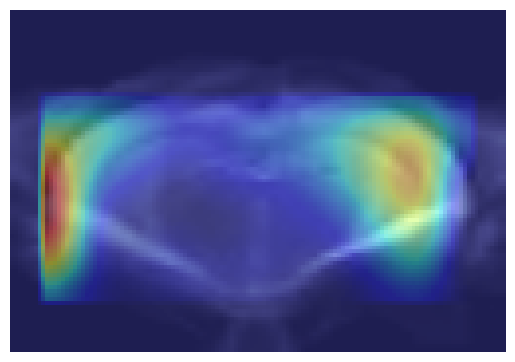

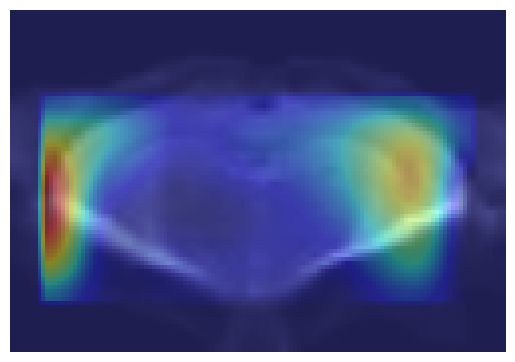

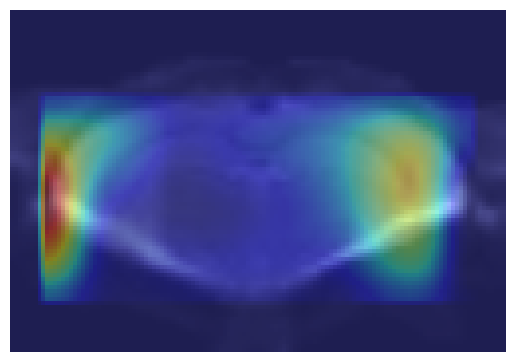

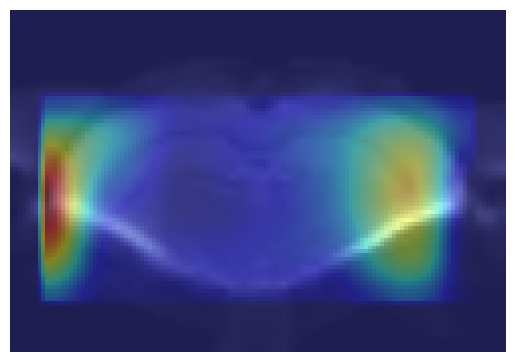

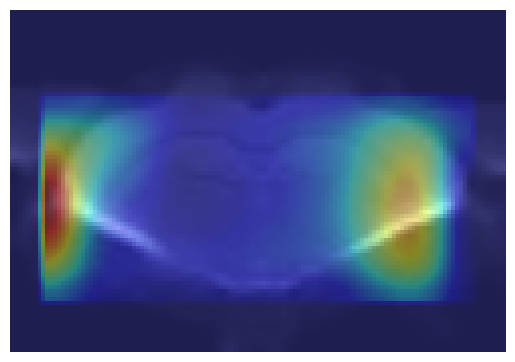

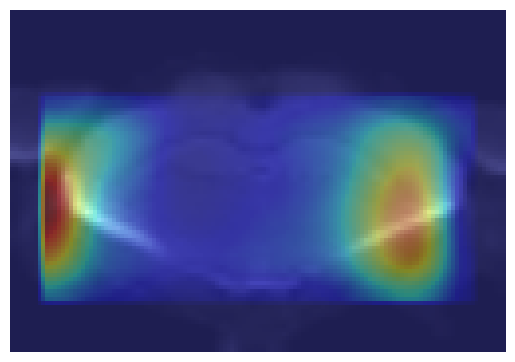

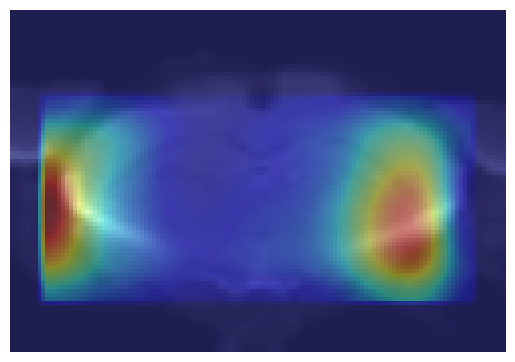

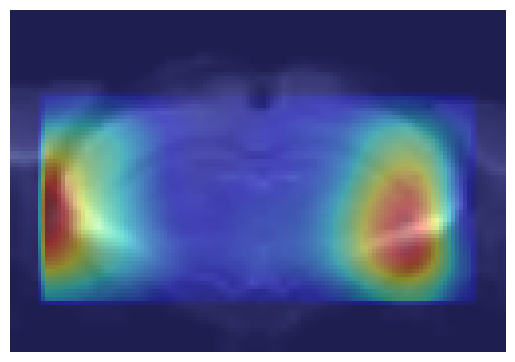

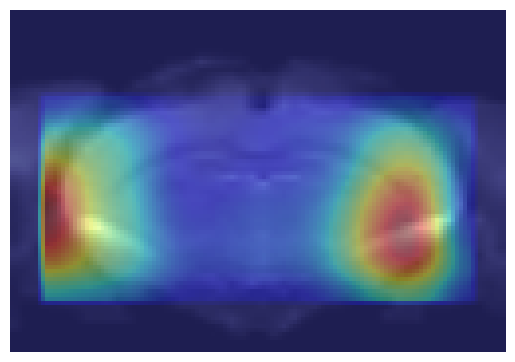

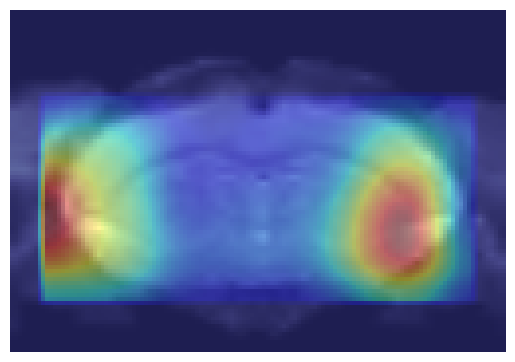

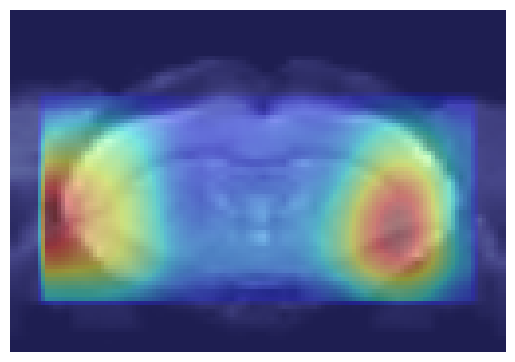

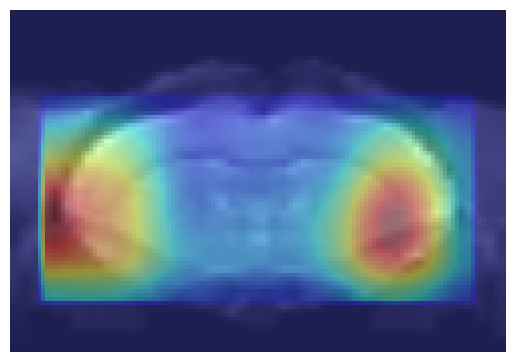

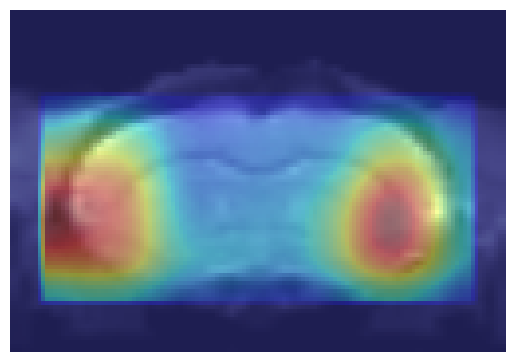

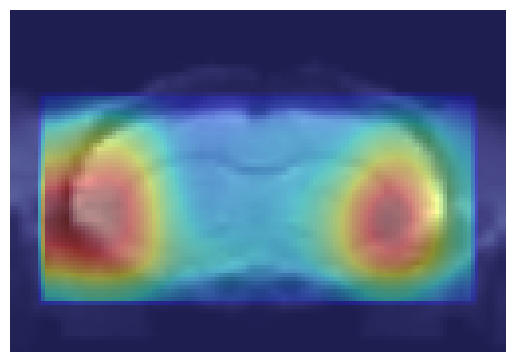

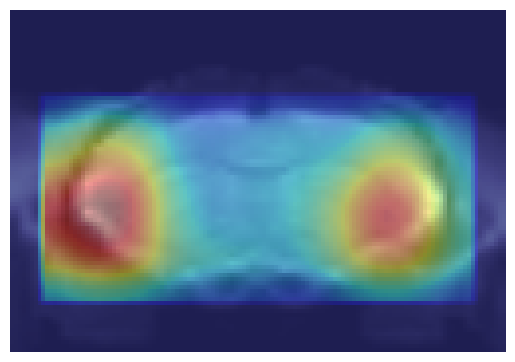

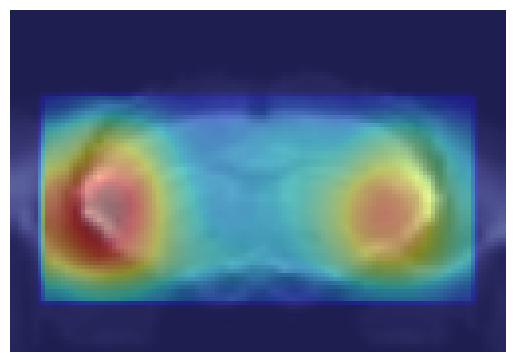

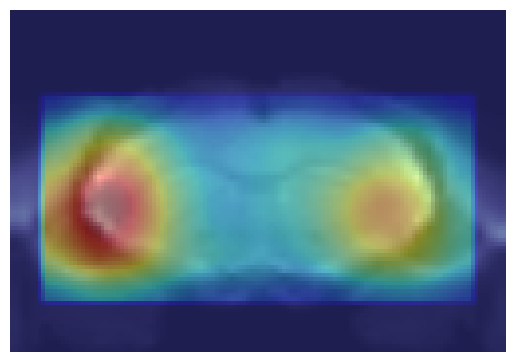

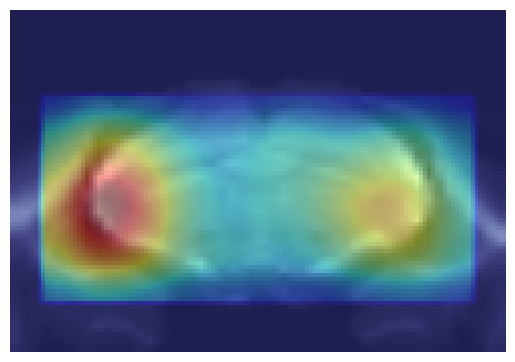

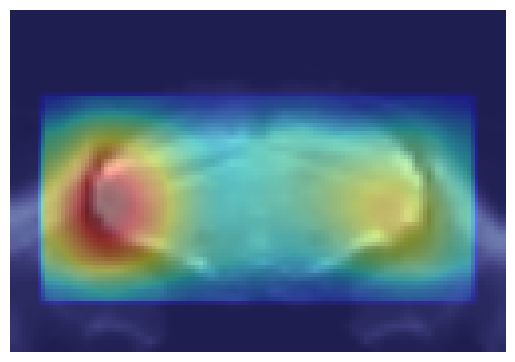

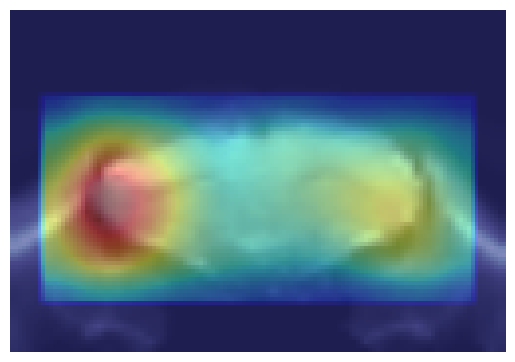

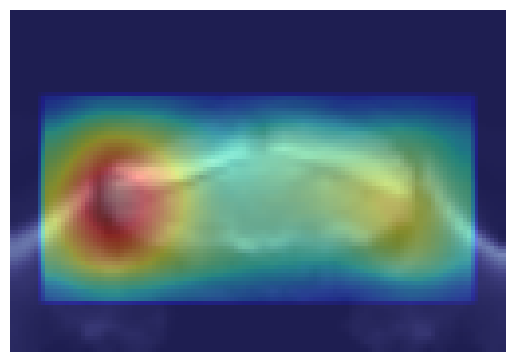

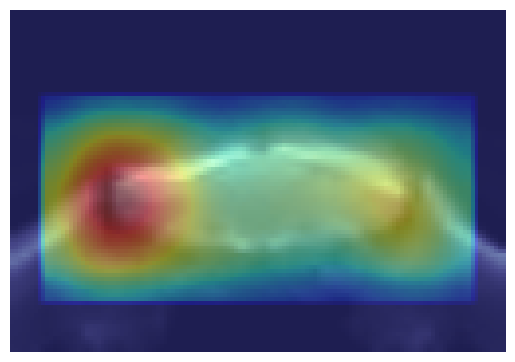

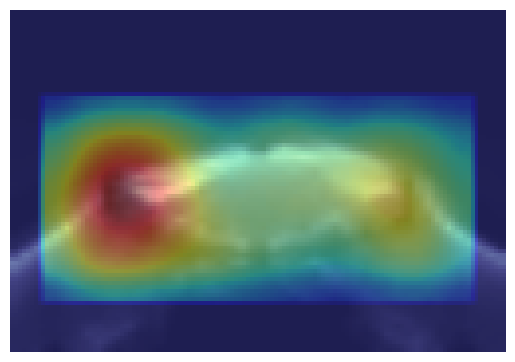

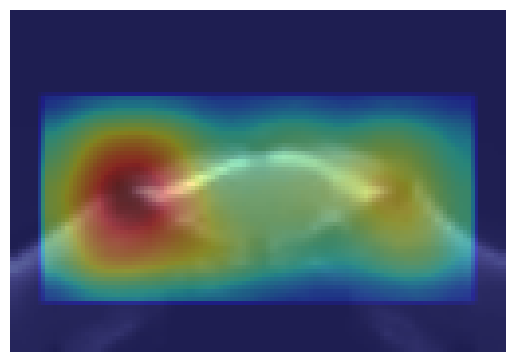

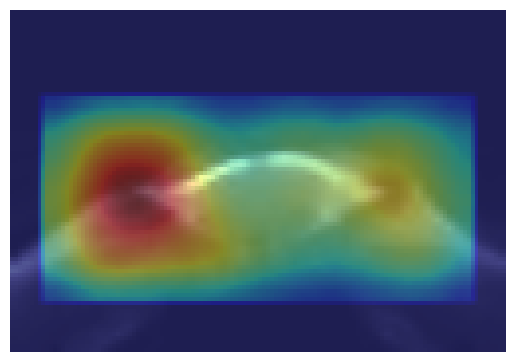

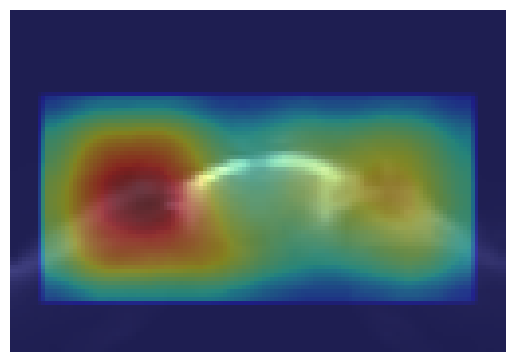

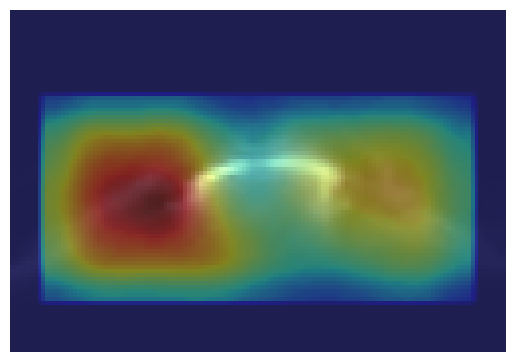

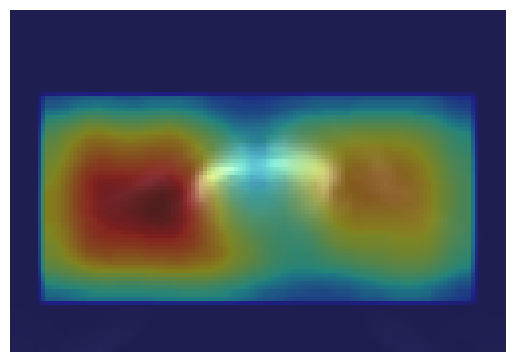

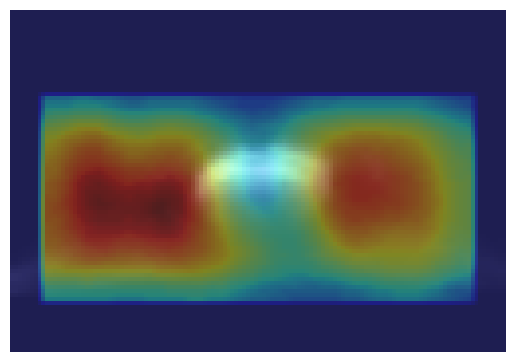

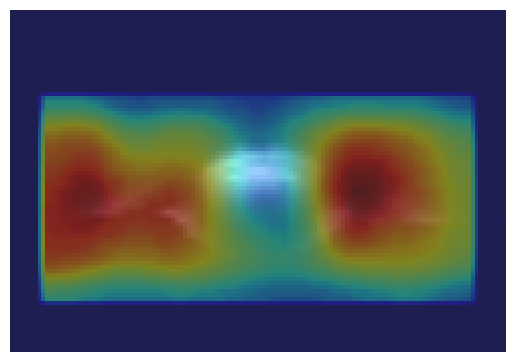

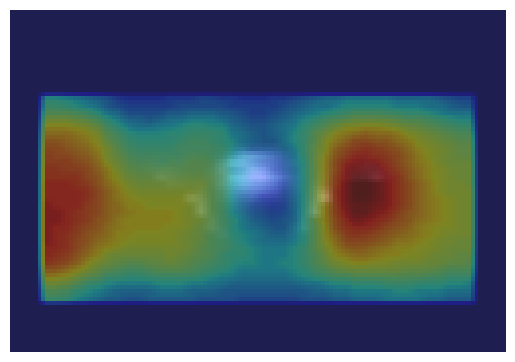

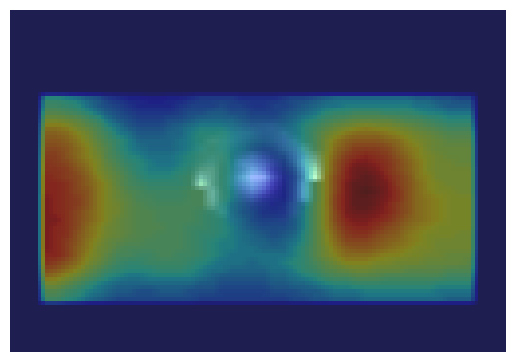

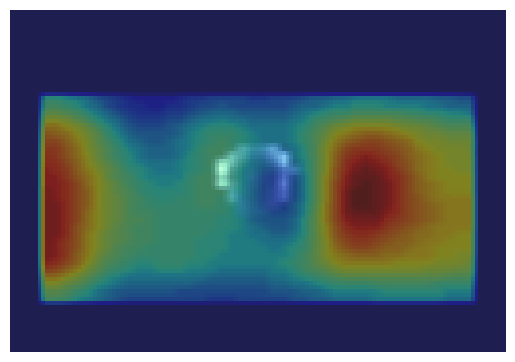

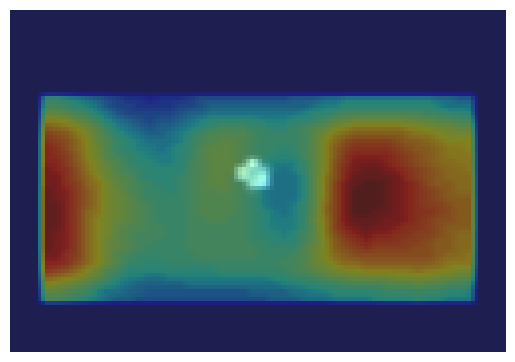

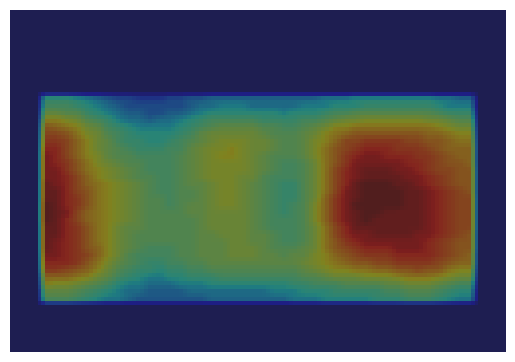

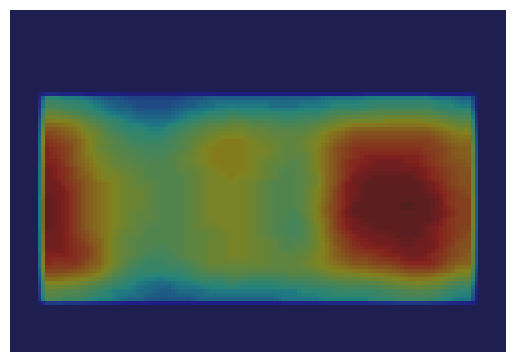

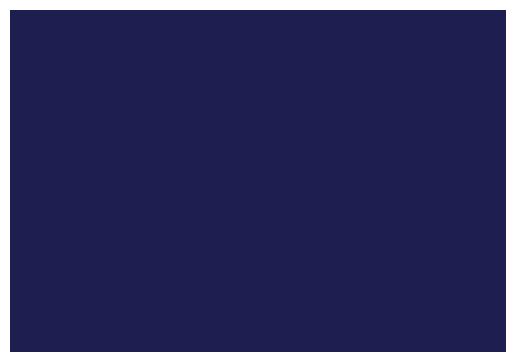

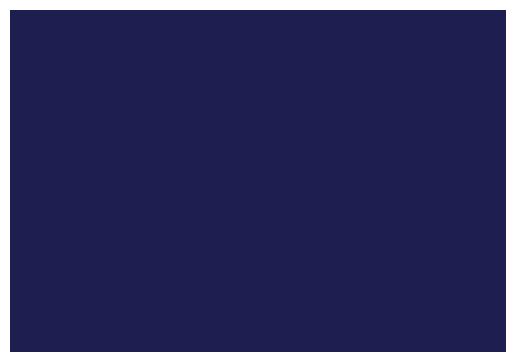

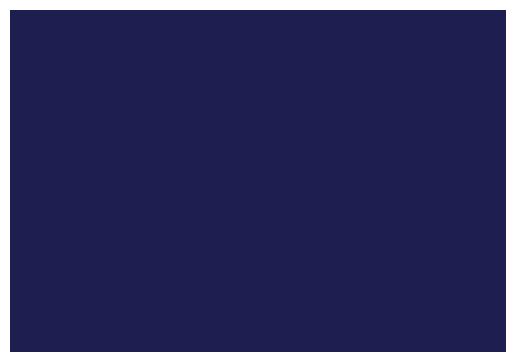

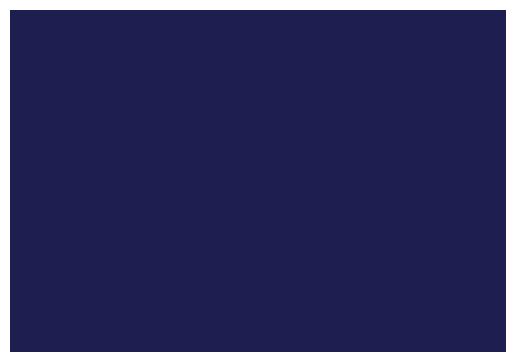

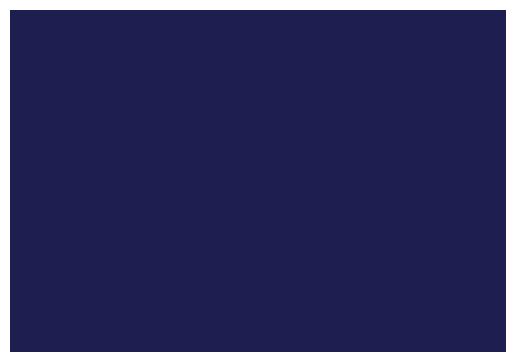

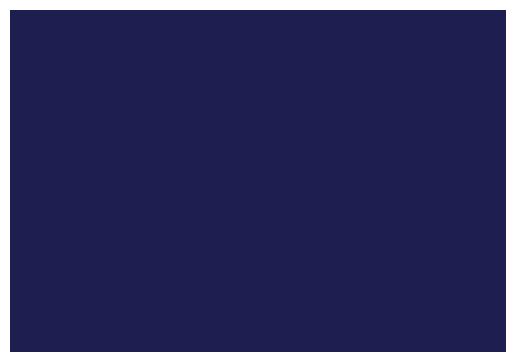

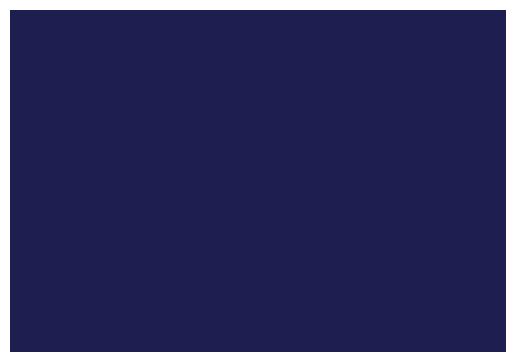

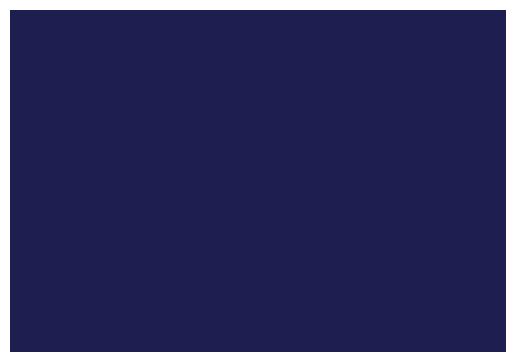

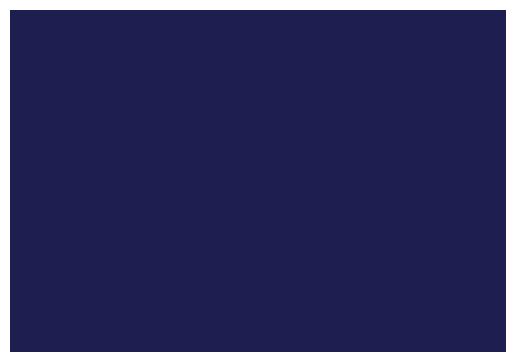

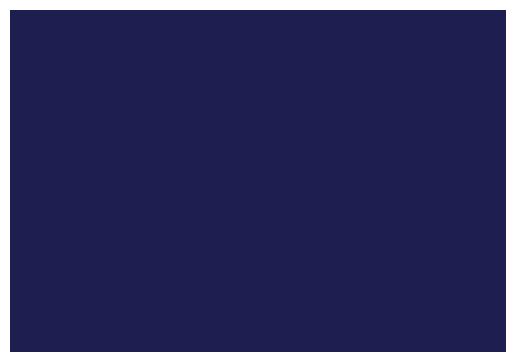

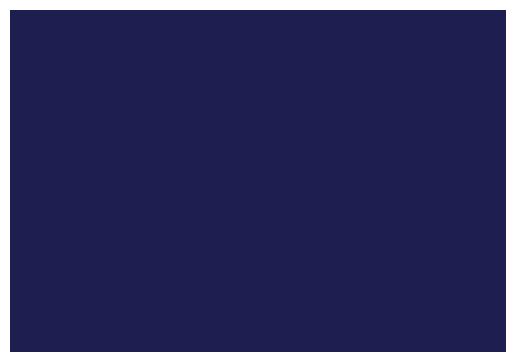

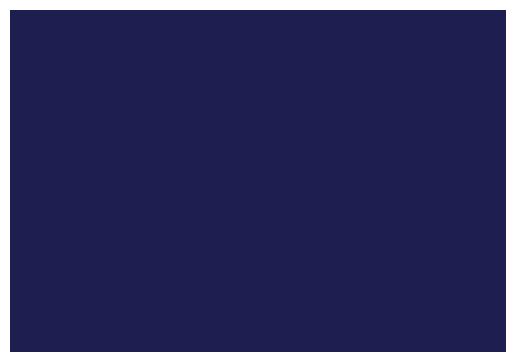

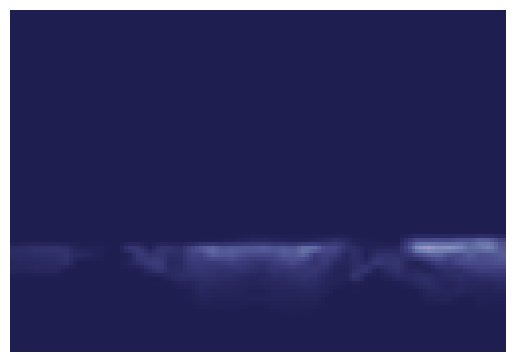

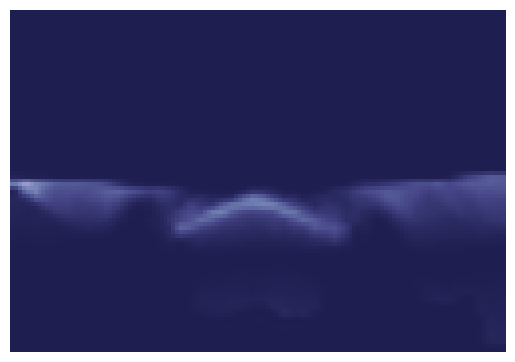

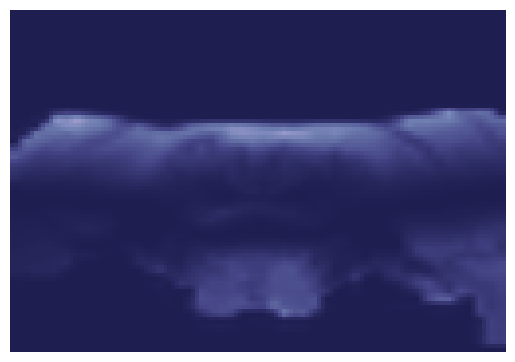

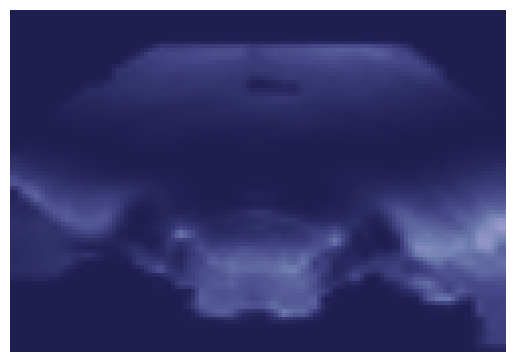

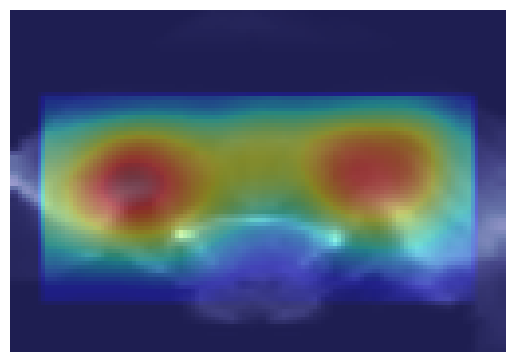

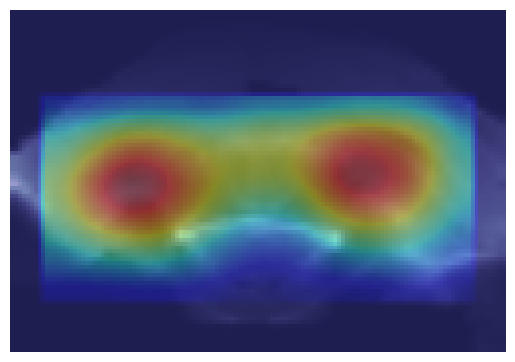

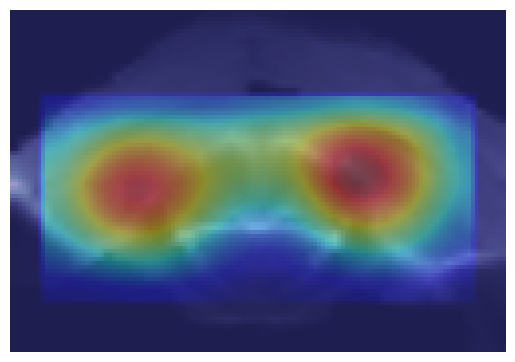

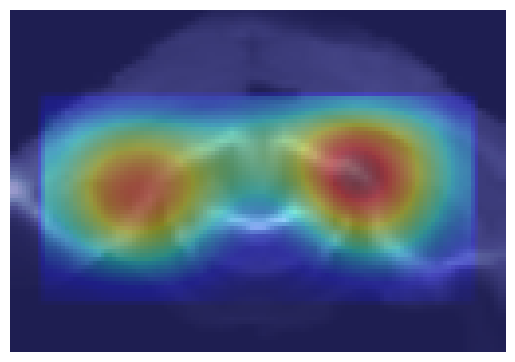

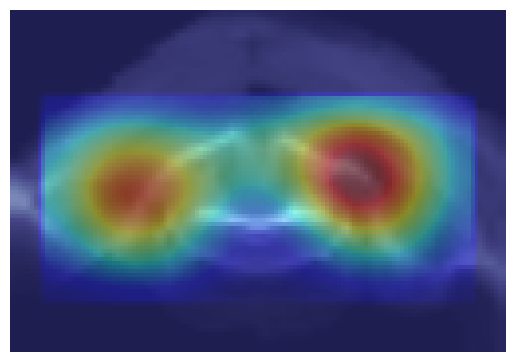

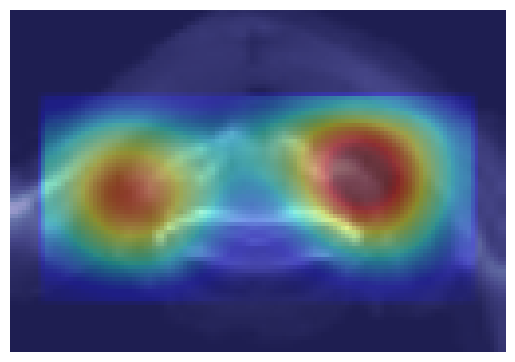

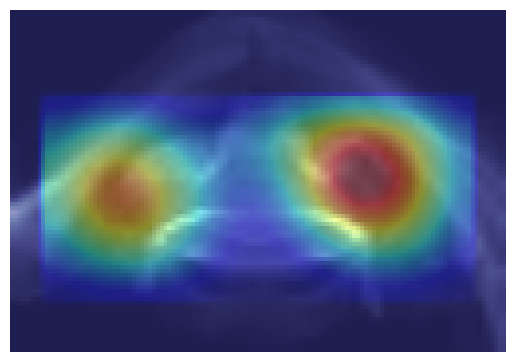

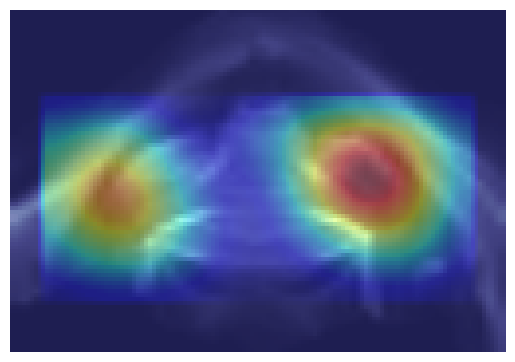

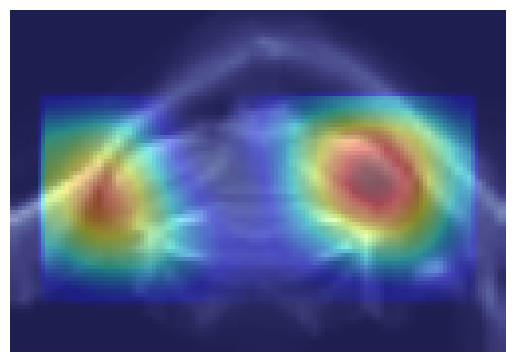

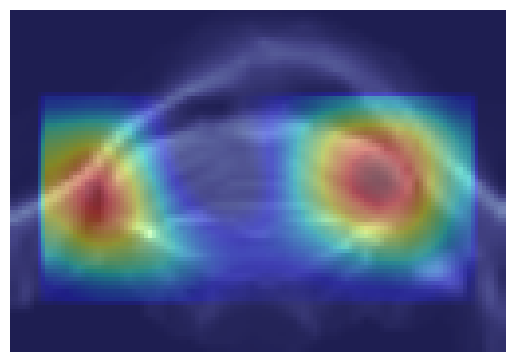

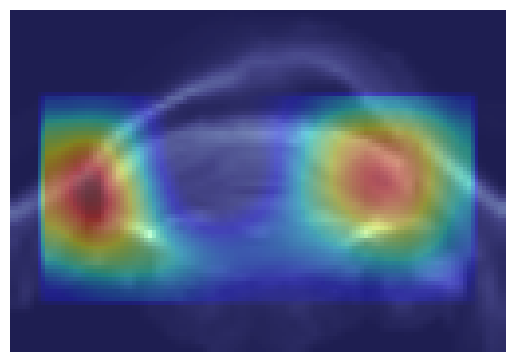

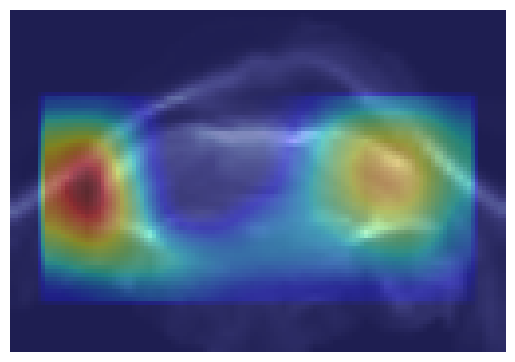

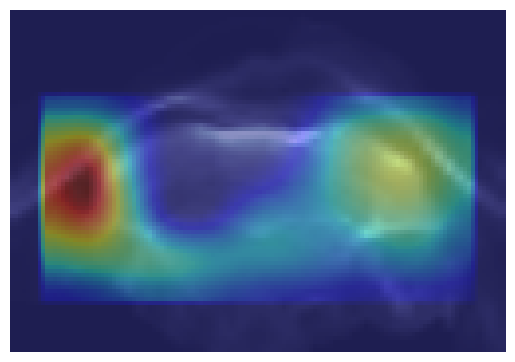

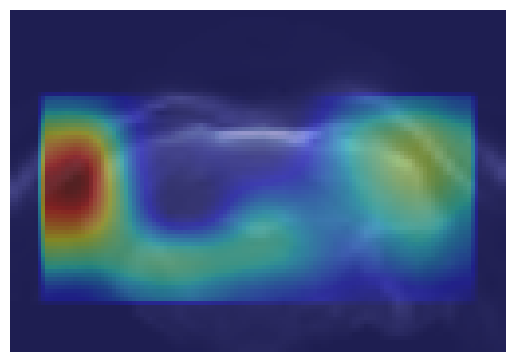

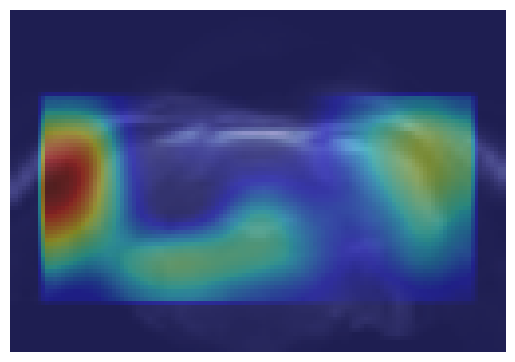

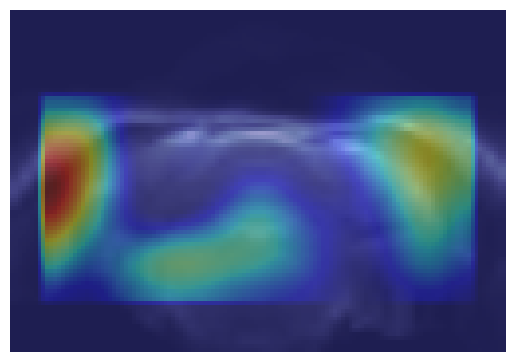

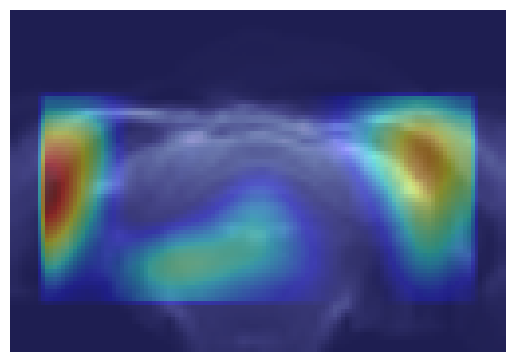

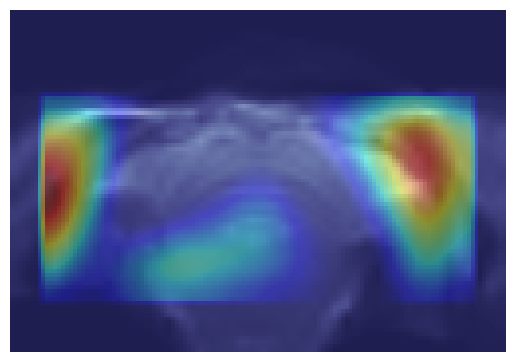

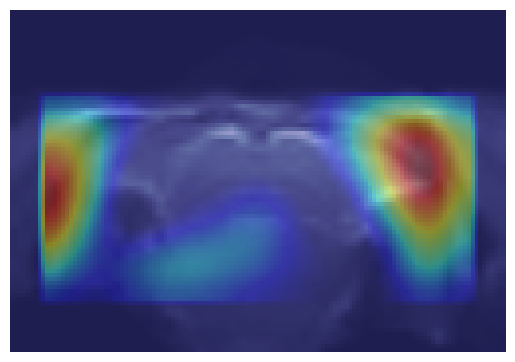

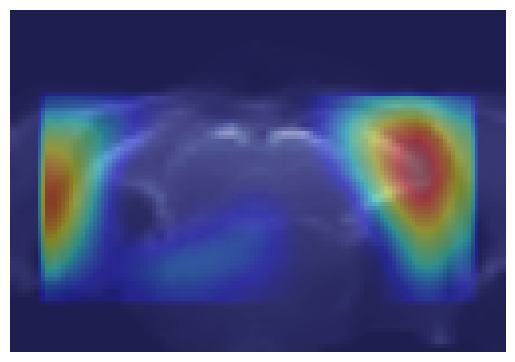

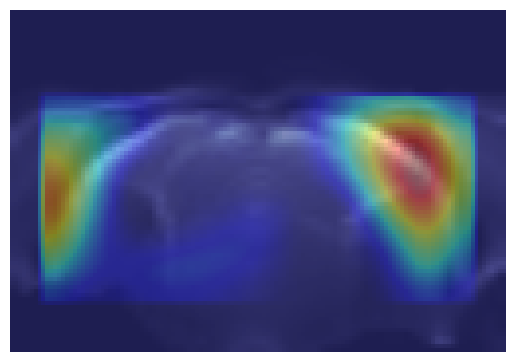

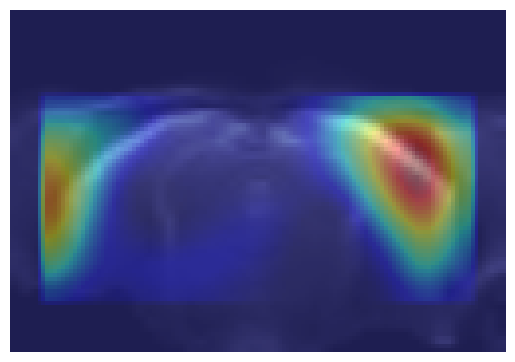

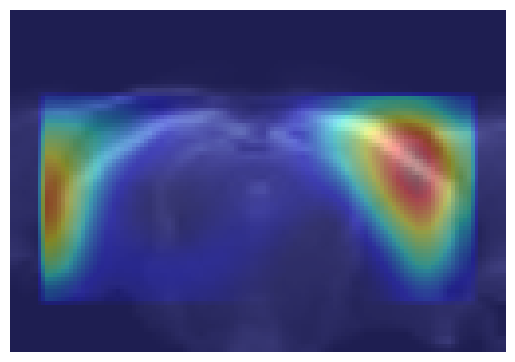

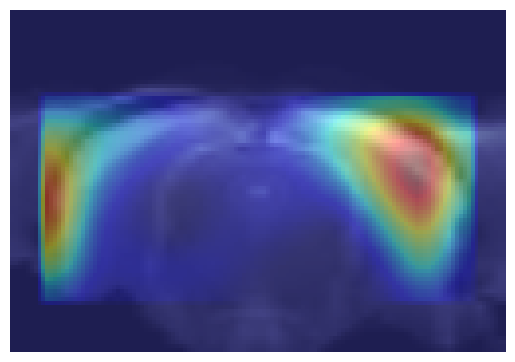

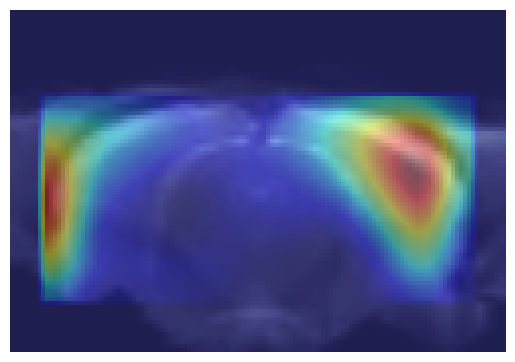

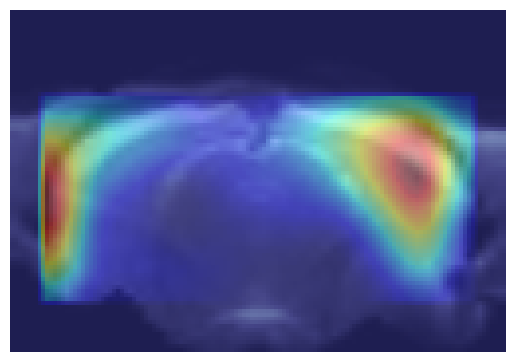

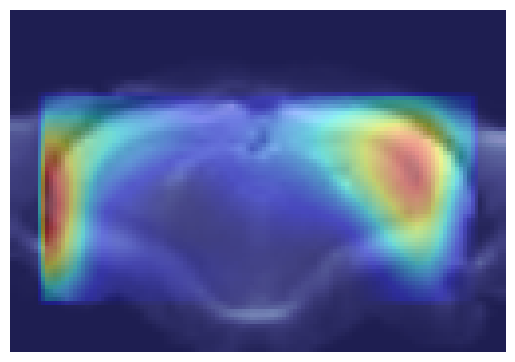

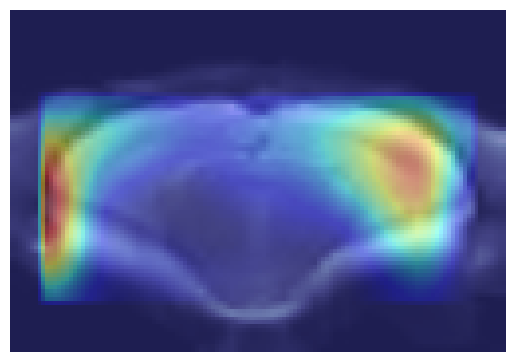

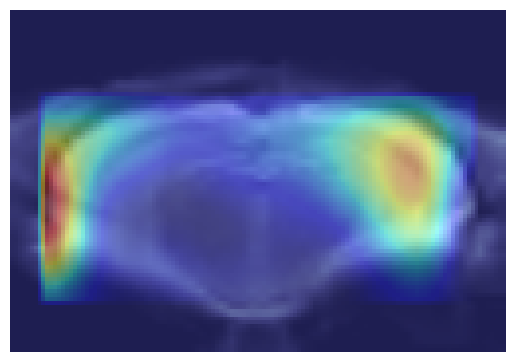

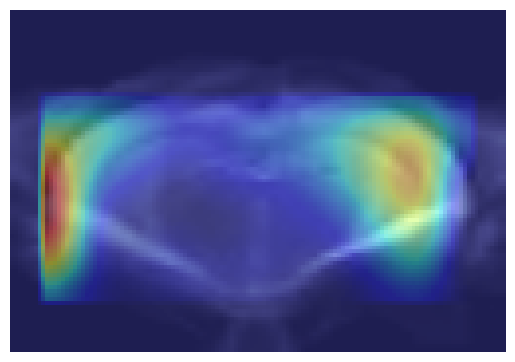

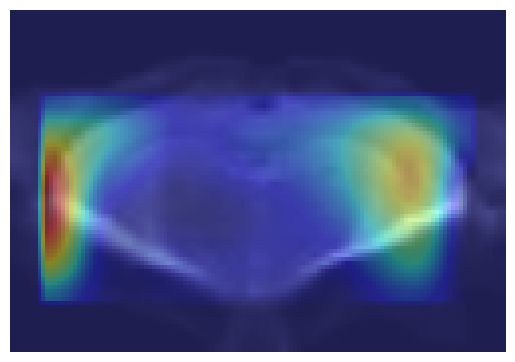

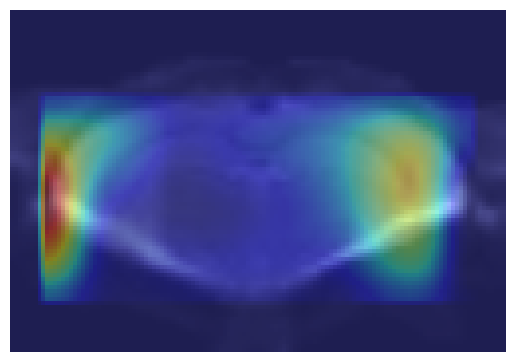

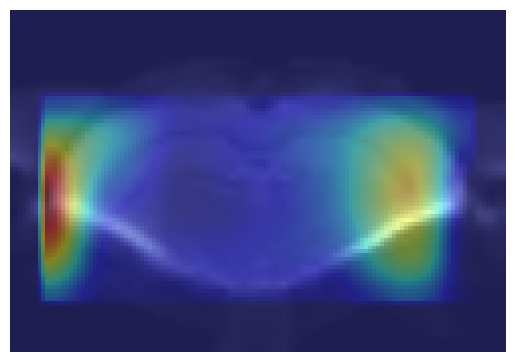

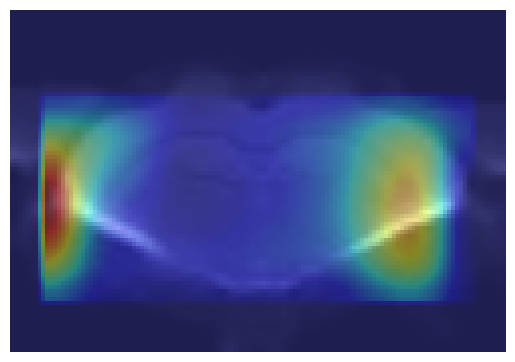

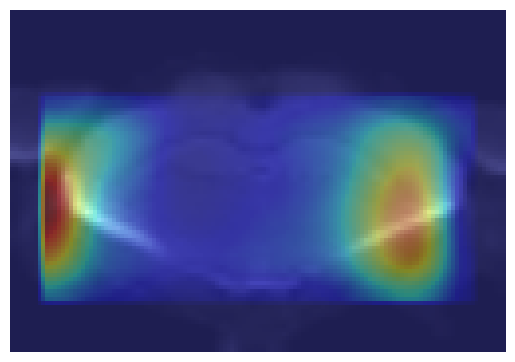

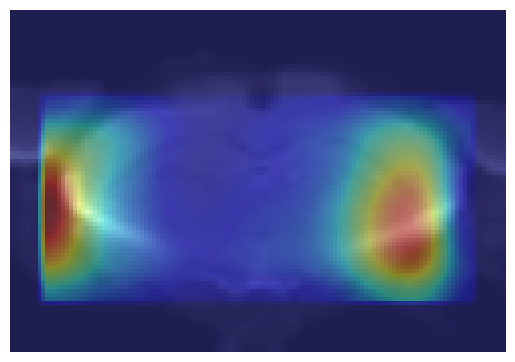

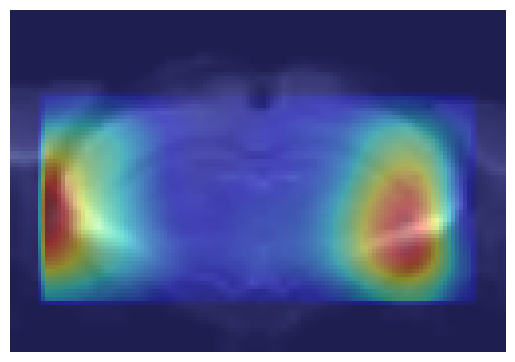

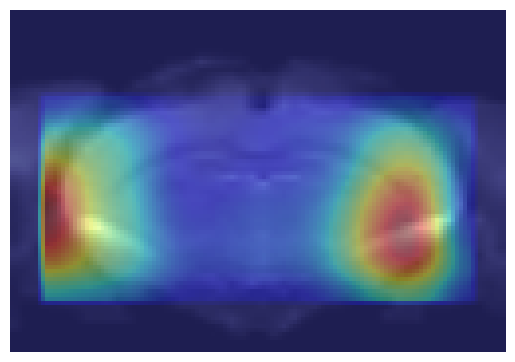

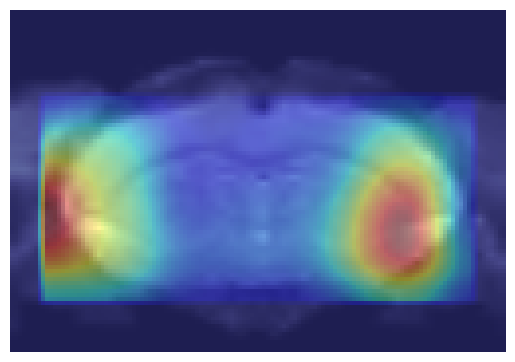

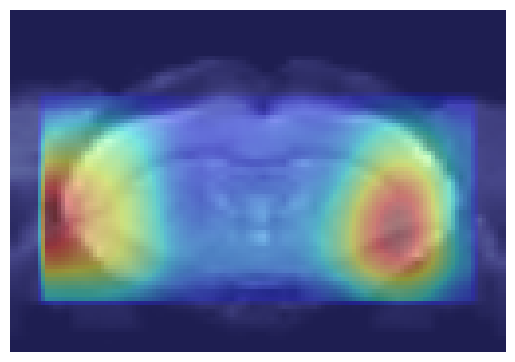

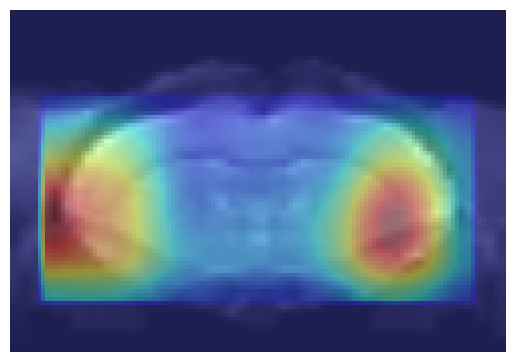

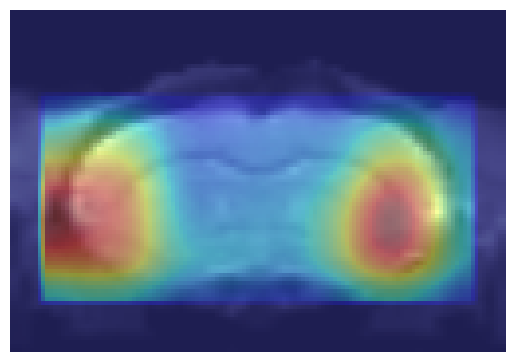

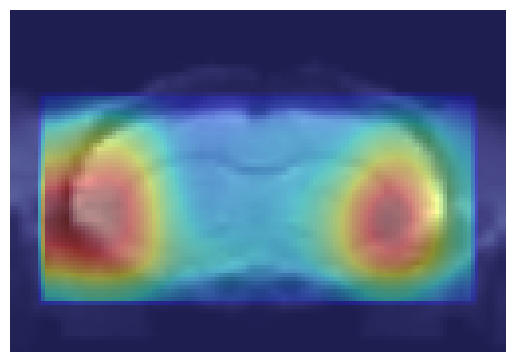

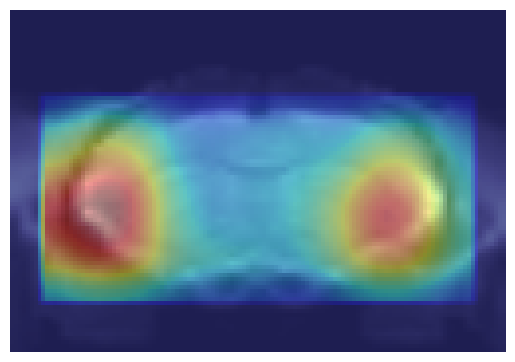

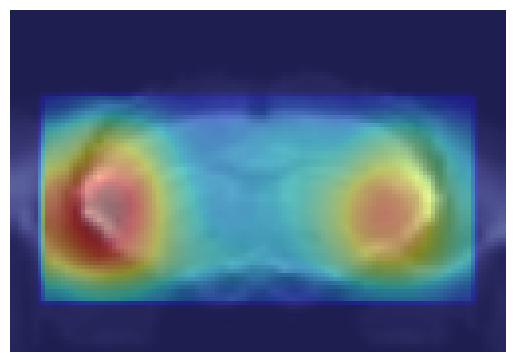

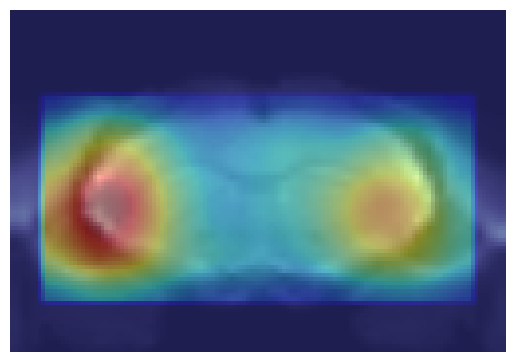

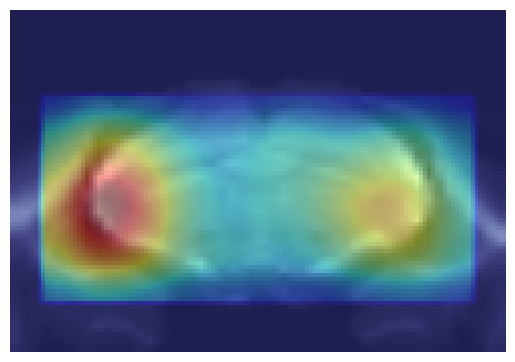

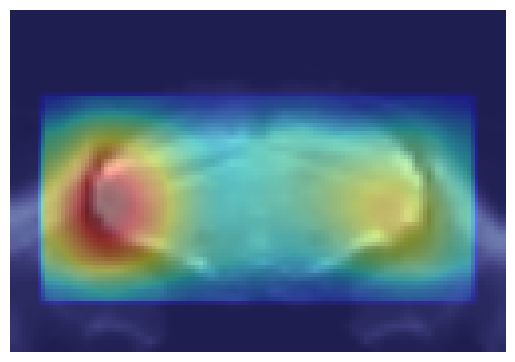

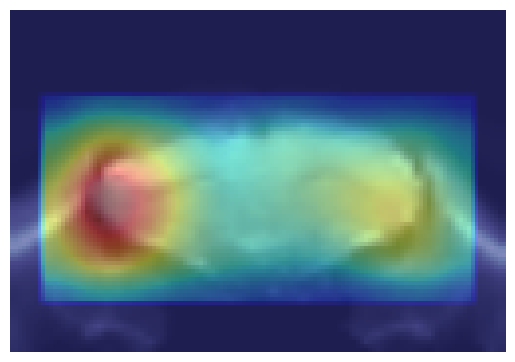

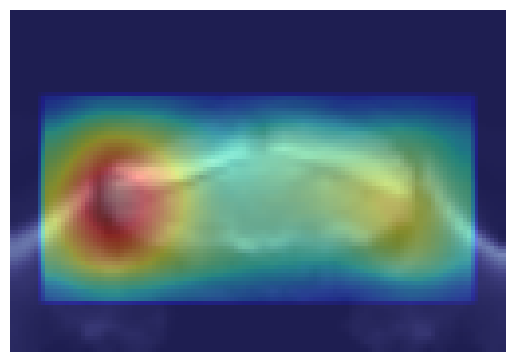

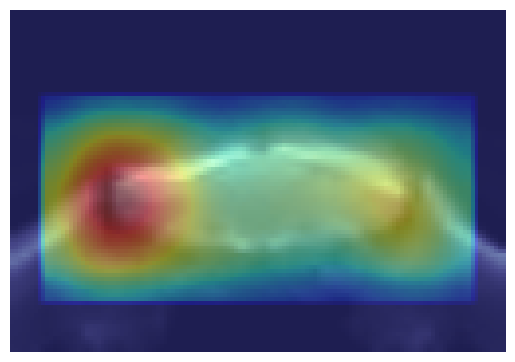

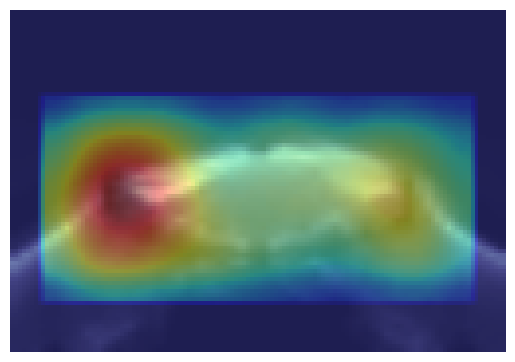

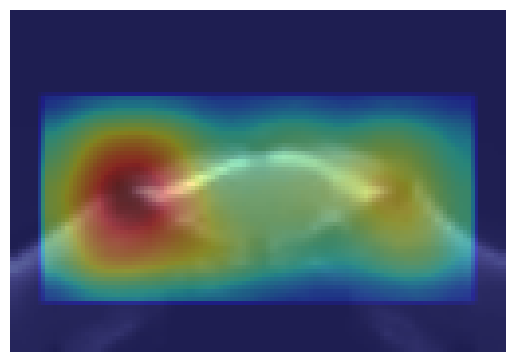

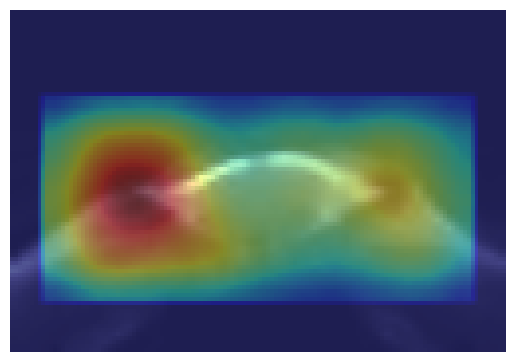

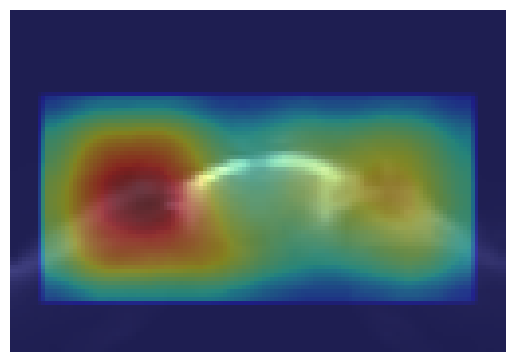

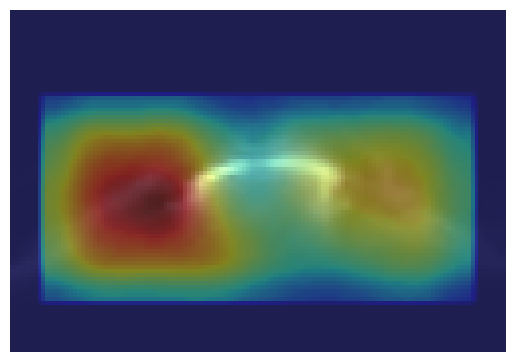

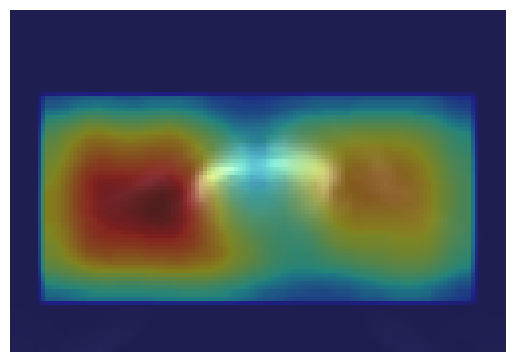

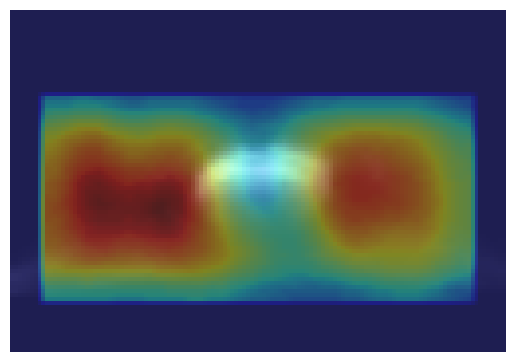

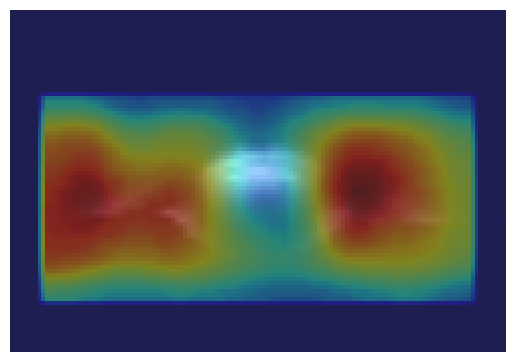

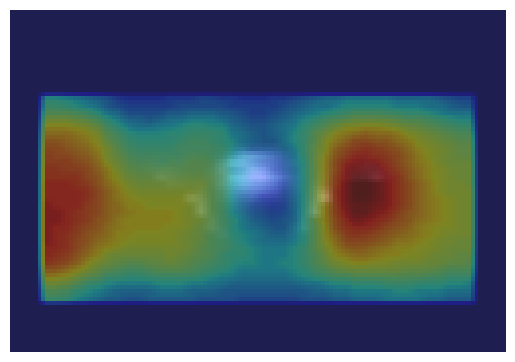

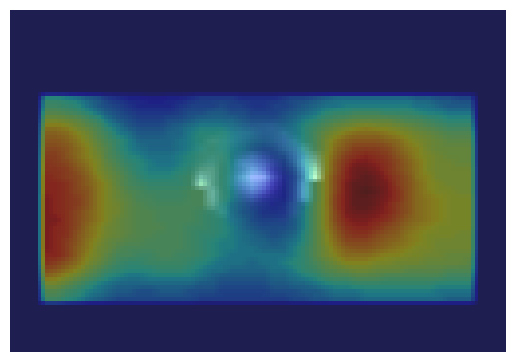

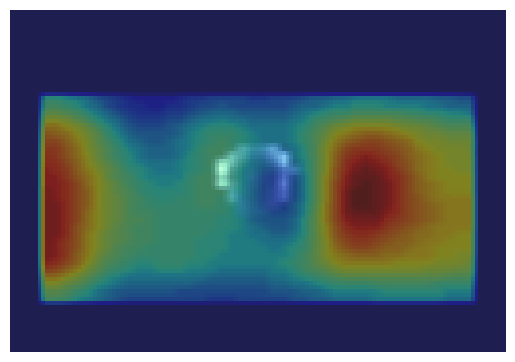

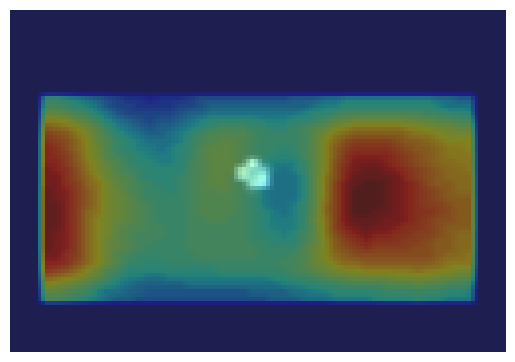

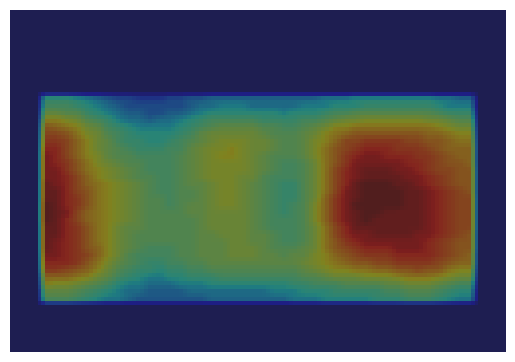

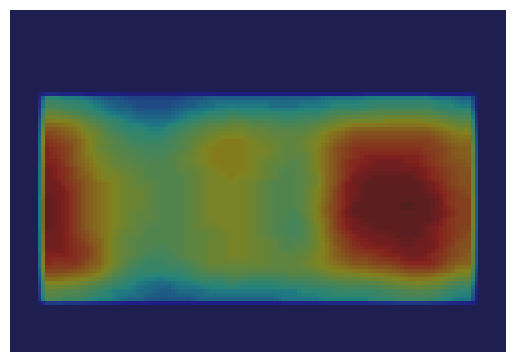

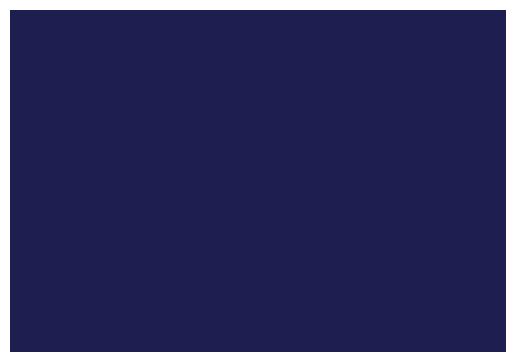

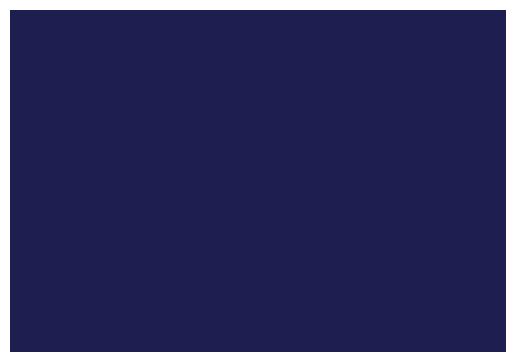

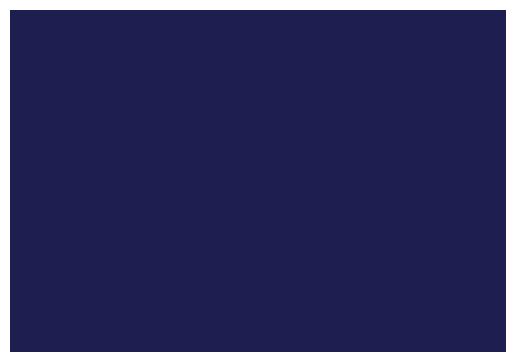

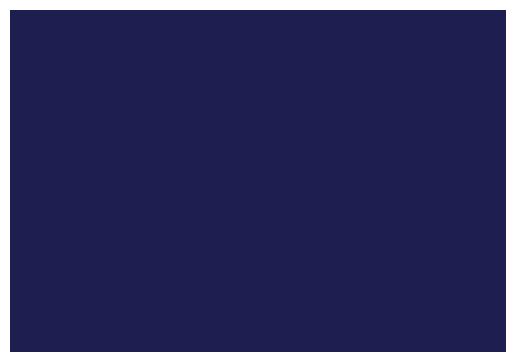

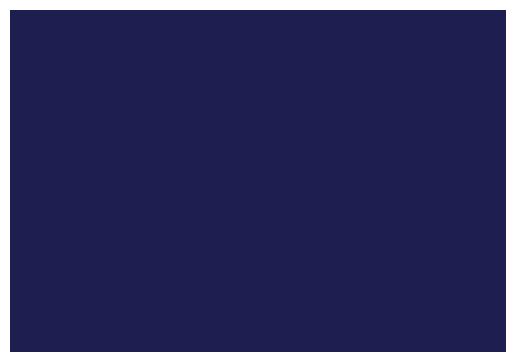

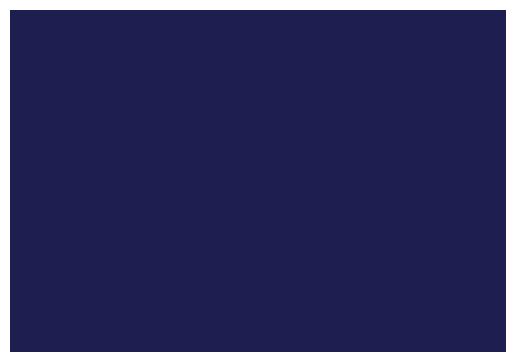

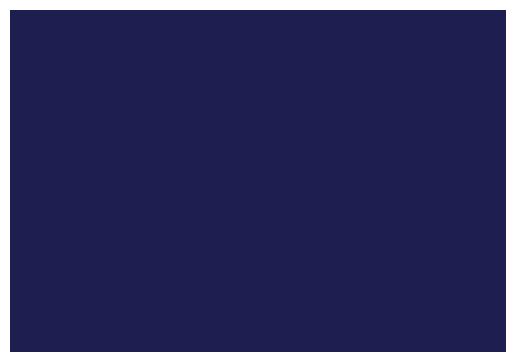

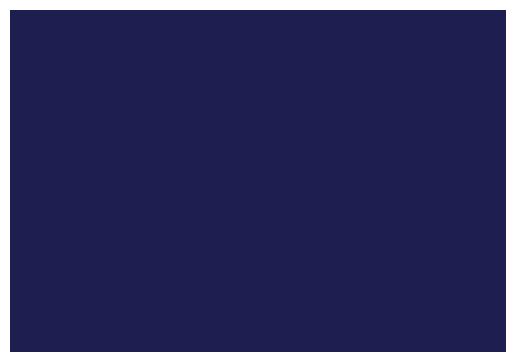

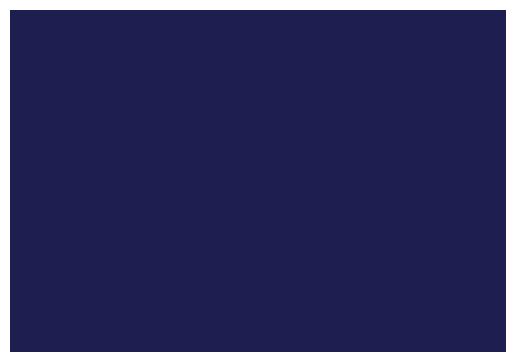

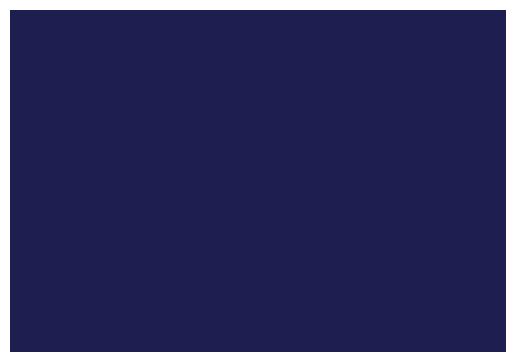

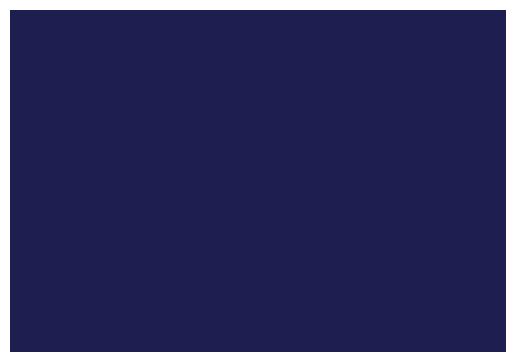

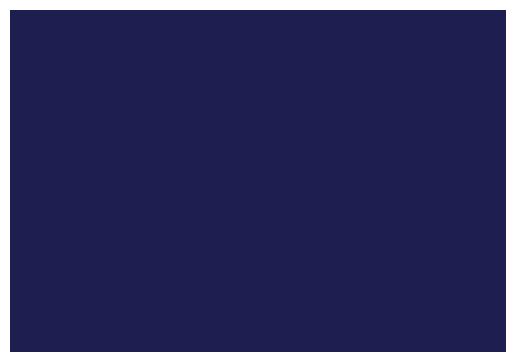

CM CNN


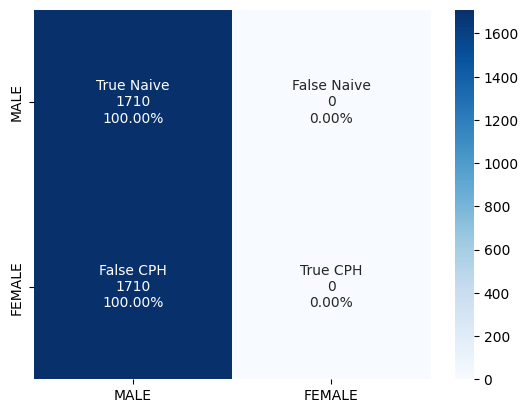

wandb: WARNING `format` argument was not provided, defaulting to `gif`. This parameter will be required in v0.20.0, please specify the format explicitly.
wandb: WARNING `format` argument was not provided, defaulting to `gif`. This parameter will be required in v0.20.0, please specify the format explicitly.
wandb: WARNING `format` argument was not provided, defaulting to `gif`. This parameter will be required in v0.20.0, please specify the format explicitly.
wandb: WARNING `format` argument was not provided, defaulting to `gif`. This parameter will be required in v0.20.0, please specify the format explicitly.


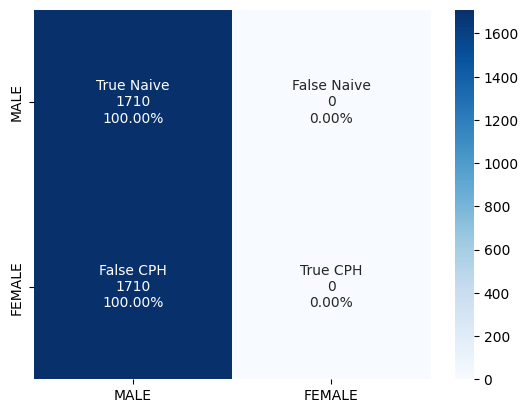

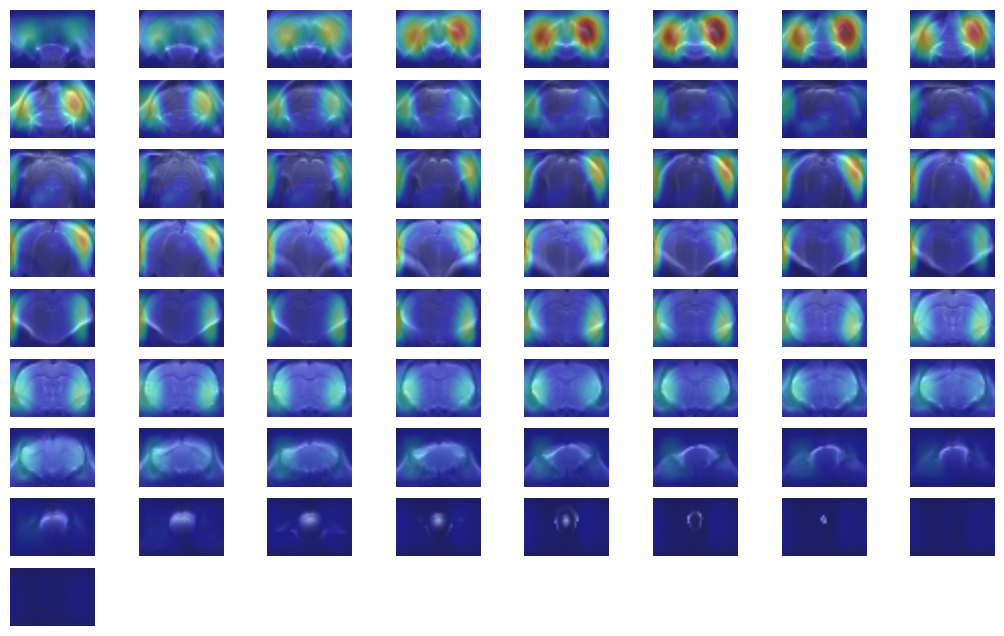

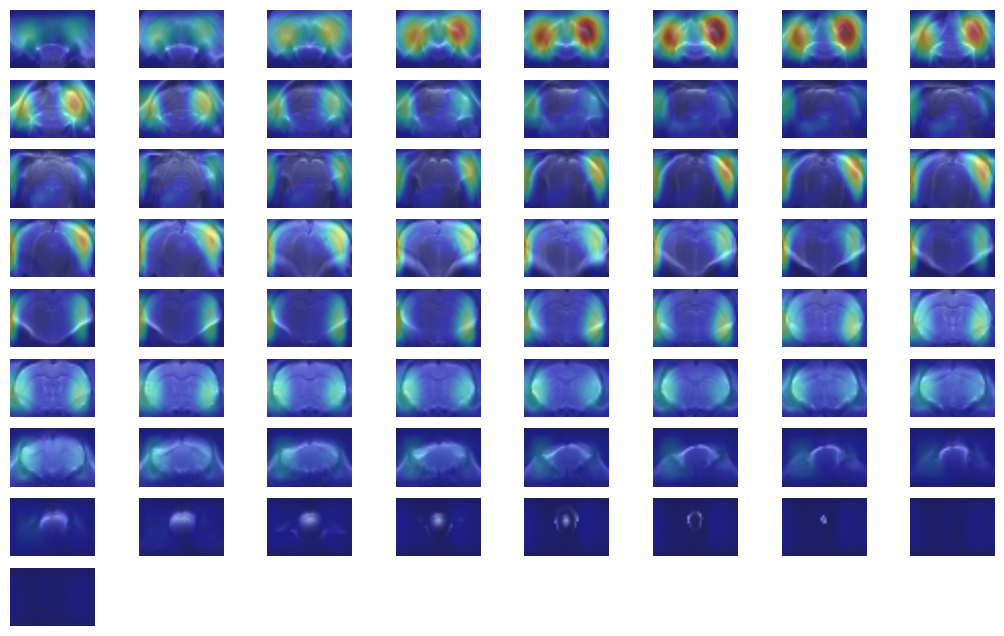

histories and scores from VGG 16 M2D


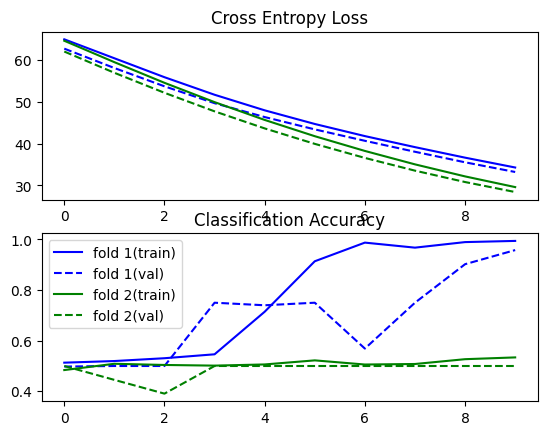

Accuracy: mean=66.667 std=16.667, n=2


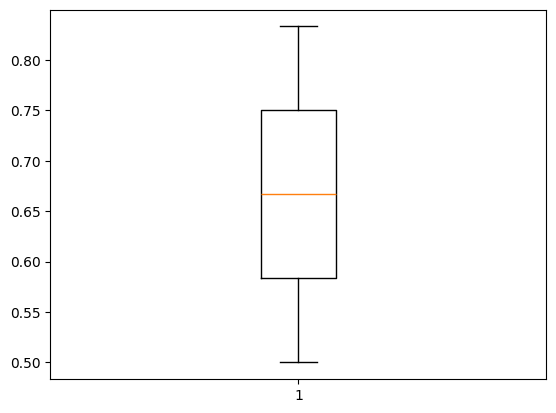

In [9]:

# test va adentro 
# 80% train y val y 20% test

'''sub_trainval, sub_test, y_trainval, y_test = train_test_split(
    subjects, labels, test_size=0.2, random_state=42, stratify=labels
)'''

n_bootstraps= 1 #2
for boot in range(n_bootstraps): 
    print(f"\n=== Bootstrapping Run {boot+1}/{n_bootstraps} ===")

    # Resample subjects + labels con reemplazo
    boot_subjects, boot_labels = resample(
     subjects, labels, replace=True, random_state=42+boot
    )

    sub_trainval, sub_test, y_trainval, y_test = train_test_split(
    boot_subjects, boot_labels, test_size=0.2, random_state=42, stratify=labels
)

    kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

    scores, histories = list(), list()
    run = 1
    for train_ix, val_ix in kfold.split(sub_trainval, y_trainval):
        print("Run #",run)

        sub_train, sub_val = boot_subjects[train_ix], boot_subjects[val_ix]
        y_train, y_val     = boot_labels[train_ix], boot_labels[val_ix]
        
        
        # Set default values
        config_defaults = {
            "batch": 4,
        }
        
        # Initialize wandb with a sample project name
        wandb.init(project="FEMALE_Naive_vs_CPH(BLvsW7)", notes="No pooling. New data augmentation. Z-scoring per batch. Batch = 4. 10 epoch. Just z-scoring and applying RandomFlip. All layers gradcam. lr = 1e-5",
                    config=config_defaults)

        # Specify the other hyperparameters to the configuration.
        wandb.config.epochs = 10 #10
        wandb.config.sub_batch = 30
        wandb.config.sub_batch_ts = 30
        wandb.config.subjects = subjects
        wandb.config.architecture_name = "VGG16_3D"
        wandb.config.dataset_name = "NAIVE vs CPH(CPH[Bl-W1])"
        wandb.config.CNN_blocks = 5
        wandb.config.sessions = sessions
        wandb.config.vols_per_session_tr = 570
        wandb.config.vols_per_session_ts = 570
        wandb.config.initial_learning_rate = 1e-5
        #wandb.config.lr_decay_rate = 0.95
        wandb.config.optimizer = "Adam"
        
        '''
        sub_train = subjects[list(train_ix)]
        y_tr_all = labels[list(train_ix)]
        
        val_size = max(2, int(round(0.1 * len(sub_train))))
        
        sub_train, sub_val, y_train, y_val  = train_test_split(sub_train, labels[list(train_ix)], test_size=val_size, random_state=42, 
                                                            stratify=y_tr_all)
        sub_test = subjects[list(val_ix)]
        '''
        #
        val_size = max(2, int(round(0.1 * len(train_ix))))
    
        sub_train, sub_val, y_train, y_val = train_test_split(
            sub_trainval[train_ix], y_trainval[train_ix],
            test_size=val_size,  # test_size se refiere a la validacion
            random_state=42, stratify=y_trainval[train_ix]
        )

        sub_test, y_test = sub_test, y_test
        #
        
        CPHclassTrain = FILES_and_LABELS(sub_train, sessions, MRI_type, functional_type)
        CPHclassTest = FILES_and_LABELS(sub_test, sessions, MRI_type, functional_type)
        CPHclassval = FILES_and_LABELS(sub_val, sessions, MRI_type, functional_type)
            
        X_train = CPHclassTrain.get_mask_and_bold()
        X_test = CPHclassTest.get_mask_and_bold()
        X_val = CPHclassval.get_mask_and_bold()

        wandb.config.batch = 4

        print("sub train:")
        print(np.array(X_train)[:,0])
        print("sub test:")
        print(np.array(X_test)[:,0])
        print("sub val:")
        print(np.array(X_val)[:,0])

        print("# sesiones Train",len(X_train))
        print("# sesiones Test",len(X_test))
        print("# sesiones Val",len(X_val))
        
        traingen = CustomDataGen(X_train, batch_size=wandb.config.batch, subbatch_size=wandb.config.sub_batch,
                                    format = "just_brain", vols = wandb.config.vols_per_session_tr,
                                    num_class = 2, classes = "CPHvsNAIVEfemale", augmentation = True)
        traingen.on_epoch_end()
        #Es necesario que la division entre X_test y batch_size tenga un modulo igual a 0. 
        #De otra manera el ultimo batch no lo utiliza al utilizar .predict
        testgen  = CustomDataGen(X_test, batch_size=1,subbatch_size=wandb.config.sub_batch_ts,
                                    format = "just_brain", vols= wandb.config.vols_per_session_ts,
                                    num_class = 2, classes = "CPHvsNAIVEfemale",shuffle=False)
        valgen  = CustomDataGen(X_val, batch_size=len(X_val),subbatch_size=30, format = "just_brain",vols=570, num_class = 2, classes = "CPHvsNAIVEfemale")
        
        #getting model 3D CNN
        #callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, min_delta=0.0001)
        print("Starting VGG 16 3D-----------------------------------------------------")
        tf.keras.backend.clear_session()
        gc.collect()
        CNN = VGG16_3D(3)
        set_pretrained_weigths(CNN)

        """
        lr_schedule = ExponentialDecay(wandb.config.initial_learning_rate,
                                        decay_steps=int((wandb.config.vols_per_session_tr/wandb.config.sub_batch)*len(X_train)),
                                        decay_rate=wandb.config.lr_decay_rate, staircase=True)
        """
        CNN.compile(loss=tf.nn.softmax_cross_entropy_with_logits, optimizer=tf.keras.optimizers.Adam(learning_rate=wandb.config.initial_learning_rate),
                        metrics=["Accuracy"])

        checkpoint_filepath = os.getcwd()+"/"+wandb.run.name
        #'/tmp/ckpt/MalevsFemale(CPH)_3D-VGG16_flips/'+wandb.run.name

        acc_loss_rate = CombineCallback()
        
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='combine_metric', mode='max',
                                                                save_best_only=True)
        
        start_time = datetime.now()
        
        print("Training")
        
        history = CNN.fit(traingen, epochs=wandb.config.epochs, validation_data = valgen, shuffle=True,
                            callbacks=[WandbCallback(monitor='combine_metric',mode="max",save_model=(False)),acc_loss_rate,model_checkpoint_callback])
        
        end_time = datetime.now()
        print('Duration (CNN): {}'.format(end_time - start_time))

        print("Evaluating best epoch")
        CNN.load_weights(checkpoint_filepath)
        CNN.compile(loss=tf.nn.softmax_cross_entropy_with_logits, optimizer=tf.keras.optimizers.Adam(learning_rate=wandb.config.initial_learning_rate),
                        metrics=["Accuracy"])
        _,acc = CNN.evaluate(testgen, verbose=1)

        y_test=[]
        x_vols = []
        for i in range(int(len(X_test)*(wandb.config.vols_per_session_ts/wandb.config.sub_batch_ts))):
            x,y = testgen[i]
            y_test.extend(y)
            x_vols.extend(x)
        y_test = np.argmax(y_test, axis=1)

        
        print("predicts CNN")
        preds = tf.cast(tf.argmax(CNN.predict(testgen), axis=1), tf.int32)

        #Wrong predicted subjects
        wrong_labeled_subj = mislabeled_subj(y_test, preds, X_test, wandb.config.vols_per_session_ts)

        print("mislabeled subjects:\n",wrong_labeled_subj)
        
        scores.append(acc)
        histories.append(history)

        #GradCam
        #Naive
        if not os.path.exists(os.getcwd()+"/"+wandb.run.name+"/Naive"): 
            # if the demo_folder directory is not present  
            # then create it. 
            os.makedirs(os.getcwd()+"/"+wandb.run.name+"/Naive")
        #CPH
        if not os.path.exists(os.getcwd()+"/"+wandb.run.name+"/CPH"): 
            # if the demo_folder directory is not present  
            # then create it. 
            os.makedirs(os.getcwd()+"/"+wandb.run.name+"/CPH")

        all_layers = [layer.name for layer in reversed(CNN.layers) if len(layer.output_shape) == 5 and (layer.__class__.__name__ == 'ReLU' or isinstance(layer, tf.keras.layers.Conv3D))]
        
        index_naive = index_for_gradcam(0,y_test,preds)
        index_cph = index_for_gradcam(1,y_test,preds)


        if index_naive is None:
            index_naive = 0

            print("No se encontró ningún sujeto Naive correctamente clasificado")
            print("index_naive se pone en 0 SOLO para poder correr el GradCAM")


        if index_cph is None:
            print("No se encontró ningún sujeto CPH correctamente clasificado")
            print("index_cph se pone en 0 SOLO para poder correr el GradCAM")
            index_cph = 0

        
        #if index_naive is not None and index_cph is not None:

        rabies_crop= rabies_vol[3:45, 4:69, 7:36] #original 48,81,48 #cropped 42,65,29

        # GradCAM por clase
        heatmap_naive = make_gradcam_heatmap(np.expand_dims(x_vols[index_naive], axis=0), CNN, all_layers[0])
        heatmap_cph   = make_gradcam_heatmap(np.expand_dims(x_vols[index_cph],   axis=0), CNN, all_layers[0])

        resized_heatmap_naive = get_resized_heatmap(heatmap_naive, rabies_crop.shape[0:3])
        resized_heatmap_cph   = get_resized_heatmap(heatmap_cph, rabies_crop.shape[0:3])

        # Animaciones coronal
        gradcam_naive = create_animation(rabies_crop, 'Naive', heatmap=resized_heatmap_naive)
        gradcam_cph   = create_animation(rabies_crop,   'CPH',   heatmap=resized_heatmap_cph)

        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

        name_ani_naive = os.getcwd() + "/" + wandb.run.name + "/Naive/GradCam_Naive(BlVsW1-CPH).mp4"
        gradcam_naive.save(name_ani_naive, writer=writer)

        name_ani_CPH = os.getcwd() + "/" + wandb.run.name + "/CPH/GradCam_CPH(BlVsW1-CPH).mp4"
        gradcam_cph.save(name_ani_CPH, writer=writer)

        # GradCAM promedio de todas las capas convolucionales
        print("GradCam All ConvLayers")
        all_layers_gradcam_naive = fuse_layers(all_layers, CNN, [x_vols[index_naive]], 0, emphasize=False)
        all_layers_gradcam_cph   = fuse_layers(all_layers, CNN,[x_vols[index_cph]], 0,   emphasize=False)

        all_layers_animation_naive = create_animation(rabies_crop, 'all_layers_gradcam_Naive', heatmap=all_layers_gradcam_naive)
        all_layers_animation_cph   = create_animation(rabies_crop,   'all_layers_gradcam_CPH',   heatmap=all_layers_gradcam_cph)

        name_all_naive = os.getcwd() + "/" + wandb.run.name + "/Naive/all_layers_gradcam_Naive.mp4"
        all_layers_animation_naive.save(name_all_naive, writer=writer)

        name_all_cph = os.getcwd() + "/" + wandb.run.name + "/CPH/all_layers_gradcam_CPH.mp4"
        all_layers_animation_cph.save(name_all_cph, writer=writer)


        print("Máximo valor del heatmap CPH:", np.max(resized_heatmap_cph))
        print("Máximo valor del heatmap Naive:", np.max(resized_heatmap_naive))

        # Guardar PNGs frame por frame

        full_grad_cph=np.zeros_like(rabies_vol)
        full_grad_naive=np.zeros_like(rabies_vol)
        full_grad_cph[3:45, 4:69, 7:36] = resized_heatmap_cph
        full_grad_naive[3:45, 4:69, 7:36] = resized_heatmap_naive   

        #rabies_vol= np.mean(rabies_ref, axis=3) #48,81,48
        for i in range(rabies_vol.shape[1]):
            plt.imshow(cv2.resize(np.rot90(rabies_vol[:,i,:]), dsize=(126,87)), alpha=0.8, cmap='bone')
            plt.imshow(cv2.resize(np.rot90(full_grad_cph[:,i,:]), dsize=(126,87)), alpha=0.4, cmap='jet')
            plt.axis('off')
            plt.savefig(os.getcwd()+"/"+wandb.run.name+"/CPH/"+str(i)+".png")
            plt.show()

        for i in range(rabies_vol.shape[1]):
            plt.imshow(cv2.resize(np.rot90(rabies_vol[:,i,:]), dsize=(126,87)), alpha=0.8, cmap='bone')
            plt.imshow(cv2.resize(np.rot90(full_grad_naive[:,i,:]), dsize=(126,87)), alpha=0.4, cmap='jet')
            plt.axis('off')
            plt.savefig(os.getcwd()+"/"+wandb.run.name+"/Naive/"+str(i)+".png")
            plt.show()

        # Guardar arrays GradCAM
        np.save(os.getcwd()+"/"+wandb.run.name+"/CPH/Array_GradCam-CPH", resized_heatmap_cph)
        np.save(os.getcwd()+"/"+wandb.run.name+"/Naive/Array_GradCam-Naive", resized_heatmap_naive)

        print("CM CNN")
        cm = confusionmatrix(y_test, preds)

        # Log completo en Weights & Biases
        wandb.log({
            'test_acc': float(acc),
            'time_running': '{}'.format(end_time - start_time),
            'confution_matrix': wandb.Image(cm),
            'mislabeled_subj': wrong_labeled_subj,
            'GradCam_Naive-coronal': wandb.Video(name_ani_naive),
            'GradCam-CPH-coronal': wandb.Video(name_ani_CPH),
            'GradCam_Naive_all-layers': wandb.Video(name_all_naive),
            'GradCam-CPH_all-layers': wandb.Video(name_all_cph),
            'GradCam-per_frames-Naive': wandb.Image(grad_cam_per_frames(rabies_crop, resized_heatmap_naive, threshold=0.3)),
            'GradCam-per_frames-CPH': wandb.Image(grad_cam_per_frames(rabies_crop, resized_heatmap_cph, threshold=0.3))
        })


        run = run + 1
            
    print("histories and scores from VGG 16 M2D") 
    summarize_diagnostics(histories)
    summarize_performance(scores)

    wandb.finish()


In [9]:
path1_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW1)/restful-disco-20/Naive/Array_GradCam-Naive.npy"
path2_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW1)/dazzling-dawn-21/Naive/Array_GradCam-Naive.npy"
path3_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW1)/wandering-surf-22/Naive/Array_GradCam-Naive.npy"
path4_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW1)/amber-brook-23/Naive/Array_GradCam-Naive.npy"

cam1 = np.load(path1_male)
cam2 = np.load(path2_male)
cam3 = np.load(path3_male)
cam4 = np.load(path4_male)

avgcam = np.mean(np.array([cam1,cam2,cam3,cam4]),axis=0)

print("max",avgcam.max())
print("min",avgcam.min())

MRI_type = "func"
functional_type = "rest"
CPHclassTrain = FILES_and_LABELS([82], [1], MRI_type, functional_type)

X_train = CPHclassTrain.get_mask_and_bold()
traingen = CustomDataGen(X_train, batch_size=1, subbatch_size=30,
                                 format = "just_brain", vols = 570,
                                 num_class = 2, classes = "sex")

x,y = traingen[0]

grad_cam_per_frames(x[25],avgcam,0)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW1)/restful-disco-20/Naive/Array_GradCam-Naive.npy'

In [ ]:
path1_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW1)/restful-disco-20/CPH/Array_GradCam-CPH.npy"
path2_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW1)/dazzling-dawn-21/CPH/Array_GradCam-CPH.npy"
path3_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW1)/wandering-surf-22/CPH/Array_GradCam-CPH.npy"
path4_male = "C:/Users/gdaalumno/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/PainClassifier/Transfer Learning/VGG 16/FEMALE_Naive_vs_CPH(BLvsW1)/amber-brook-23/CPH/Array_GradCam-CPH.npy"

cam1 = np.load(path1_male)
cam2 = np.load(path2_male)
cam3 = np.load(path3_male)
cam4 = np.load(path4_male)

avgcam = np.mean(np.array([cam1,cam2,cam3,cam4]),axis=0)

print("max",avgcam.max())
print("min",avgcam.min())

MRI_type = "func"
functional_type = "rest"
CPHclassTrain = FILES_and_LABELS([82], [2], MRI_type, functional_type)

X_train = CPHclassTrain.get_mask_and_bold()
traingen = CustomDataGen(X_train, batch_size=1, subbatch_size=30,
                                 format = "just_brain", vols = 570,
                                 num_class = 2, classes = "sex")

x,y = traingen[0]

grad_cam_per_frames(x[25],avgcam,0)